Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 42

In [1]:
num_days_R_prediction=42

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=18 # =(6/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=51
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
#
drop_n_dataset_days=145
#

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
237                           NaN                Thailand  15.870032   
238                           NaN             Timor-Leste  -8.874217   
239                           NaN                    Togo   8.619500   
240                           NaN     Trinidad and Tobago  10.691800   
241                           NaN                 Tunisia  33.886917   
242                           NaN                  Turkey  38.963700   
243                           NaN           United States  40.000000   
244                           NaN                  Uganda   1.373333   
245                           NaN                 Ukraine  48.379400   
246                           NaN    United Arab Emirates  23.424076   
247                      Anguilla          United Kingdom  18.220600   
248                       Bermuda          United Kingdom  32.307800   
249        British Virgin Islands          United Kingdom  18.420700   
250                Cayman Islands          United Kingdom  19.313300   
251               Channel Islands          United Kingdom  49.372300   
252   Falkland Islands (Malvinas)          United Kingdom -51.796300   
253                     Gibraltar          United Kingdom  36.140800   
254                   Isle of Man          United Kingdom  54.236100   
255                    Montserrat          United Kingdom  16.742498   
256      Turks and Caicos Islands          United Kingdom  21.694000   
257                           NaN          United Kingdom  55.378100   
258                           NaN                 Uruguay -32.522800   
259                           NaN              Uzbekistan  41.377491   
260                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
239                           NaN                Thailand  15.870032   
240                           NaN             Timor-Leste  -8.874217   
241                           NaN                    Togo   8.619500   
242                           NaN     Trinidad and Tobago  10.691800   
243                           NaN                 Tunisia  33.886917   
244                           NaN                  Turkey  38.963700   
245                           NaN           United States  40.000000   
246                           NaN                  Uganda   1.373333   
247                           NaN                 Ukraine  48.379400   
248                           NaN    United Arab Emirates  23.424076   
249                      Anguilla          United Kingdom  18.220600   
250                       Bermuda          United Kingdom  32.307800   
251        British Virgin Islands          United Kingdom  18.420700   
252                Cayman Islands          United Kingdom  19.313300   
253               Channel Islands          United Kingdom  49.372300   
254   Falkland Islands (Malvinas)          United Kingdom -51.796300   
255                     Gibraltar          United Kingdom  36.140800   
256                   Isle of Man          United Kingdom  54.236100   
257                    Montserrat          United Kingdom  16.742498   
258      Turks and Caicos Islands          United Kingdom  21.694000   
259                           NaN          United Kingdom  55.378100   
260                           NaN                 Uruguay -32.522800   
261                           NaN              Uzbekistan  41.377491   
262                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/18/20  \
185        0        0        0        0        0        0  ...        75   
186        0        0        0        0        0        0  ...       131   
187        0        0        0        0        0        0  ...       739   
188        0        0        0        0        0        0  ...        34   
189        0        0        0        0        0        0  ...         3   
190        0        0        0        0        0        0  ...         1   
191        0        0        0        0        0        0  ...        22   
192        0        0        0        0        0        0  ...      6751   
193        0        0        0        0        0        0  ...        25   
194        0        0        0        0        0        0  ...       154   

     10/19/20  10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  \
185        75        78        79        81        82        85        86   
186       131       132       133       133       133       133       133   
187       757       765       791       812       829       842       847   
188        34        34        35        36        36        36        36   
189         3         3         3         3         3         3         3   
190         1         1         1         1         1         1         1   
191        22        22        22        22        22        22        22   
192      6768      6814      6873      6919      6964      7019      7046   
193        25        25        25        25        25        25        25   
194       154       155       155       155       155       155       155   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 284 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State   Country/Region        Lat        Long  \
175                             Aruba      Netherlands  12.521100  -69.968300   
176  Bonaire, Sint Eustatius and Saba      Netherlands  12.178400  -68.238500   
177                           Curacao      Netherlands  12.169600  -68.990000   
178                      Sint Maarten      Netherlands  18.042500  -63.054800   
179                               NaN      Netherlands  52.132600    5.291300   
180                               NaN      New Zealand -40.900600  174.886000   
181                               NaN        Nicaragua  12.865416  -85.207229   
182                               NaN            Niger  17.607789    8.081666   
183                               NaN          Nigeria   9.082000    8.675300   
184                               NaN  North Macedonia  41.608600   21.745300   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/18/20  \
175        0        0        0        0        0        0  ...      3983   
176        0        0        0        0        0        0  ...       121   
177        0        0        0        0        0        0  ...       433   
178        0        0        0        0        0        0  ...       669   
179        0        0        0        0        0        0  ...         0   
180        0        0        0        0        0        0  ...      1824   
181        0        0        0        0        0        0  ...      4225   
182        0        0        0        0        0        0  ...      1126   
183        0        0        0        0        0        0  ...     56611   
184        0        0        0        0        0        0  ...     17239   

     10/19/20  10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  \
175      4040      4065      4084      4120      4160      4186      4209   
176       121       121       121       121       121       121       121   
177       458       466       479       509       534       555       584   
178       675       675       681       681       702       705       705   
179         0         0         0         0         0         0         0   
180      1829      1831      1831      1832      1835      1840      1841   
181      4225      4225      4225      4225      4225      4225      4225   
182      1128      1128      1128      1128      1128      1128      1128   
183     56697     56797     56880     56985     57190     57285     57465   
184     17392     17673     17905     18047     18247     18430     18627   

      Population                                         region  
175           NaN                             Netherlands_Aruba  
176           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
177           NaN                           Netherlands_Curacao  
178           NaN                      Netherlands_Sint Maarten  
179    17,180,000                               Netherlands_nan  
180     4,813,844                               New Zealand_nan  
181           NaN                                 Nicaragua_nan  
182    24,002,020                                     Niger_nan  
183           NaN                                   Nigeria_nan  
184     2,077,000                           North Macedonia_nan  

[10 rows x 284 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/18/20  \
185        0        0        0        0        0        0  ...     10866   
186        0        0        0        0        0        0  ...     12293   
187        0        0        0        1        1        1  ...    132246   
188        0        0        0        0        0        0  ...      4322   
189        0        0        0        0        0        0  ...       150   
190        0        0        0        0        0        0  ...       744   
191        0        0        0        0        0        0  ...       753   
192        0        0        0        0        0        0  ...    228234   
193        0        0        0        0        0        0  ...      1886   
194        0        0        0        0        0        0  ...      5353   

     10/19/20  10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  \
185     11080     11190     11331     11559     11748     11895     11986   
186     12326     12367     12406     12460     12501     12579     12660   
187    136036    139129    144872    148509    153008    155233    158089   
188      4334      4355      4369      4389      4401      4410      4420   
189       150       150       150       150       150       150       150   
190       751       759       785       804       818       837       858   
191       756       756       769       769       776       780       784   
192    236226    244391    253134    262405    272401    281052    291254   
193      1887      1912      1914      1923      1934      1935      1940   
194      5353      5434      5434      5434      5434      5434      5434   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 284 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State   Country/Region        Lat        Long  1/22/20  1/23/20  \
220            NaN       Seychelles  -4.679600   55.492000        0        0   
221            NaN     Sierra Leone   8.460555  -11.779889        0        0   
222            NaN        Singapore   1.283300  103.833300        0        1   
223            NaN         Slovakia  48.669000   19.699000        0        0   
224            NaN         Slovenia  46.151200   14.995500        0        0   
225            NaN  Solomon Islands  -9.645700  160.156200        0        0   
226            NaN          Somalia   5.152149   46.199616        0        0   
227            NaN     South Africa -30.559500   22.937500        0        0   
228            NaN      South Sudan   6.877000   31.307000        0        0   
229            NaN            Spain  40.463667   -3.749220        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/18/20  10/19/20  10/20/20  \
220        0        0        0        0  ...       149       149       149   
221        0        0        0        0  ...      2330      2331      2336   
222        3        3        4        5  ...     57911     57915     57921   
223        0        0        0        0  ...     29835     30695     31400   
224        0        0        0        0  ...     13142     13679     14473   
225        0        0        0        0  ...         3         3         3   
226        0        0        0        0  ...      3864      3890      3890   
227        0        0        0        0  ...    703793    705254    706304   
228        0        0        0        0  ...      2842      2847      2847   
229        0        0        0        0  ...    936560    974449    988322   

     10/21/20  10/22/20  10/23/20  10/24/20  10/25/20   Population   \
220       151       151       153       153       153           NaN   
221      2337      2340      2343      2345      2346           NaN   
222     57933     57941     57951     57965     57970     5,612,000   
223     33602     35330     37911     40801     43843     5,459,087   
224     15982     17646     19307     21274     22950     2,078,878   
225         3         4         4         4         4           NaN   
226      3890      3897      3897      3897      3941           NaN   
227    708359    710515    712412    714246    715868    59,148,674   
228      2870      2872      2876      2878      2883           NaN   
229   1005295   1026281   1046132   1046132   1046132    46,660,000   

                  region  
220       Seychelles_nan  
221     Sierra Leone_nan  
222        Singapore_nan  
223         Slovakia_nan  
224         Slovenia_nan  
225  Solomon Islands_nan  
226          Somalia_nan  
227     South Africa_nan  
228      South Sudan_nan  
229            Spain_nan  

[10 rows x 284 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

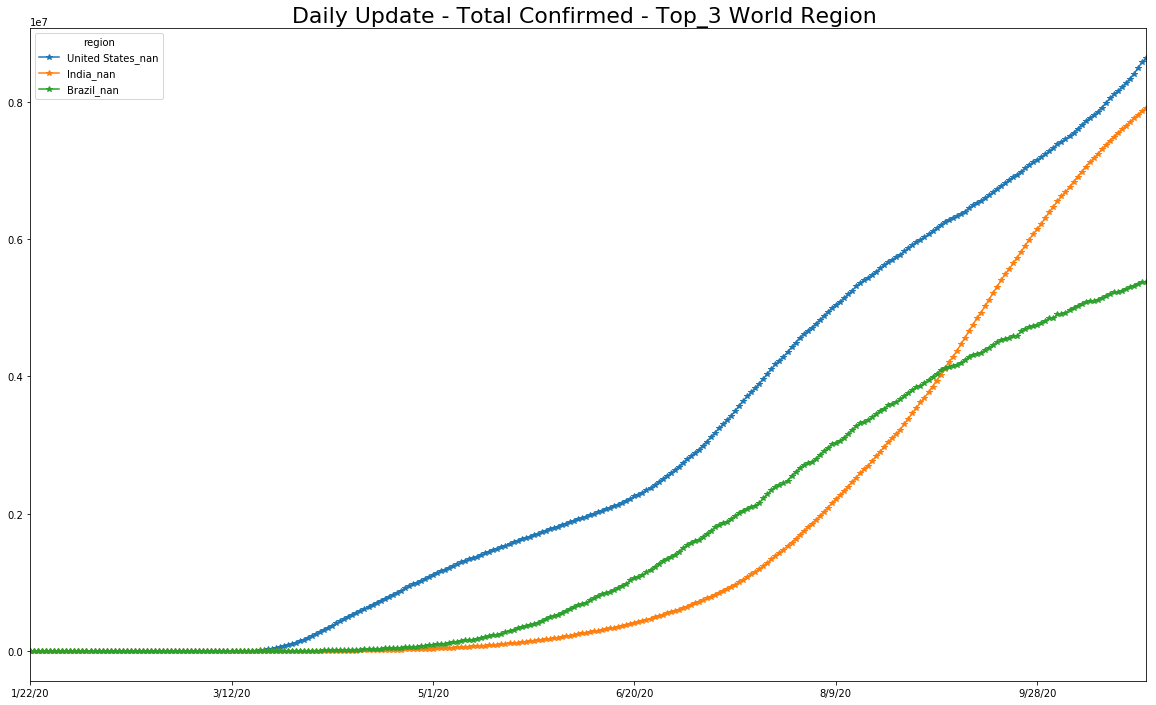

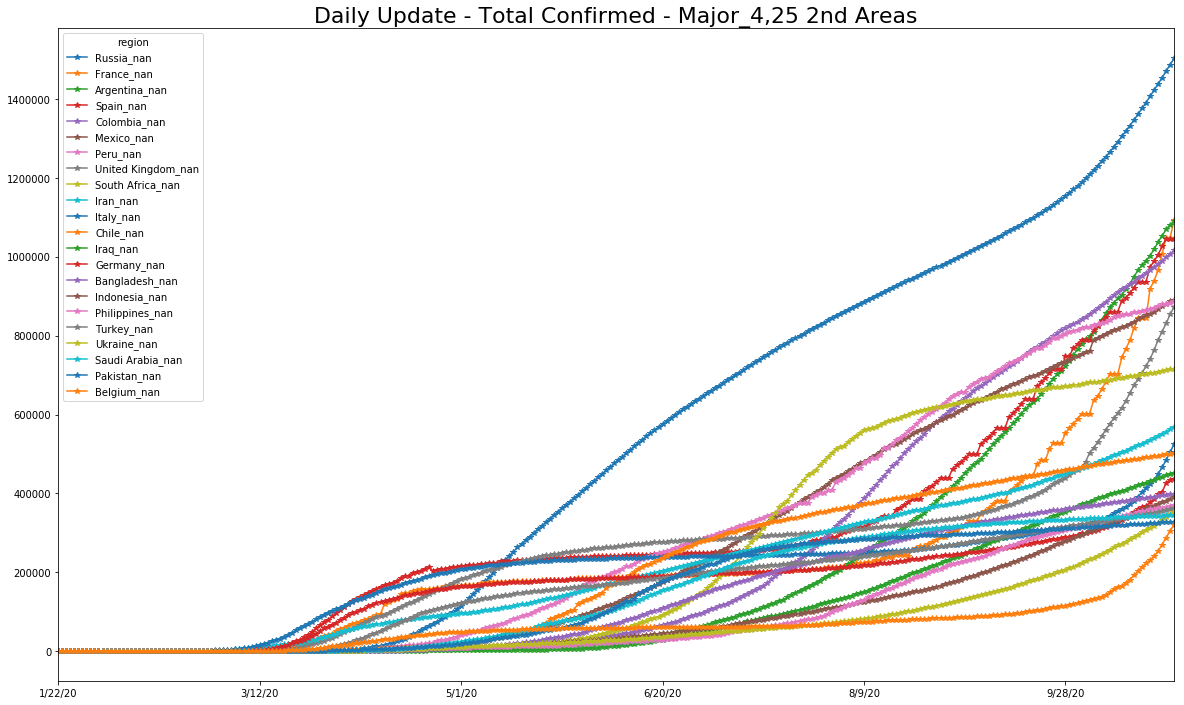

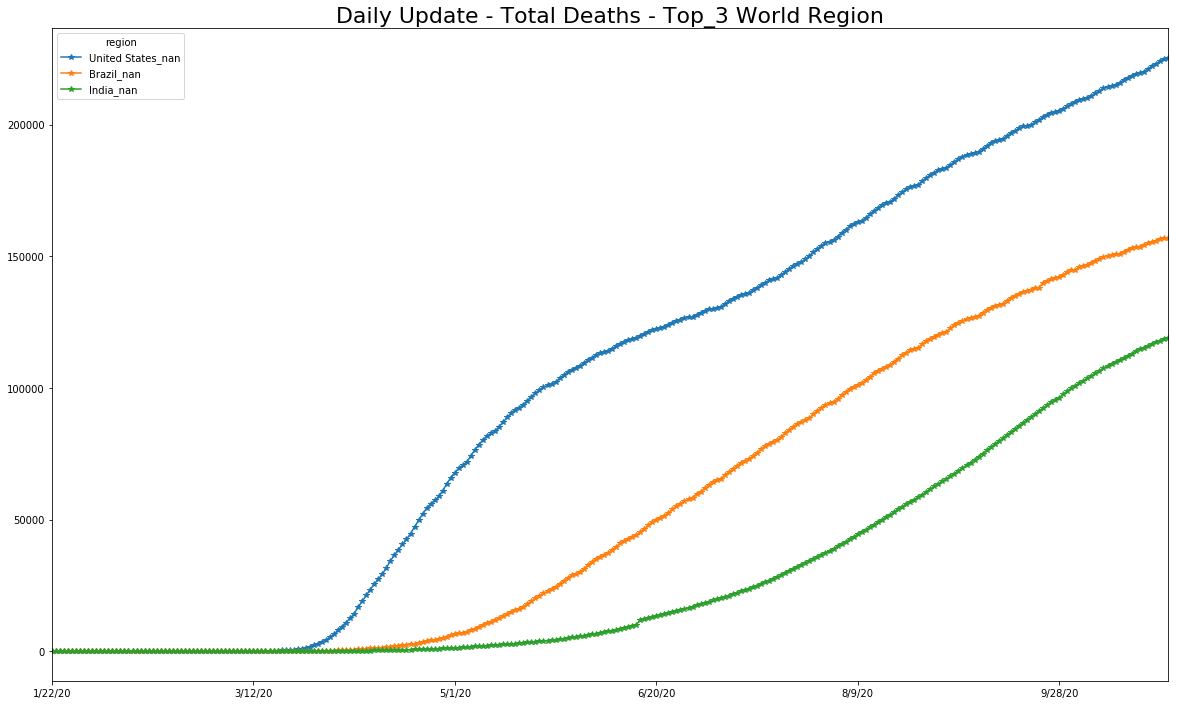

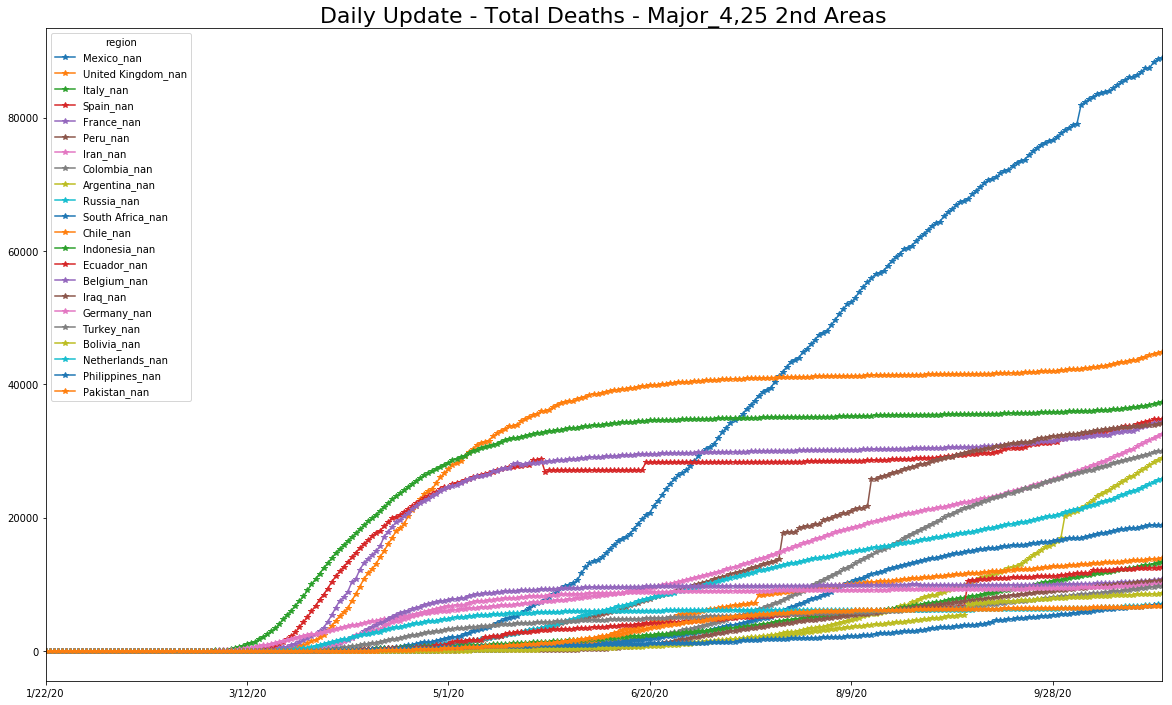

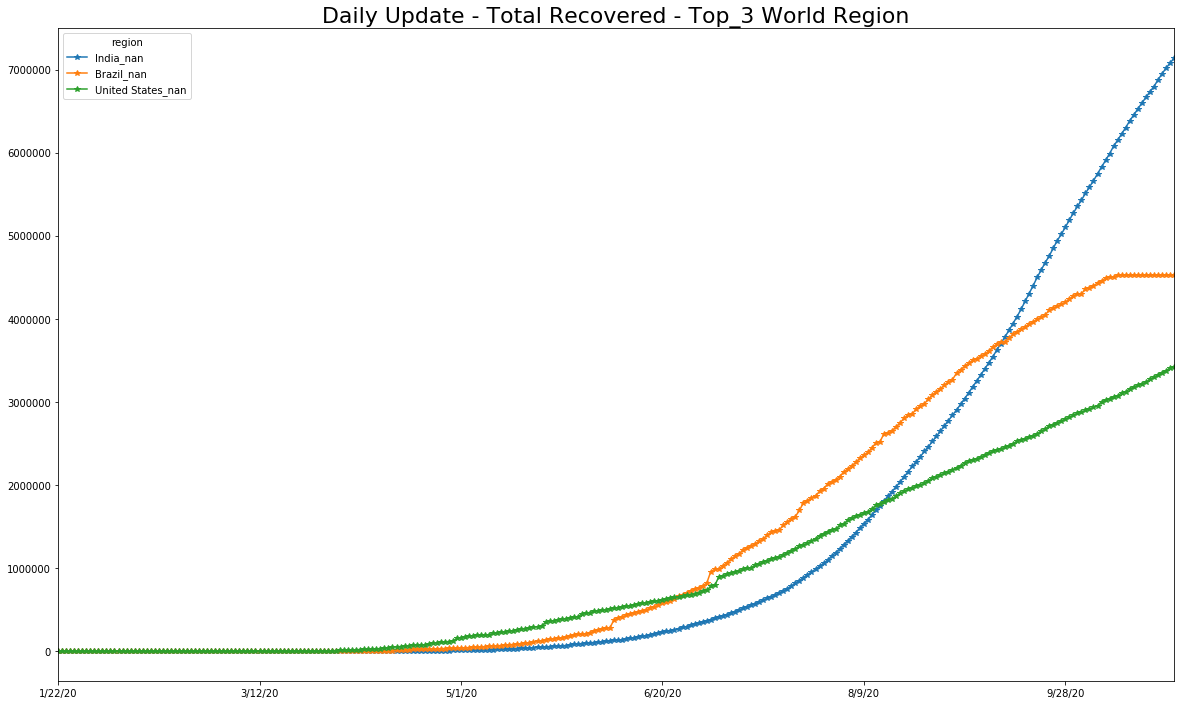

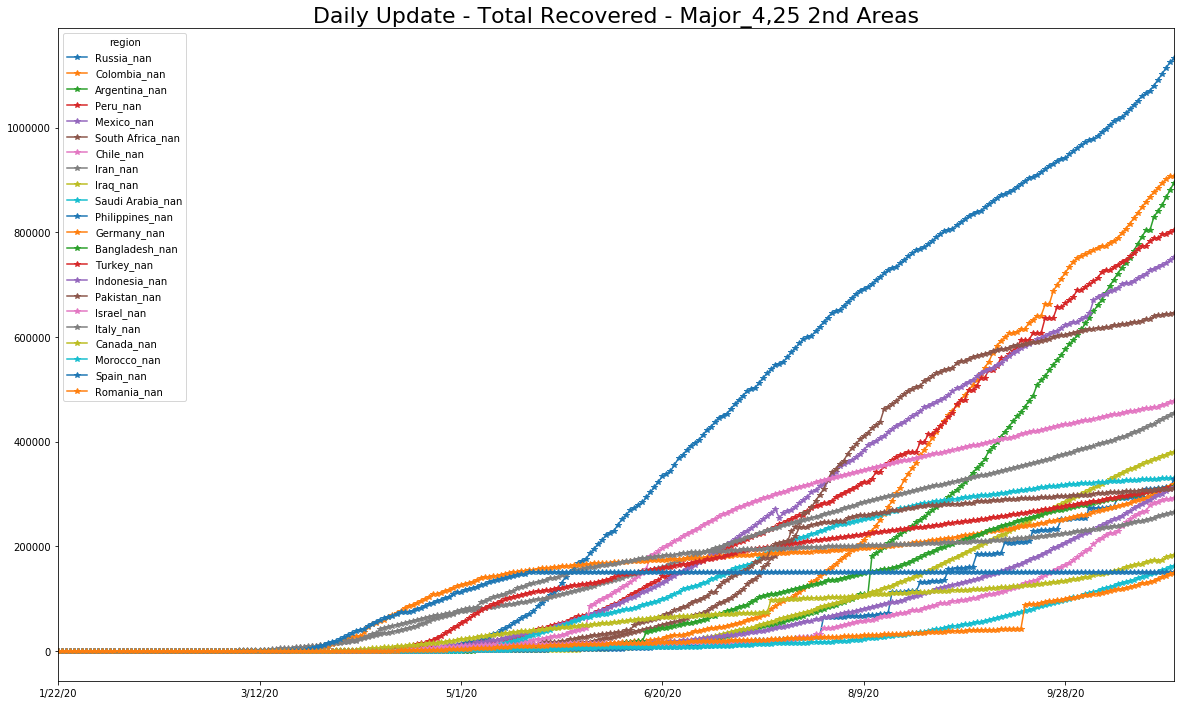

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/10/26


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [23]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
6/15/20            25527         1590        11031          853         142   
6/16/20            26310         1672        11147          854         148   
6/17/20            26874         1722        11268          854         155   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
6/15/20                       26          32785        17064   
6/16/20                       26          34159        17489   
6/17/20                       26          35552        18033   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
6/15/20                                     108                       3134   
6/16/20                                     108                       3135   
6/17/20                                     108                       3137   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
6/15/20  ...            2111207          848            5263           3062   
6/16/20  ...            2135002          849            5493           3150   
6/17/20  ...            2160906          849            5682           3386   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
6/15/20          334                     505                   9        844   
6/16/20          334                     514                   9        885   
6/17/20          335                     555                   9        902   

region   Zambia_nan  Zimbabwe_nan  
6/15/20        1382           387  
6/16/20        1405           391  
6/17/20        1412           401  

[3 rows x 267 columns]

In [24]:
ts[-4:]

region    Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
10/22/20            40626        18250        55357         3811        8582   
10/23/20            40687        18556        55630         4038        8829   
10/24/20            40768        18858        55880         4038        9026   
10/25/20            40833        19157        56143         4038        9381   

region    Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
10/22/20                      122        1053650        70836   
10/23/20                      122        1069368        73310   
10/24/20                      124        1081336        75523   
10/25/20                      124        1090589        77837   

region    Australia_Australian Capital Territory  Australia_New South Wales  \
10/22/20                                     114                       4370   
10/23/20                                     114                       4375   
10/24/20                                     114                       4382   
10/25/20                                     114                       4386   

region    ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
10/22/20  ...            8407702         2701           64439          88416   
10/23/20  ...            8491459         2759           64724          88718   
10/24/20  ...            8575177         2807           64923          89142   
10/25/20  ...            8635966         2851           65307          89565   

region    Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
10/22/20         1148                   49134                  10       2057   
10/23/20         1148                   49579                  10       2060   
10/24/20         1160                   49989                  10       2060   
10/25/20         1168                   50442                  10       2060   

region    Zambia_nan  Zimbabwe_nan  
10/22/20       16035          8242  
10/23/20       16095          8257  
10/24/20       16117          8269  
10/25/20       16117          8276  

[4 rows x 267 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-06-16  Afghanistan_nan      26310             0             0   
2     2020-06-17  Afghanistan_nan      26874           783             0   
3     2020-06-18  Afghanistan_nan      27532           564             0   
4     2020-06-19  Afghanistan_nan      27878           658          2005   
5     2020-06-20  Afghanistan_nan      28424           346          1568   
6     2020-06-21  Afghanistan_nan      28833           546          1550   
7     2020-06-22  Afghanistan_nan      29157           409          1301   
8     2020-06-23  Afghanistan_nan      29481           324          1279   
9     2020-06-24  Afghanistan_nan      29640           324          1057   
10    2020-06-25  Afghanistan_nan      30175           159           807   
11    2020-06-26  Afghanistan_nan      30451           535          1018   
12    2020-06-27  Afghanistan_nan      30616           276           970   
13    2020-06-28  Afghanistan_nan      30967           165           976   
14    2020-06-29  Afghanistan_nan      31238           351           792   
15    2020-06-30  Afghanistan_nan      31517           271           787   
16    2020-07-01  Afghanistan_nan      31836           279           901   
17    2020-07-02  Afghanistan_nan      32022           319           869   
18    2020-07-03  Afghanistan_nan      32324           186           784   
19    2020-07-04  Afghanistan_nan      32672           302           807   
20    2020-07-05  Afghanistan_nan      32951           348           836   
21    2020-07-06  Afghanistan_nan      33190           279           929   
22    2020-07-07  Afghanistan_nan      33384           239           866   
23    2020-07-08  Afghanistan_nan      33594           194           712   
24    2020-07-09  Afghanistan_nan      33908           210           643   
25    2020-07-10  Afghanistan_nan      34194           314           718   
26    2020-07-11  Afghanistan_nan      34366           286           810   
27    2020-07-12  Afghanistan_nan      34451           172           772   
28    2020-07-13  Afghanistan_nan      34455            85           543   
29    2020-07-14  Afghanistan_nan      34740             4           261   
30    2020-07-15  Afghanistan_nan      34994           285           374   
...          ...              ...        ...           ...           ...   
36016 2020-09-27     Zimbabwe_nan       7812            16            78   
36017 2020-09-28     Zimbabwe_nan       7816             9            60   
36018 2020-09-29     Zimbabwe_nan       7837             4            29   
36019 2020-09-30     Zimbabwe_nan       7838            21            34   
36020 2020-10-01     Zimbabwe_nan       7850             1            26   
36021 2020-10-02     Zimbabwe_nan       7858            12            34   
36022 2020-10-03     Zimbabwe_nan       7885             8            21   
36023 2020-10-04     Zimbabwe_nan       7888            27            47   
36024 2020-10-05     Zimbabwe_nan       7898             3            38   
36025 2020-10-06     Zimbabwe_nan       7915            10            40   
36026 2020-10-07     Zimbabwe_nan       7919            17            30   
36027 2020-10-08     Zimbabwe_nan       7951             4            31   
36028 2020-10-09     Zimbabwe_nan       7994            32            53   
36029 2020-10-10     Zimbabwe_nan       8010            43            79   
36030 2020-10-11     Zimbabwe_nan       8011            16            91   
36031 2020-10-12     Zimbabwe_nan       8021             1            60   
36032 2020-10-13     Zimbabwe_nan       8036            10            27   
36033 2020-10-14     Zimbabwe_nan       8055            15            26   
36034 2020-10-15     Zimbabwe_nan       8075            19            44   
36035 2020-10-16     Zimbabwe_nan       8099            20            54   
36036 2020-10-17     Zimbabwe_nan       8110            24  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
36045 2020-10-26  Zimbabwe_nan          0             7            34   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
36045           129         100.084774         100.412643         101.583528   

       last_day  kalman_prediction  population  infected_rate  min  max  
36045      8276             8306.0    14862924       0.000006  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
36043  2020-10-24  Zimbabwe_nan       8269            15            70   
36044  2020-10-25  Zimbabwe_nan       8276            12            54   
36045  2020-10-26  Zimbabwe_nan          0             7            34   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
36043           158         100.182116         100.855136         101.950982   
36044           159         100.145452         100.657456         101.960666   
36045           129         100.084774         100.412643         101.583528   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
36043                 8257  ...    14862924       0.000006  NaN  NaN   
36044                 8269  ...    14862924       0.000006  NaN  NaN   
36045                 8276  ...    14862924       0.000006  NaN  NaN   

       population_percentage : infected_rate confirmed  \
36043                                         0.000556   
36044                                         0.000556   
36045                                         0.000557   

       population_percentage : factor 9/10 infected_rate confirmed  \
36043                                           0.005556             
36044                                           0.005564             
36045                                           0.005569             

       delta : new_cases  delta : new_cases per 1M hab  \
36043               26.0                      1.749319   
36044               30.0                      2.018445   
36045               30.0                      2.018445   

       delta : roling 7day AVG  \
36043                22.571429   
36044                22.714286   
36045                18.428571   

       delta : aprox 14-day case notification rate per 100k hab  
36043                                           2.126096         
36044                                           2.139552         
36045                                           1.735863         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
257  United States_nan  5.704781e+11  755300.029408  77170.601504


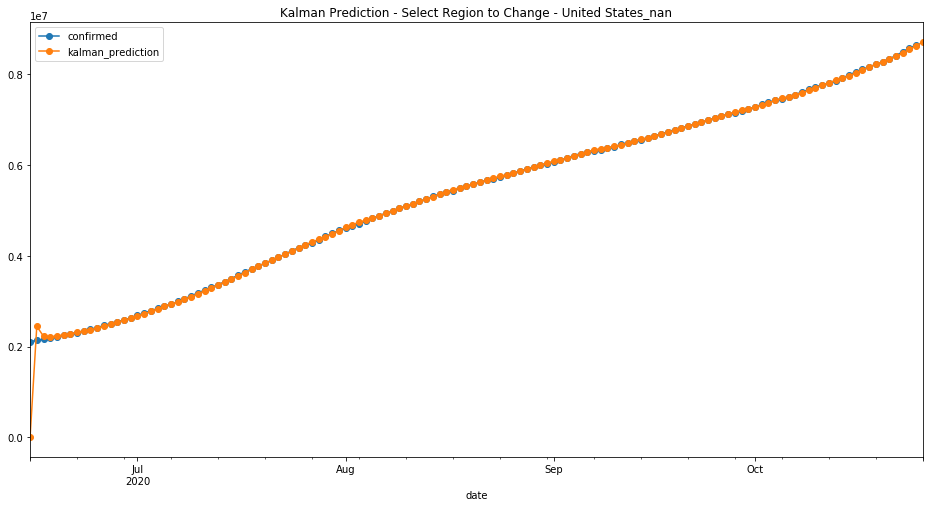

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  1.740546e+10  131929.75452  13048.37594


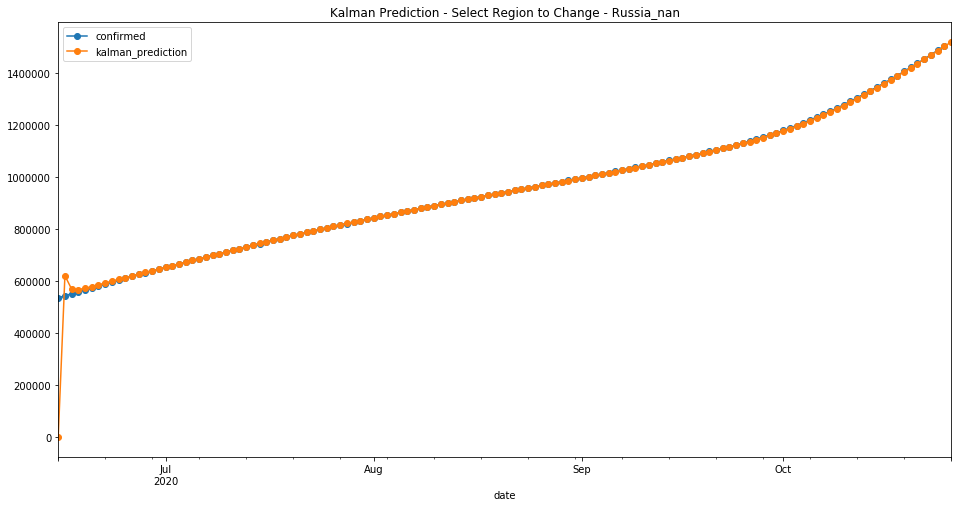

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  2.207369e+11  469826.449211  56004.082707


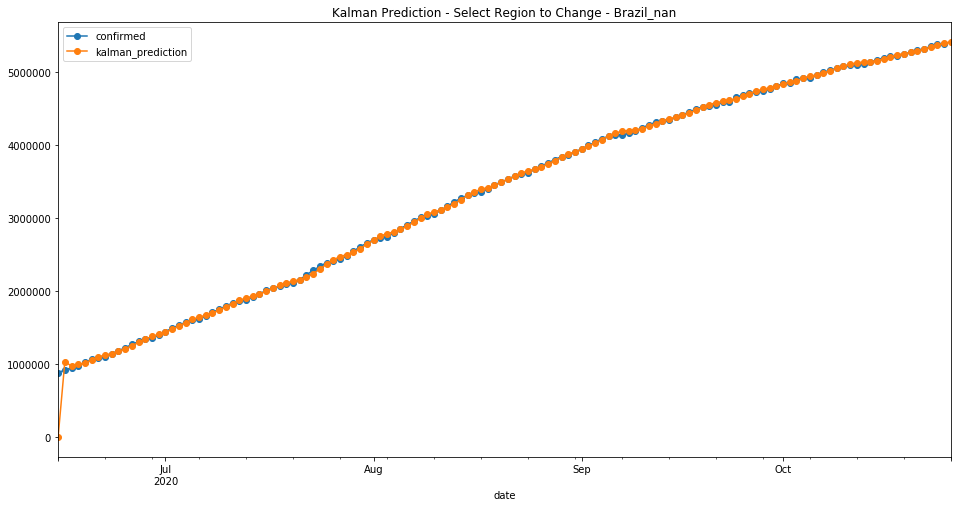

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
256  United Kingdom_nan  6.055743e+09  77818.65485  8474.616541


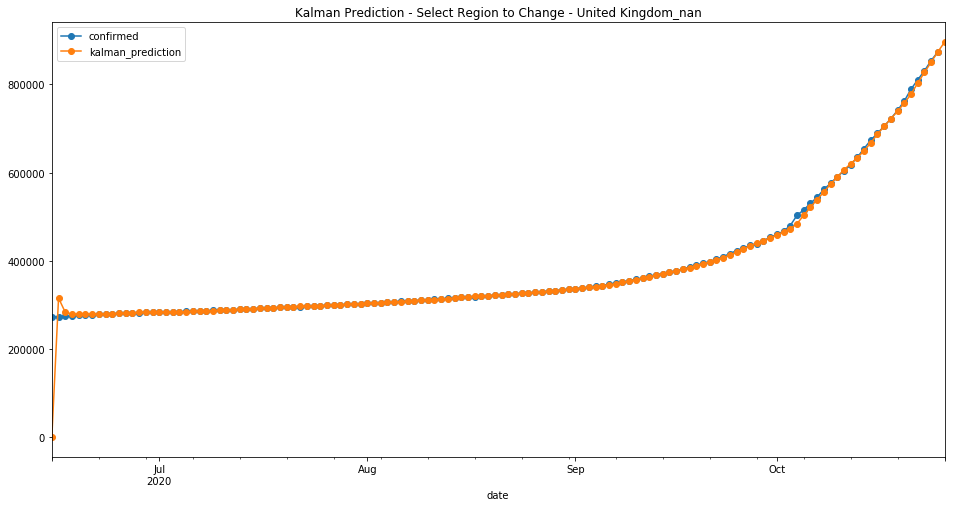

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbjwi3h5q
  JVM stdout: /tmp/tmpbjwi3h5q/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbjwi3h5q/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    27 days
H2O_cluster_name:           H2O_from_python_unknownUser_xy4l2l
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.543 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-10-08
last_train_date= 2020-10-25
first_bootstrap_date= 2020-10-17
boost_bootstrap_date= 2020-10-22
first_test_date= 2020-10-16
last_test_date= 2020-10-26
first_valid_date= 2020-10-24


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   40237.0      40141 2020-10-17  Afghanistan_nan
1   40297.0      40200 2020-10-18  Afghanistan_nan
2   40351.0      40287 2020-10-19  Afghanistan_nan
3   40435.0      40357 2020-10-20  Afghanistan_nan
4   40505.0      40510 2020-10-21  Afghanistan_nan
5   40659.0      40626 2020-10-22  Afghanistan_nan
6   40777.0      40687 2020-10-23  Afghanistan_nan
7   40855.0      40768 2020-10-24  Afghanistan_nan
8   40953.0      40833 2020-10-25  Afghanistan_nan
9   41022.0          0 2020-10-26  Afghanistan_nan
10  16723.0      16774 2020-10-17      Albania_nan
11  17021.0      17055 2020-10-18      Albania_nan
12  17327.0      17350 2020-10-19      Albania_nan
13  17643.0      17651 2020-10-20      Albania_nan
14  17964.0      17948 2020-10-21      Albania_nan
15  18282.0      18250 2020-10-22      Albania_nan
16  18600.0      18556 2020-10-23      Albania_nan
17  18918.0      18858 2020-10-24      Albania_nan
18  19230.0      19157 2020-10-25      Albania_nan
19  19538.0          0 2020-10-26      Albania_nan
20  54237.0      54203 2020-10-17      Algeria_nan
21  54448.0      54402 2020-10-18      Algeria_nan
22  54659.0      54616 2020-10-19      Algeria_nan
23  54889.0      54829 2020-10-20      Algeria_nan
24  55108.0      55081 2020-10-21      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  47171.0      47418 2020-10-22  Azerbaijan_nan
176  48004.0      48221 2020-10-23  Azerbaijan_nan
177  48842.0      49013 2020-10-24  Azerbaijan_nan
178  49699.0      49959 2020-10-25  Azerbaijan_nan
179  50715.0          0 2020-10-26  Azerbaijan_nan
180   5553.0       5628 2020-10-17     Bahamas_nan
181   5708.0       5703 2020-10-18     Bahamas_nan
182   5850.0       5773 2020-10-19     Bahamas_nan
183   5934.0       5923 2020-10-20     Bahamas_nan
184   5969.0       6051 2020-10-21     Bahamas_nan
185   6139.0       6135 2020-10-22     Bahamas_nan
186   6293.0       6268 2020-10-23     Bahamas_nan
187   6360.0       6268 2020-10-24     Bahamas_nan
188   6541.0       6410 2020-10-25     Bahamas_nan
189   6489.0          0 2020-10-26     Bahamas_nan
190  78147.0      77571 2020-10-17     Bahrain_nan
191  78372.0      77902 2020-10-18     Bahrain_nan
192  78712.0      78224 2020-10-19     Bahrain_nan
193  79017.0      78533 2020-10-20     Bahrain_nan
194  79314.0      78907 2020-10-21     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220   87081.0      87063 2020-10-17  Belarus_nan
221   87756.0      87698 2020-10-18  Belarus_nan
222   88430.0      88290 2020-10-19  Belarus_nan
223   89044.0      88909 2020-10-20  Belarus_nan
224   89685.0      89642 2020-10-21  Belarus_nan
225   90429.0      90380 2020-10-22  Belarus_nan
226   91159.0      91167 2020-10-23  Belarus_nan
227   91960.0      91978 2020-10-24  Belarus_nan
228   92793.0      92823 2020-10-25  Belarus_nan
229   93667.0          0 2020-10-26  Belarus_nan
230  208912.0     213115 2020-10-17  Belgium_nan
231  220943.0     222253 2020-10-18  Belgium_nan
232  230729.0     230480 2020-10-19  Belgium_nan
233  239763.0     240159 2020-10-20  Belgium_nan
234  250321.0     253386 2020-10-21  Belgium_nan
235  264097.0     270132 2020-10-22  Belgium_nan
236  281172.0     287700 2020-10-23  Belgium_nan
237  299069.0     305409 2020-10-24  Belgium_nan
238  317931.0     321031 2020-10-25  Belgium_nan
239  334769.0          0 2020-10-26  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [max, min]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  858240074.1069299
# MSE on the validation data =  1512419145231.8936
# R^2 on the training data =  0.9995173571966781
# R^2 on the validation data =  0.45654417689828863


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1603707884086_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           16993299.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       21.0       23.0       22.94      2033.0      2817.0     2660.672



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 858240074.1069299
RMSE: 29295.734742568413
MAE: 3521.472177755761
RMSLE: 0.24827282839997283
Mean Residual Deviance: 858240074.1069299

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 1512419145231.8936
RMSE: 1229804.515047775
MAE: 297992.83933172695
RMSLE: 6.895313447790202
Mean Residual Deviance: 1512419145231.8936

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2020-10-26 10:24:51   0.079 sec              0.0            NaN   
1     2020-10-26 10:24:51   0.465 sec              1.0   67929.007247   
2     2020-10-26 10:24:51   0.626 sec              2.0   61611.025951   
3     2020-10-26 10:24:51   0.735 sec              3.0   57586.189496   
4     2020-10-26 10:24:51   0.843 sec              4.0   55517.667436   
5     2020-10-26 10:24:51   0.924 sec              5.0   44242.880374   
6     2020-10-26 10:24:51   0.994 sec              6.0   47402.314349   
7     2020-10-26 10:24:52   1.141 sec              7.0   46054.289905   
8     2020-10-26 10:24:52   1.232 sec              8.0   44943.754943   
9     2020-10-26 10:24:52   1.286 sec              9.0   45700.023069   
10    2020-10-26 10:24:52   1.367 sec             10.0   44268.584156   
11    2020-10-26 10:24:52   1.446 sec             11.0   43905.348262   
12    2020-10-26 10:24:52   1.514 sec             12.0   43178.374880   
13    2020-10-26 10:24:52   1.577 sec             13.0   39734.969325   
14    2020-10-26 10:24:52   1.637 sec             14.0   38994.061395   
15    2020-10-26 10:24:52   1.711 sec             15.0   38745.451040   
16    2020-10-26 10:24:52   1.785 sec             16.0   38404.189467   
17    2020-10-26 10:24:52   1.854 sec             17.0   38602.909551   
18    2020-10-26 10:24:52   1.917 sec             18.0   38223.034534   
19    2020-10-26 10:24:52   1.980 sec             19.0   36759.307946   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1   10042.878056       4.614350e+09     1.246015e+06   302374.397734   
2    9960.527693       3.795919e+09     1.247124e+06   298092.503361   
3    9504.103986       3.316169e+09     1.238346e+06   295915.937888   
4    9233.665149       3.082211e+09     1.239932e+06   295806.078955   
5    8637.757005       1.957432e+09     1.240898e+06   295420.036706   
6    8416.924742       2.246979e+09     1.239129e+06   295830.738461   
7    8102.723986       2.120998e+09     1.239346e+06   295826.527518   
8    7861.960958       2.019941e+09     1.238887e+06   295599.600110   
9    7769.202189       2.088492e+09     1.237843e+06   295656.162130   
10   7516.765654       1.959708e+09     1.232966e+06   294882.477984   
11   7238.695525       1.927680e+09     1.234543e+06   295152.875000   
12   7311.729572       1.864372e+09     1.233608e+06   295355.327709   
13   7102.202506       1.578868e+09     1.228894e+06   295707.240547   
14   6808.958246       1.520537e+09     1.229944e+06   295723.387582   
15   6594.620309       1.501210e+09     1.238437e+06   298794.417559   
16   6482.010279       1.474882e+09     1.238876e+06   298642.942401   
17   6442.973957       1.490185e+09     1.238202e+06   298645.953933   
18   6306.342558       1.461000e+09     1.238151e+06   298799.501034   
19   6156.130521       1.351247e+09     1.235321e+06   298902.955953   

    validation_deviance  
0                   NaN  
1          1.552554e+12  
2          1.555318e+12  
3          1.533502e+12  
4          1.537431e+12  
5          1.539828e+12  
6          1.535440e+12  
7          1.535979e+12  
8          1.534840e+12  
9          1.532255e+12  
10         1.520204e+12  
11         1.524097e+12  
12         1.521788e+12  
13         1.510180e+12  
14         1.512761e+12  
15         1.533725e+12  
16         1.534814e+12  
17         1.533143e+12  
18         1.533019e+12  
19         1.526018e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0  kalman_prediction         1.544625e+18           1.000000    0.348580
1           last_day         1.165126e+18           0.754310    0.262937
2       7_day_change         6.363869e+17           0.412001    0.143615
3             region         4.888643e+17           0.316494    0.110323
4       3_day_change         2.724184e+17           0.176365    0.061477
5       1_day_change         1.751668e+17           0.113404    0.039530
6  3_day_change_rate         4.063067e+16           0.026305    0.009169
7      infected_rate         3.881590e+16           0.025130    0.008760
8  7_day_change_rate         3.776617e+16           0.024450    0.008523
9  1_day_change_rate         3.139139e+16           0.020323    0.007084

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0  kalman_prediction         1.544625e+18           1.000000    0.348580
1           last_day         1.165126e+18           0.754310    0.262937
2       7_day_change         6.363869e+17           0.412001    0.143615
3             region         4.888643e+17           0.316494    0.110323
4       3_day_change         2.724184e+17           0.176365    0.061477
5       1_day_change         1.751668e+17           0.113404    0.039530
6  3_day_change_rate         4.063067e+16           0.026305    0.009169
7      infected_rate         3.881590e+16           0.025130    0.008760
8  7_day_change_rate         3.776617e+16           0.024450    0.008523
9  1_day_change_rate         3.139139e+16           0.020323    0.007084

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


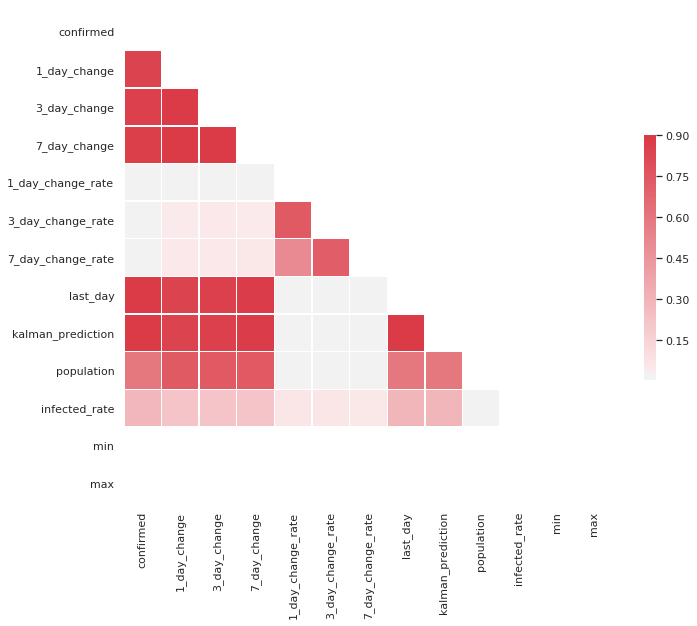

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.849667
3_day_change         0.863538
7_day_change         0.873407
1_day_change_rate    0.018721
3_day_change_rate    0.020461
7_day_change_rate    0.021756
last_day             0.988932
kalman_prediction    0.989348
population           0.598152
infected_rate        0.285546
min                       NaN
max                       NaN
Name: confirmed, dtype: float64


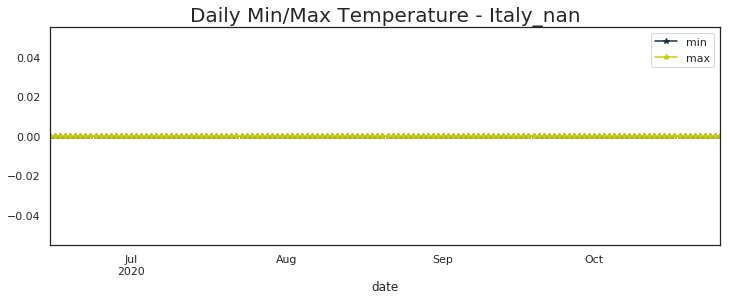

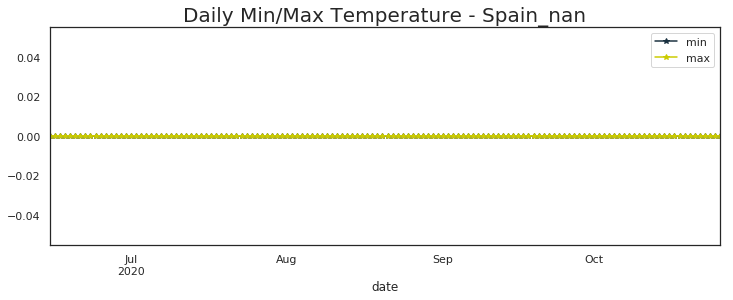

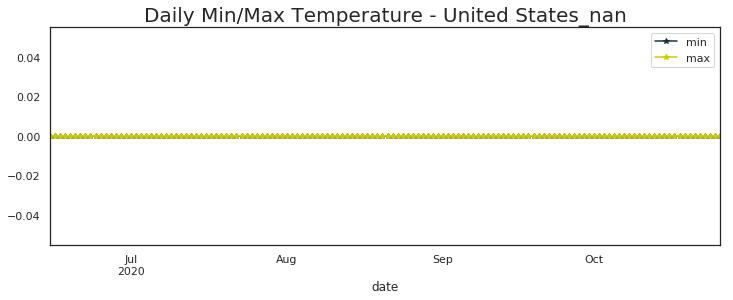

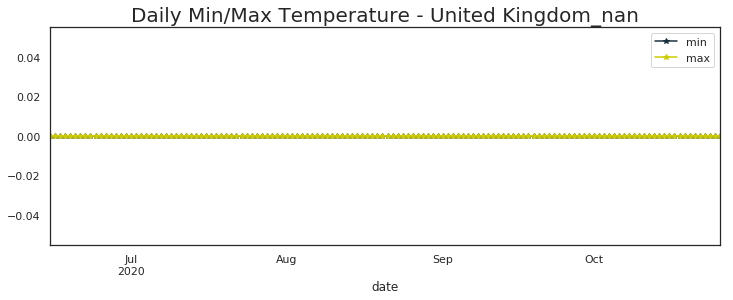

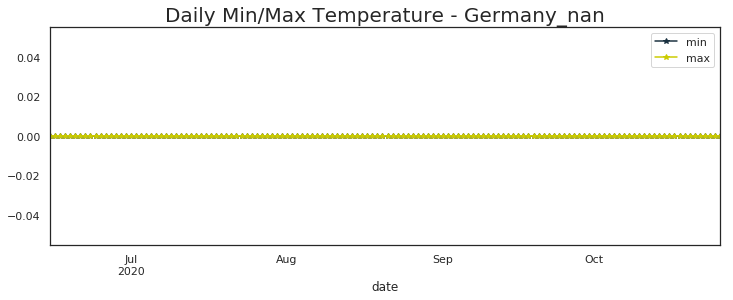

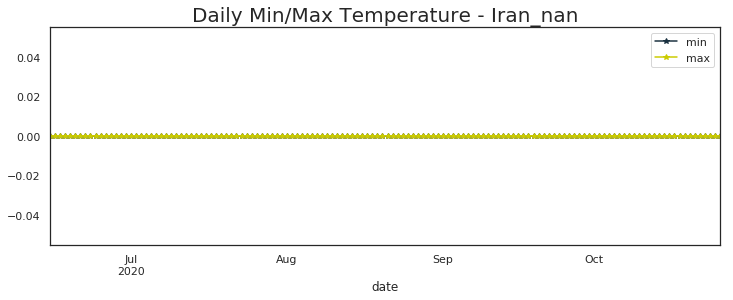

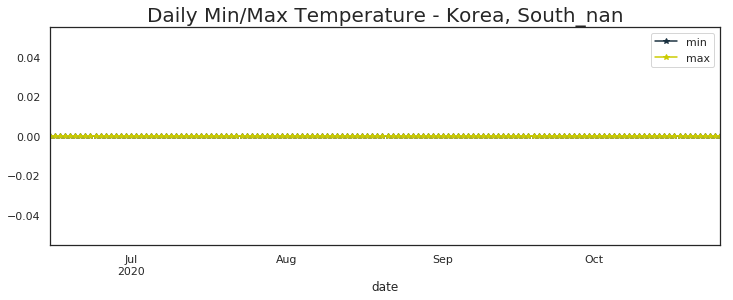

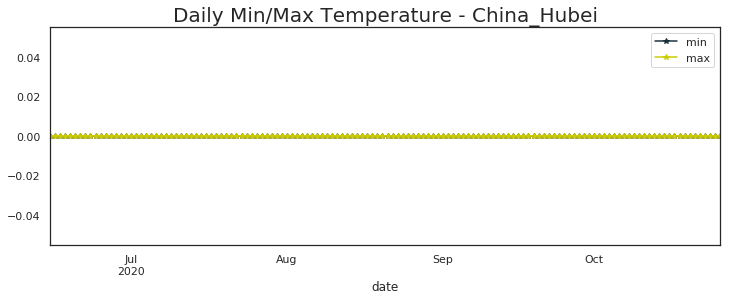

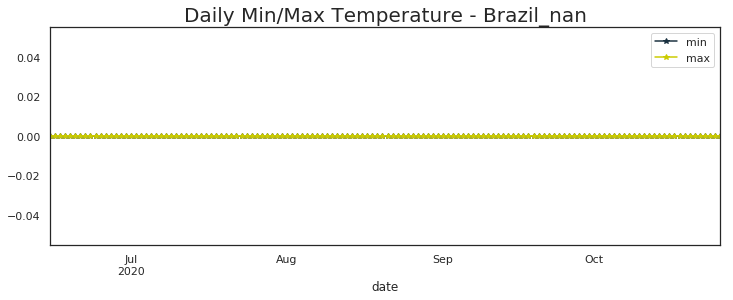

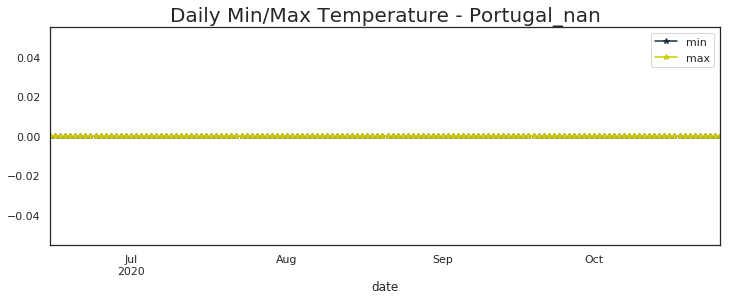

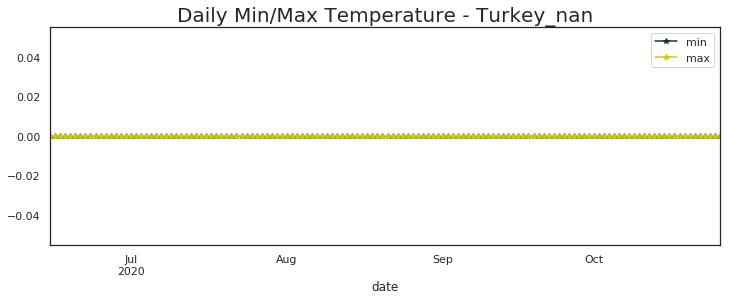

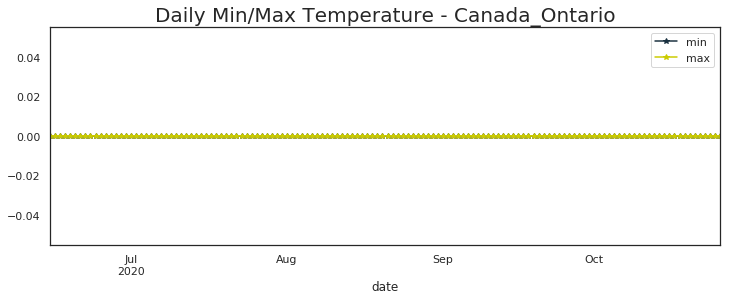

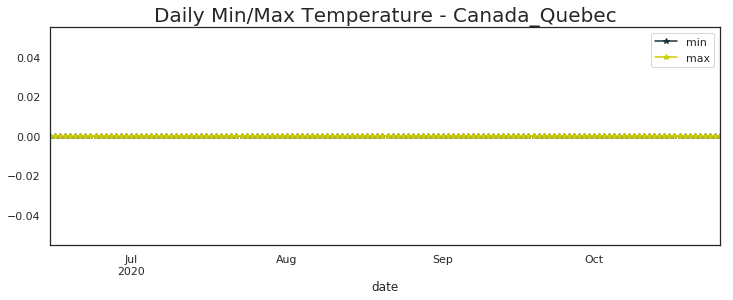

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                            min  max
region                              
United States_nan           0.0  0.0
India_nan                   0.0  0.0
Brazil_nan                  0.0  0.0
Russia_nan                  0.0  0.0
France_nan                  0.0  0.0
Argentina_nan               0.0  0.0
Spain_nan                   0.0  0.0
Colombia_nan                0.0  0.0
Mexico_nan                  0.0  0.0
Peru_nan                    0.0  0.0
United Kingdom_nan          0.0  0.0
South Africa_nan            0.0  0.0
Iran_nan                    0.0  0.0
Italy_nan                   0.0  0.0
Chile_nan                   0.0  0.0
Iraq_nan                    0.0  0.0
Germany_nan                 0.0  0.0
Bangladesh_nan              0.0  0.0
Indonesia_nan               0.0  0.0
Philippines_nan             0.0  0.0
Turkey_nan                  0.0  0.0
Ukraine_nan                 0.0  0.0
Saudi Arabia_nan            0.0  0.0
Pakistan_nan                0.0  0.0
Be

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

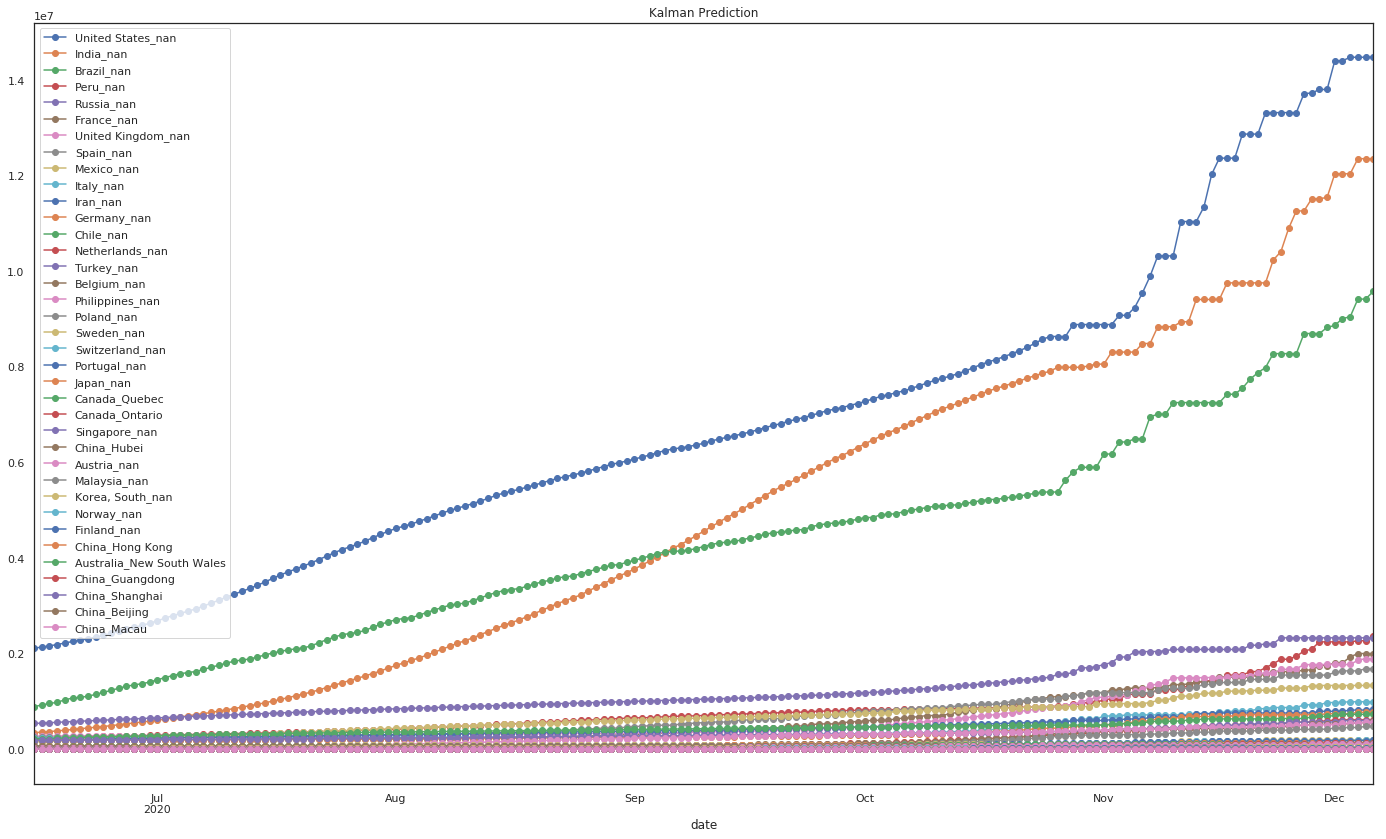

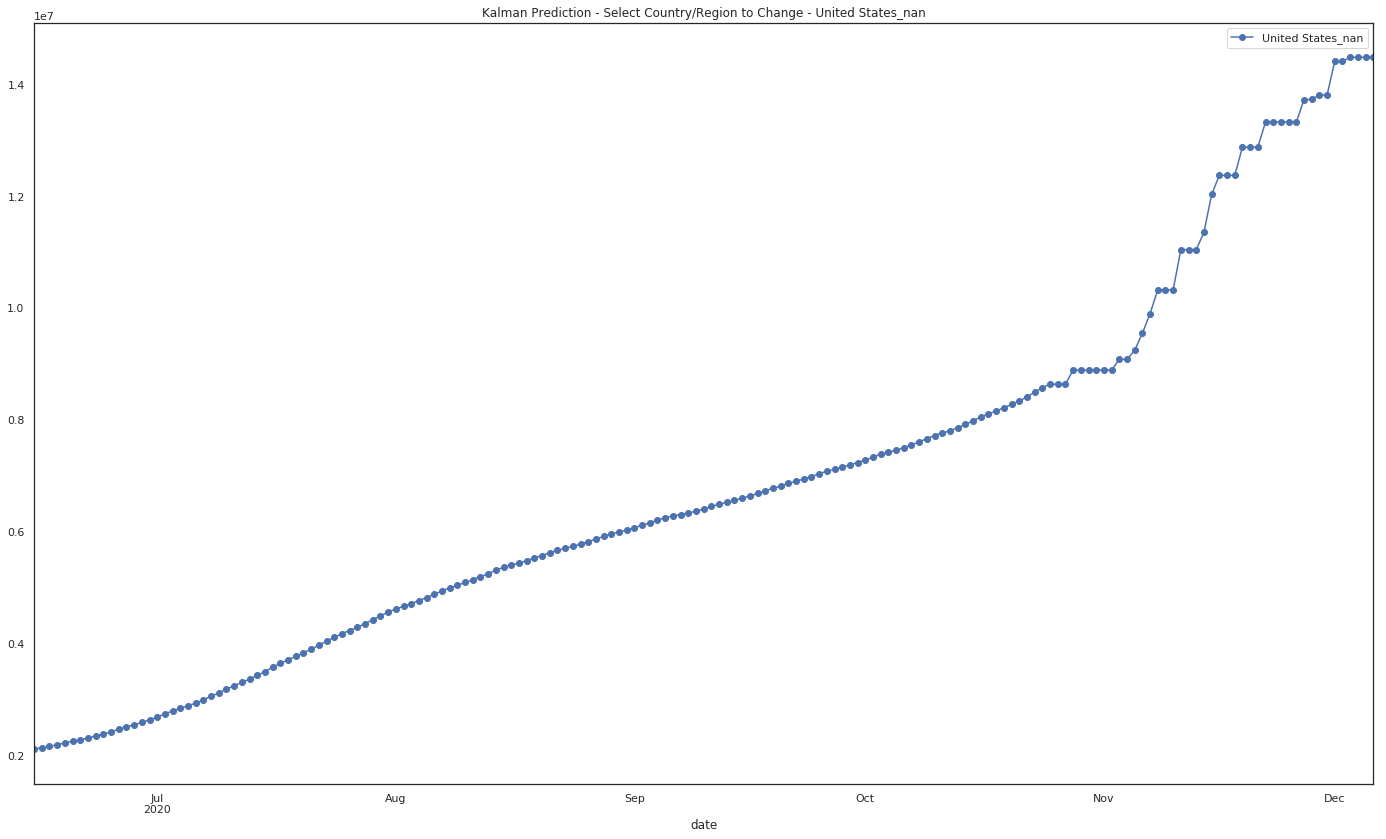

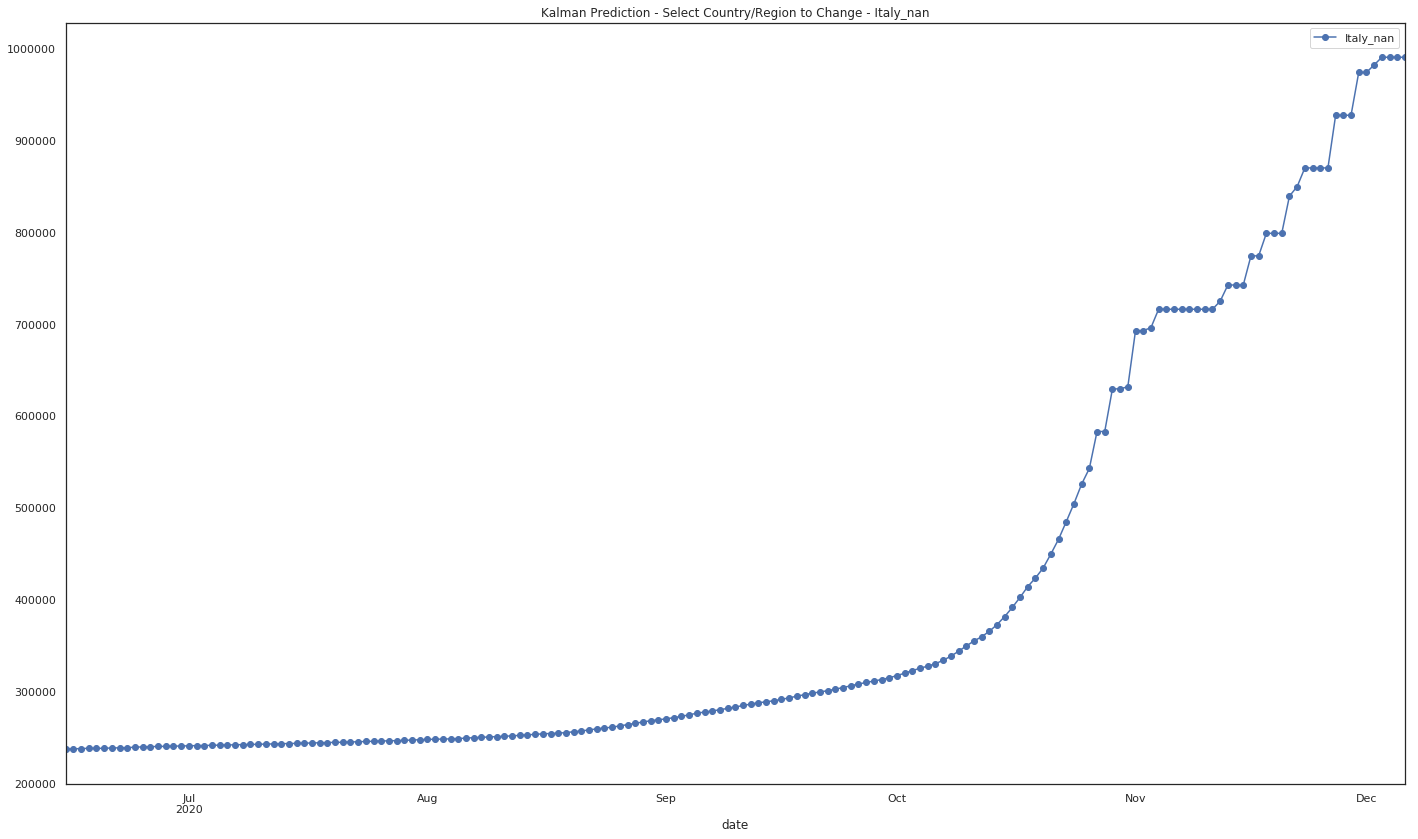

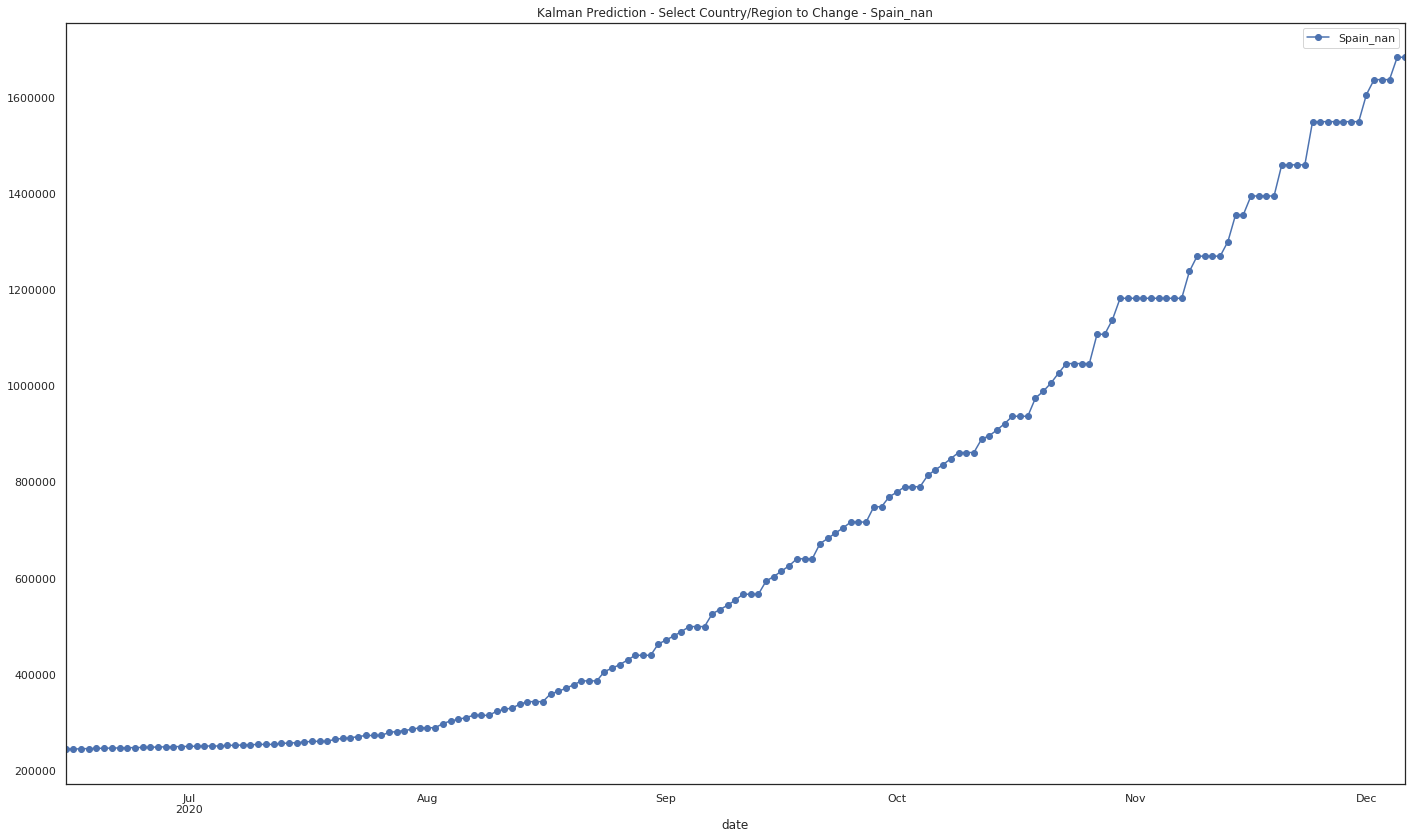

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


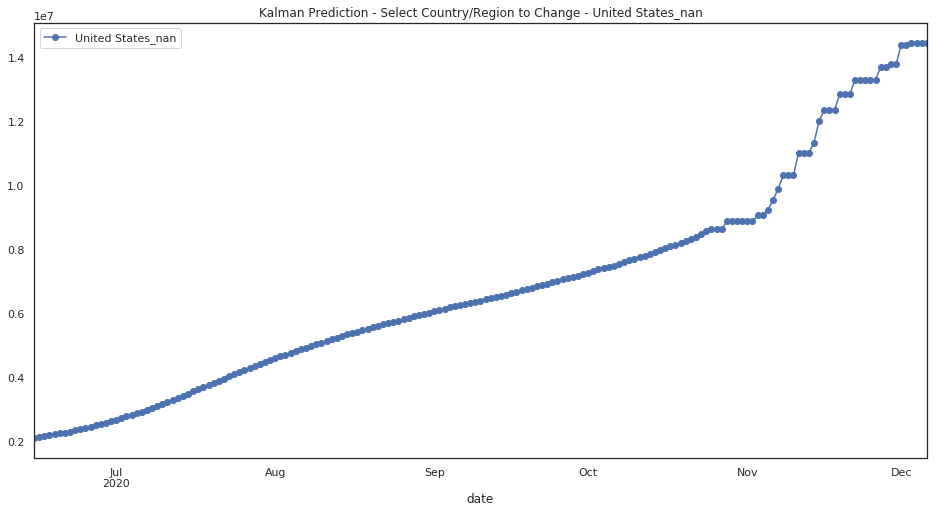

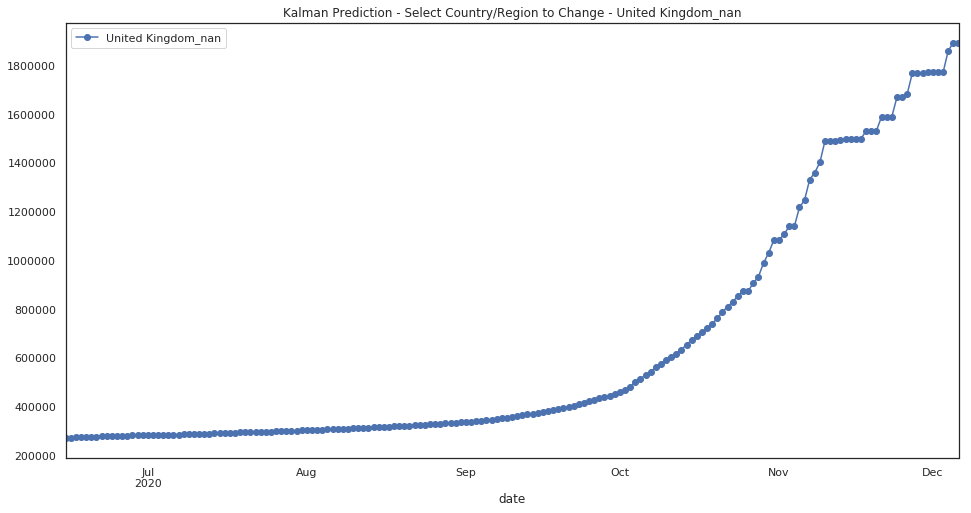

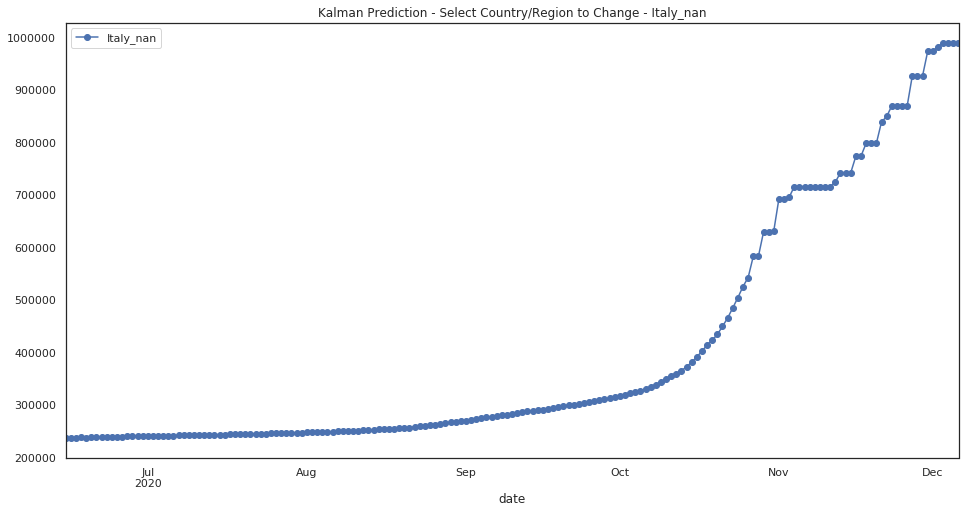

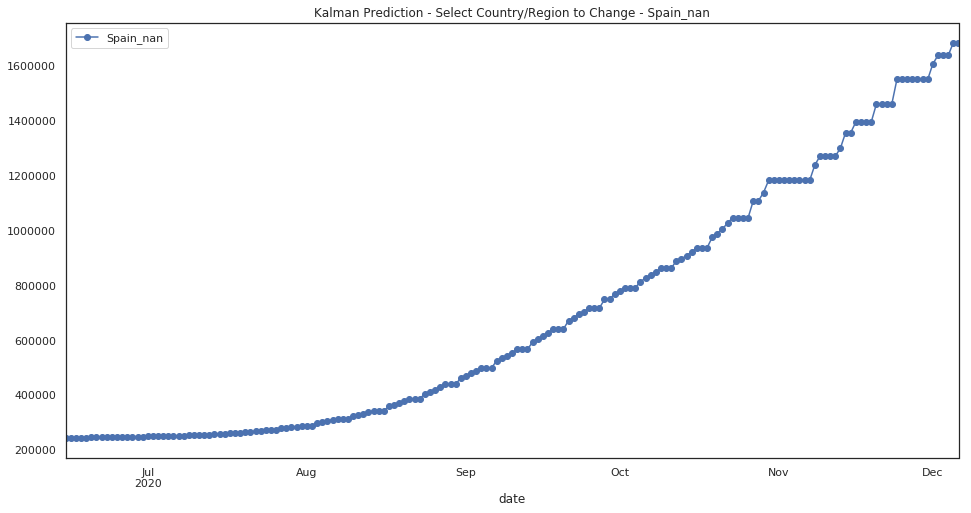

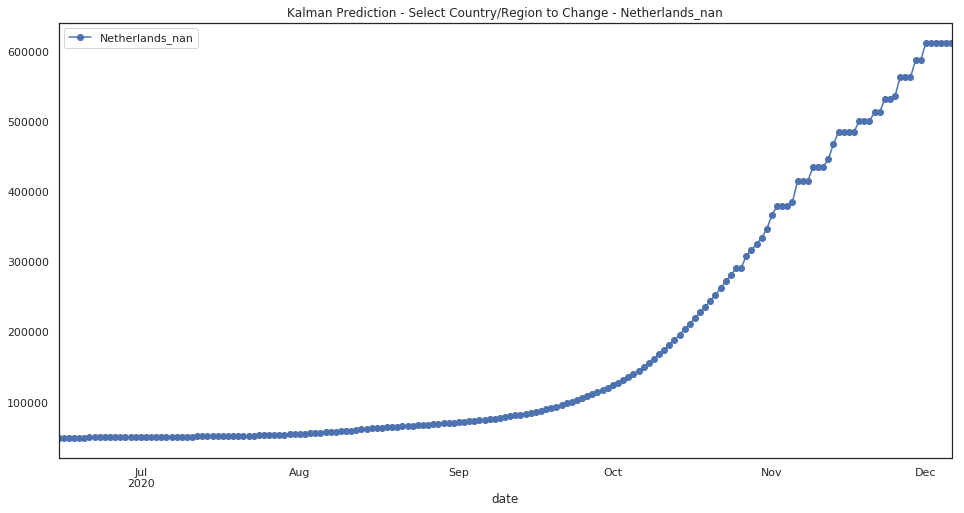

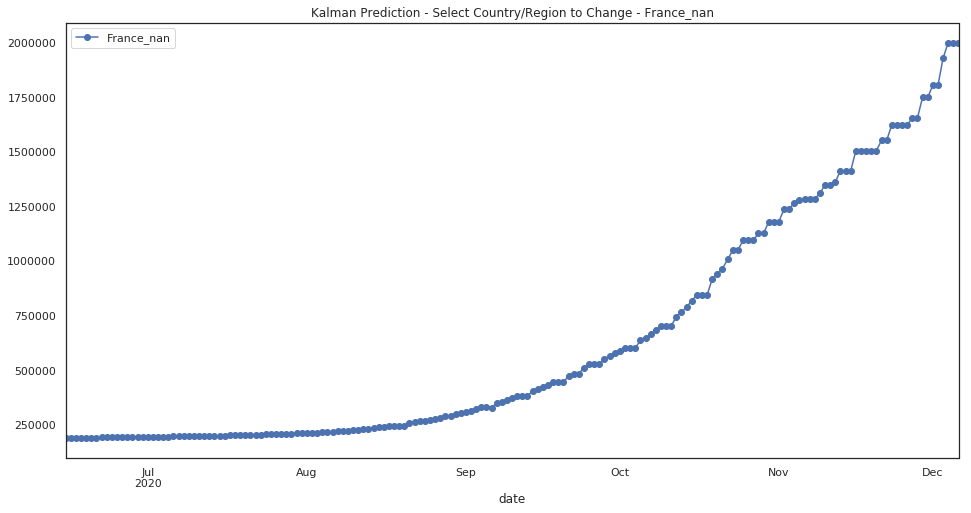

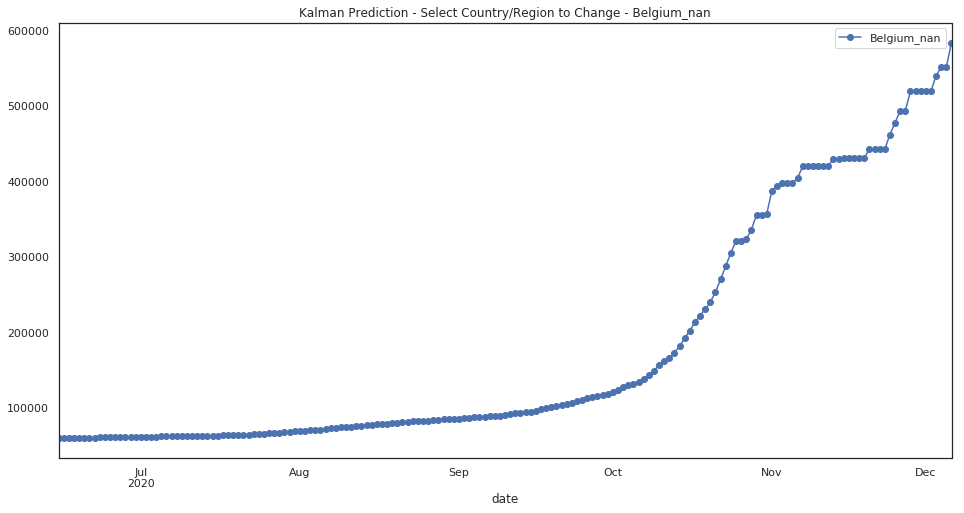

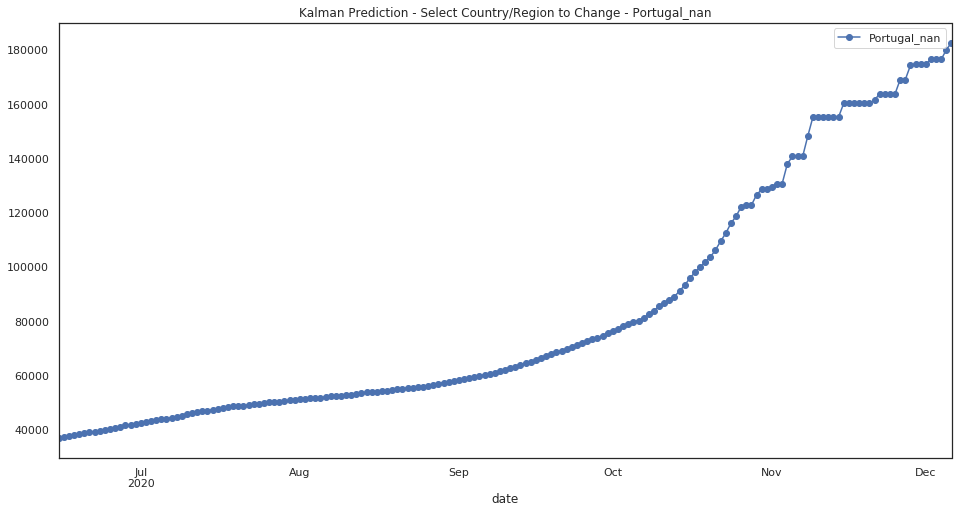

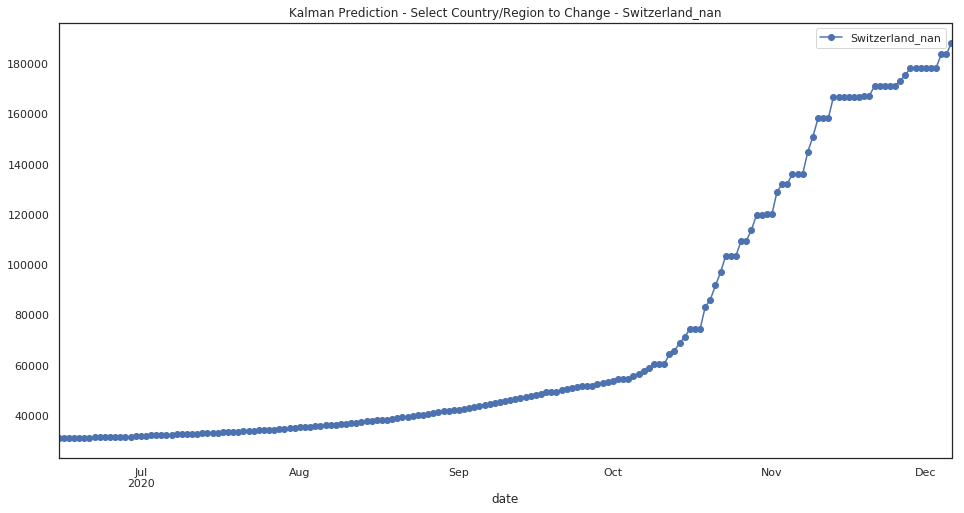

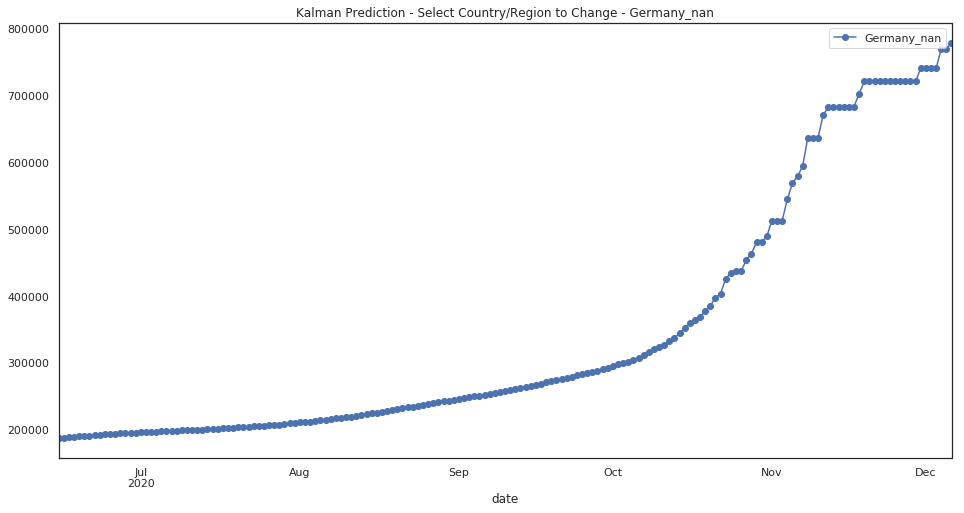

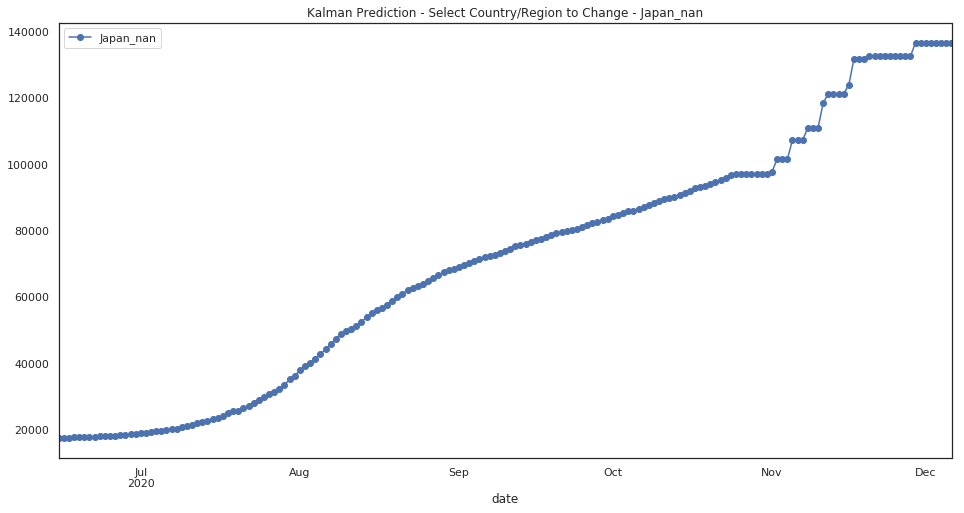

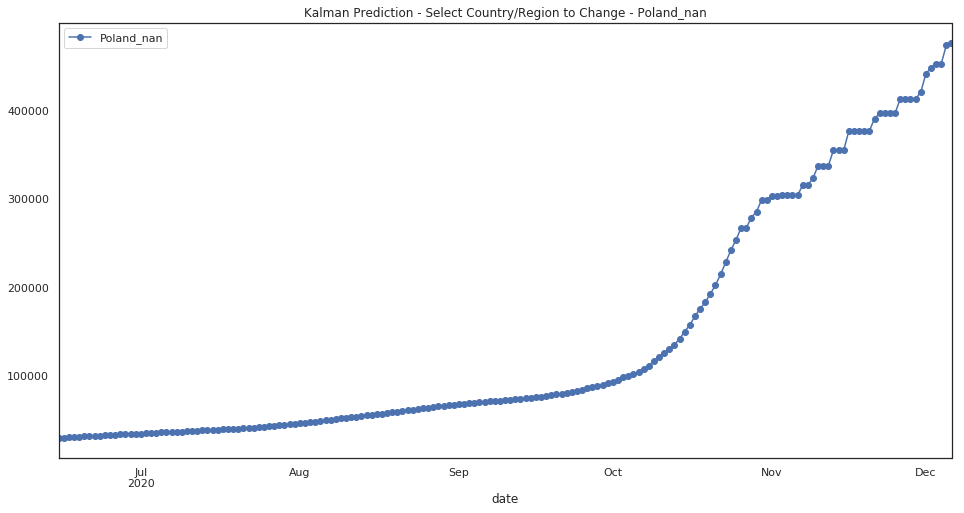

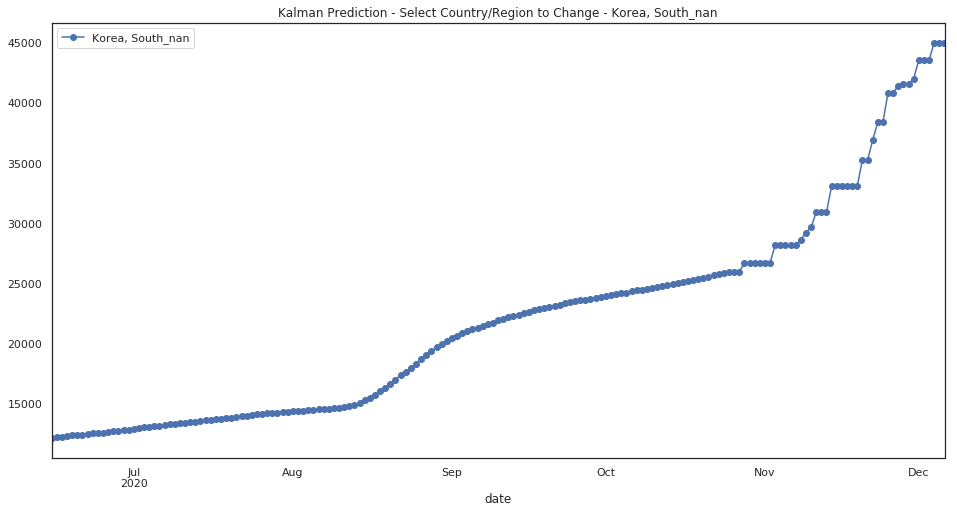

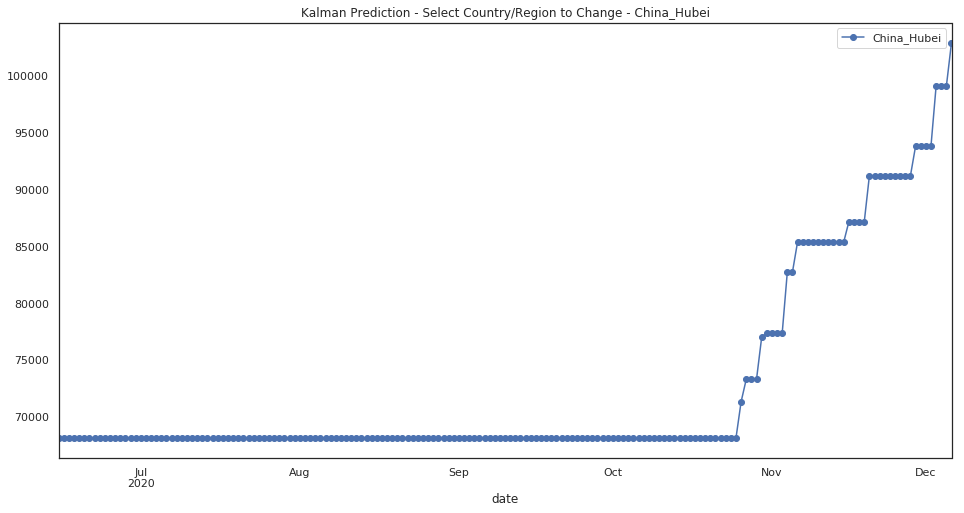

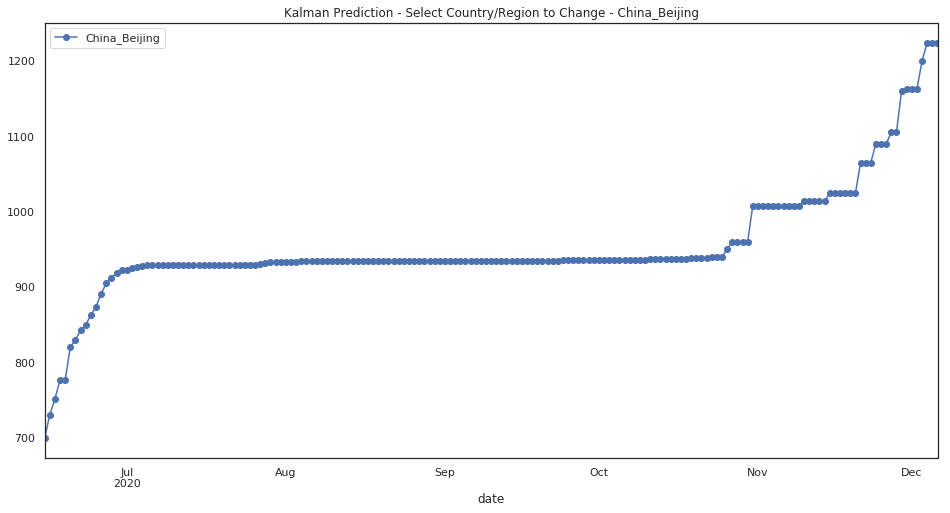

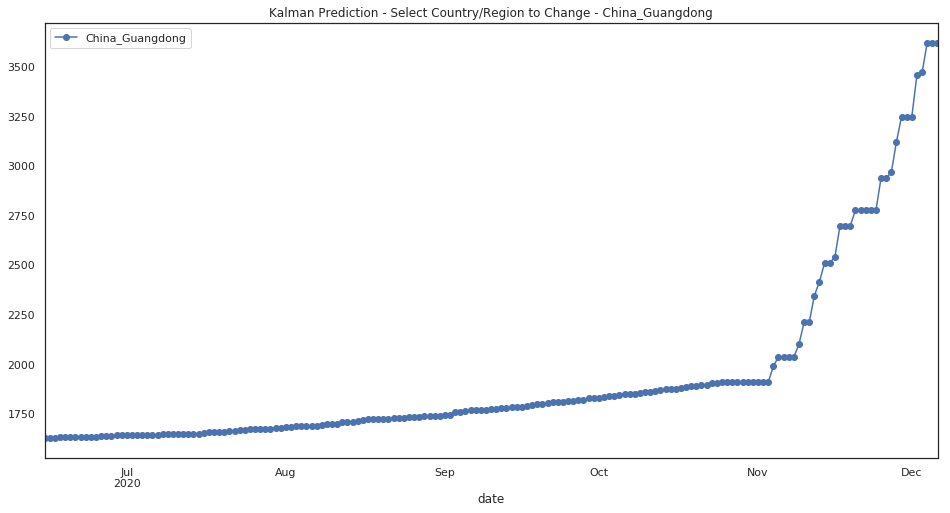

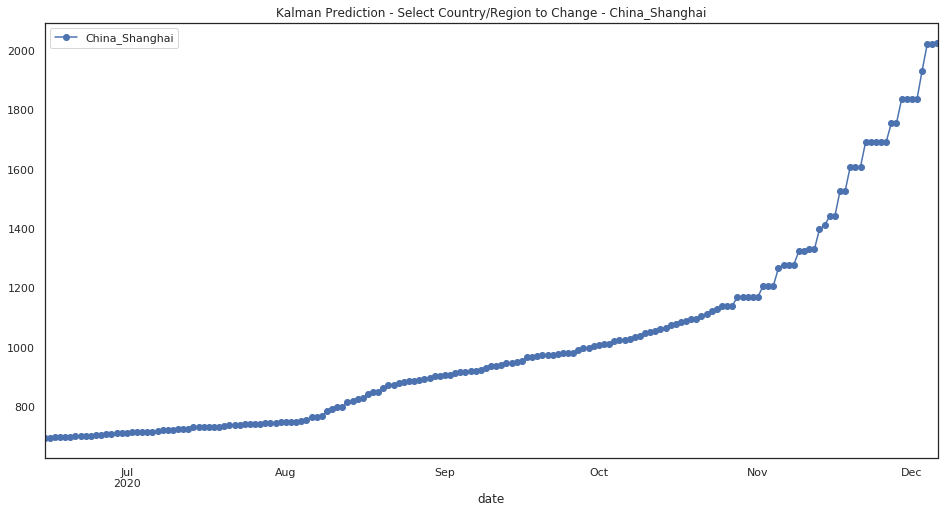

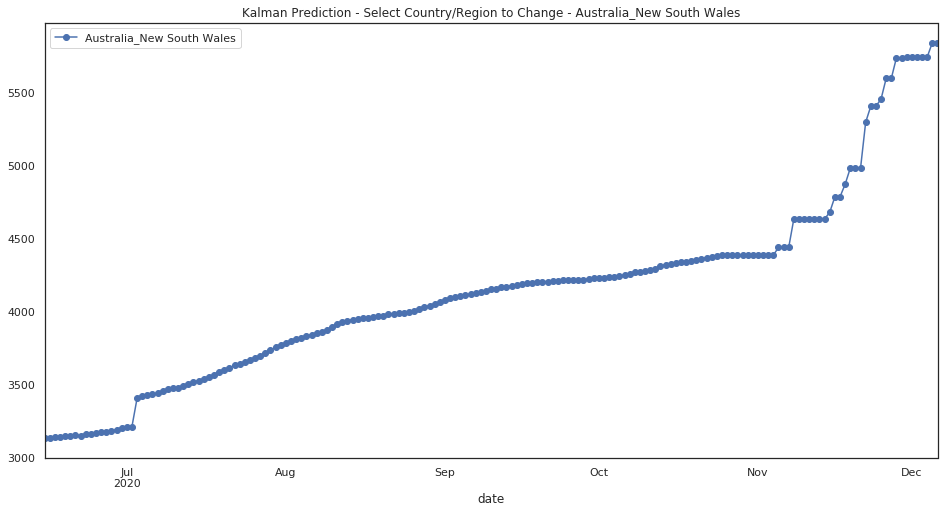

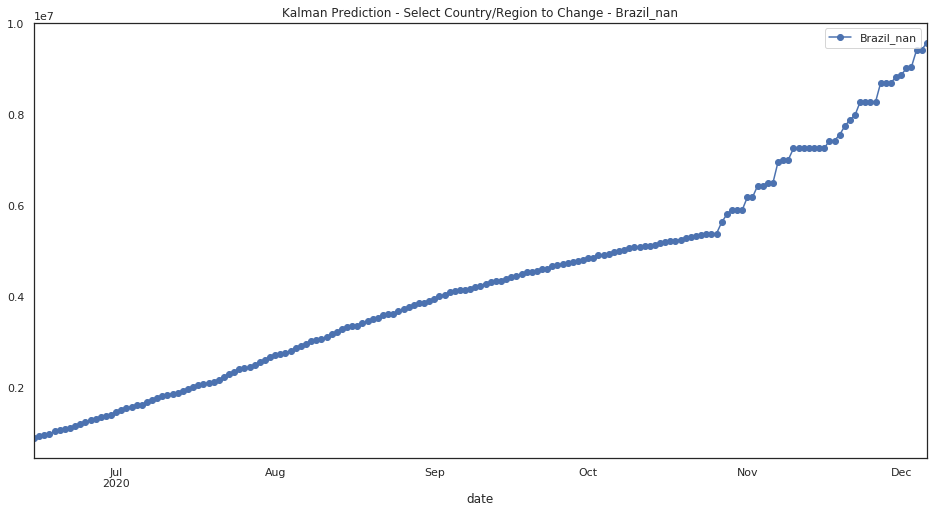

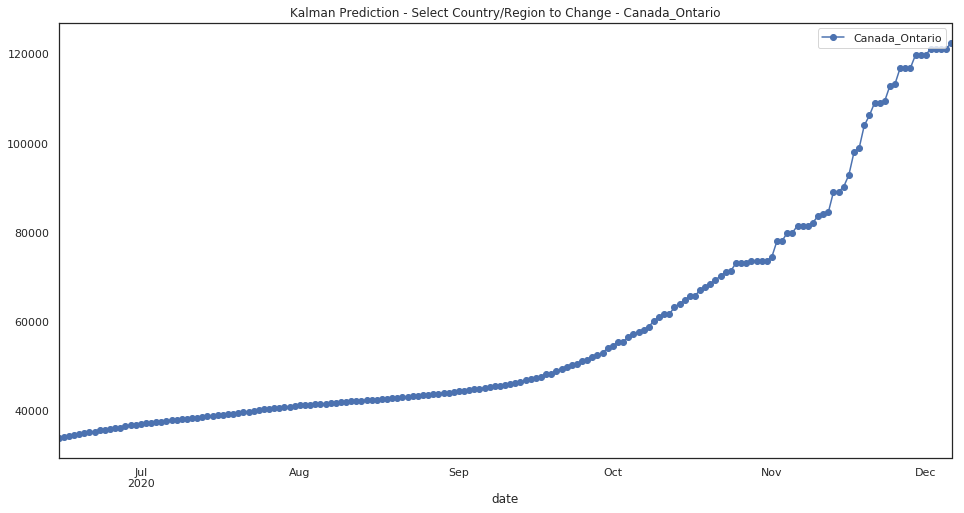

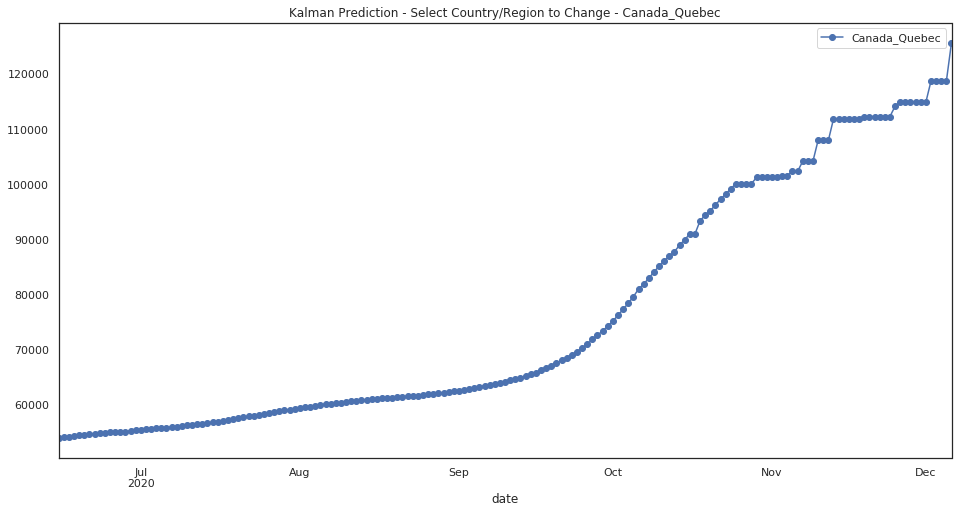

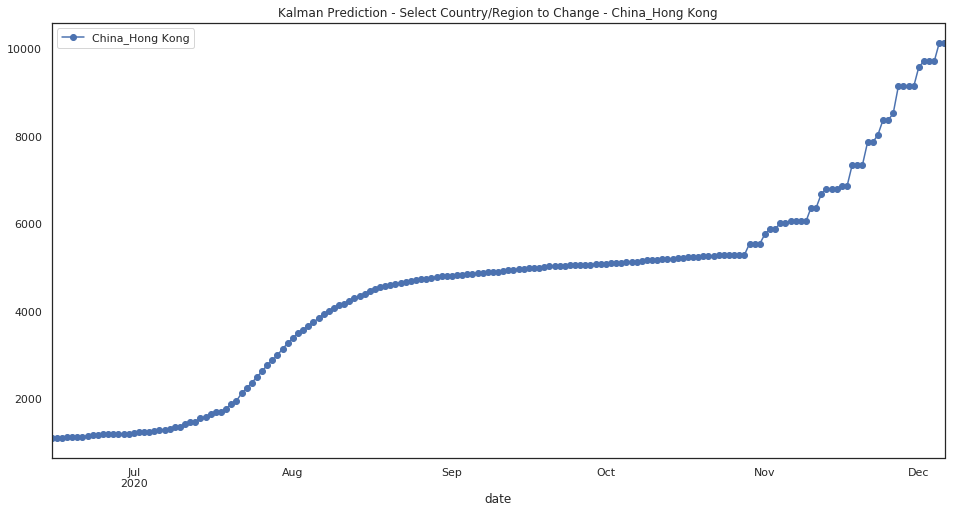

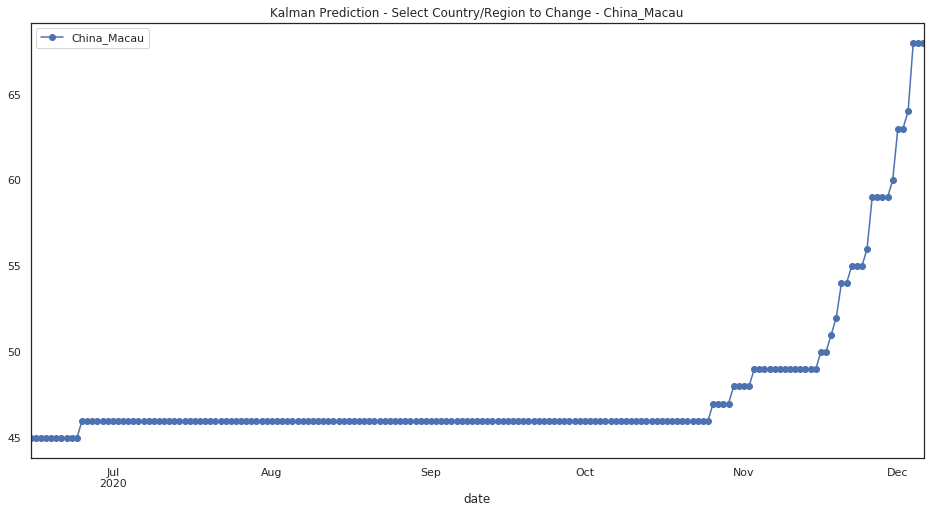

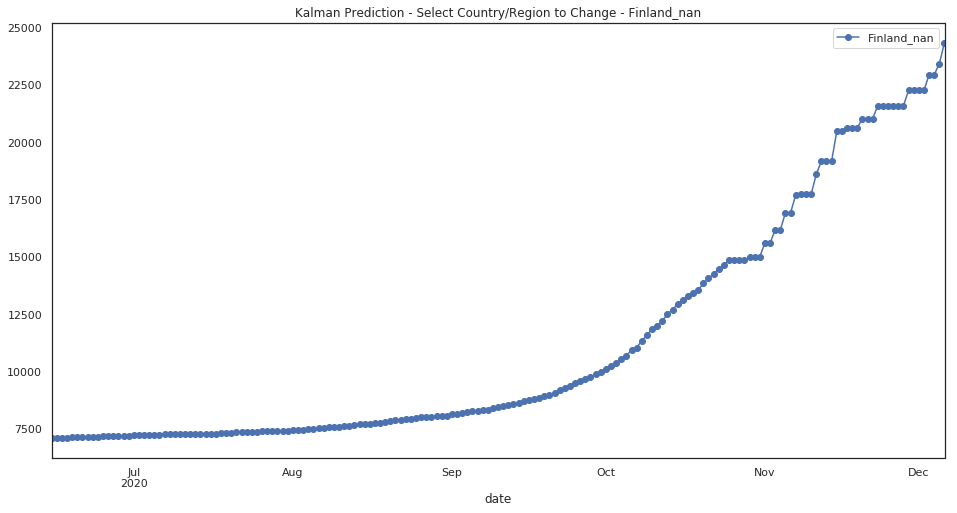

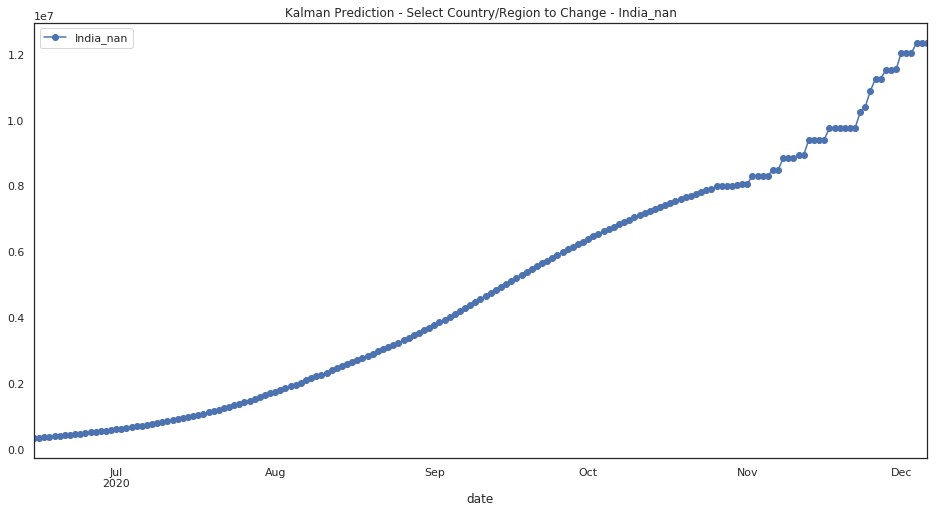

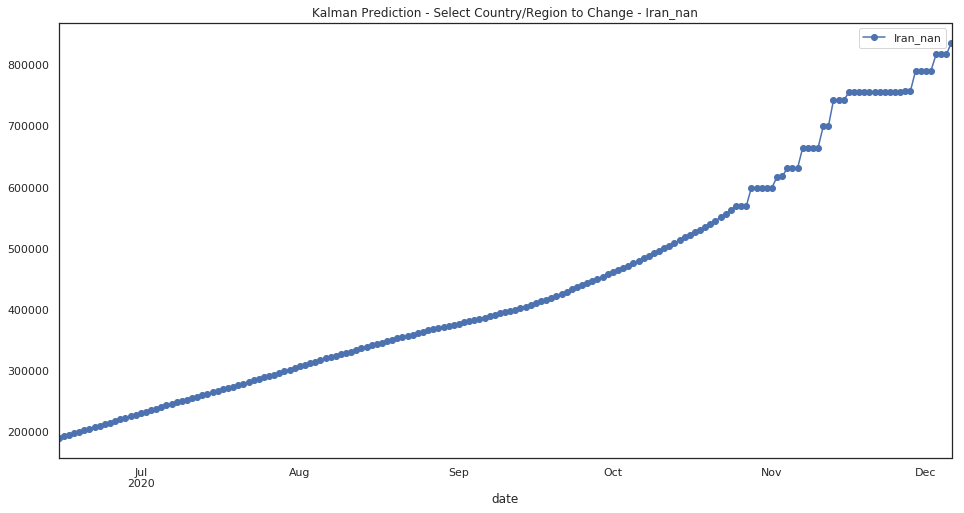

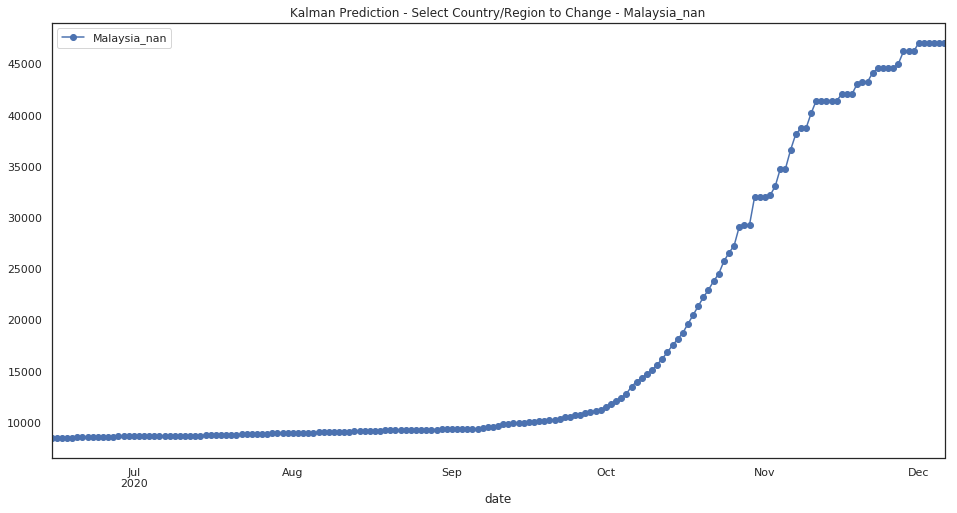

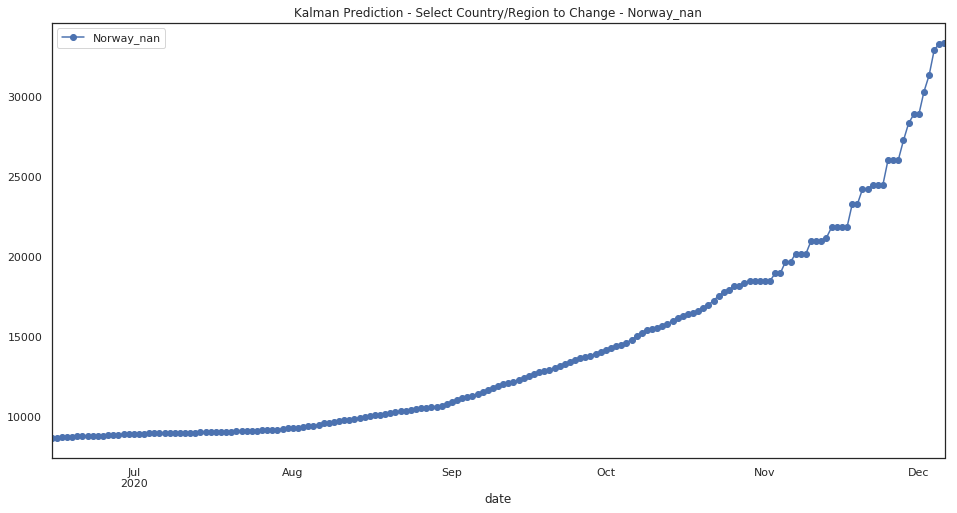

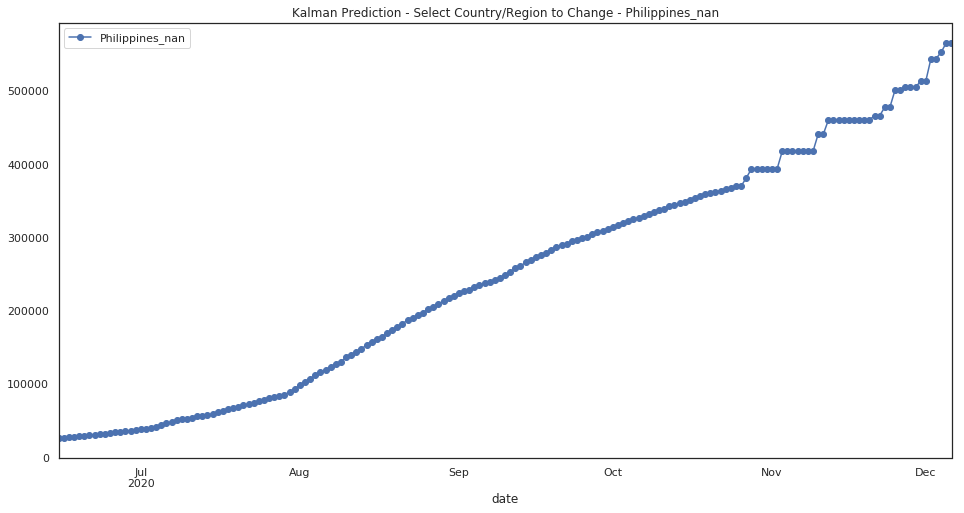

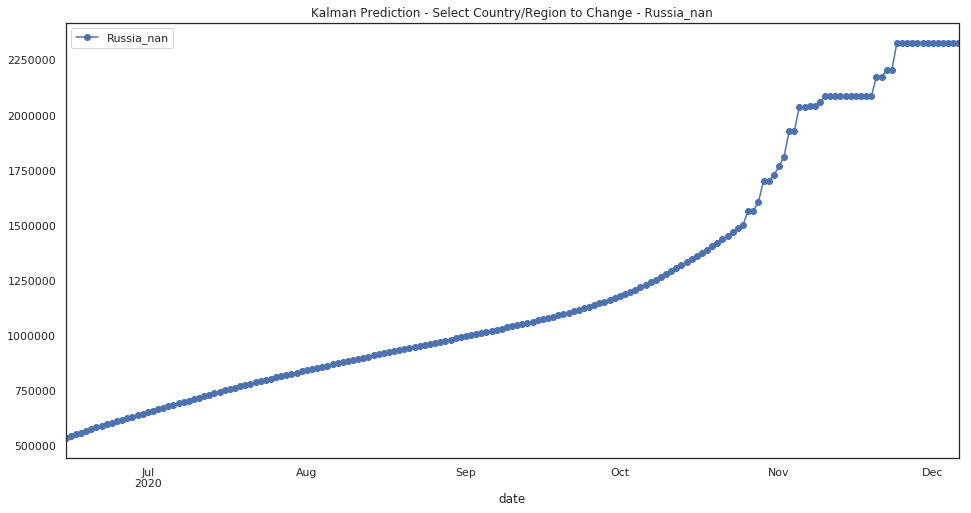

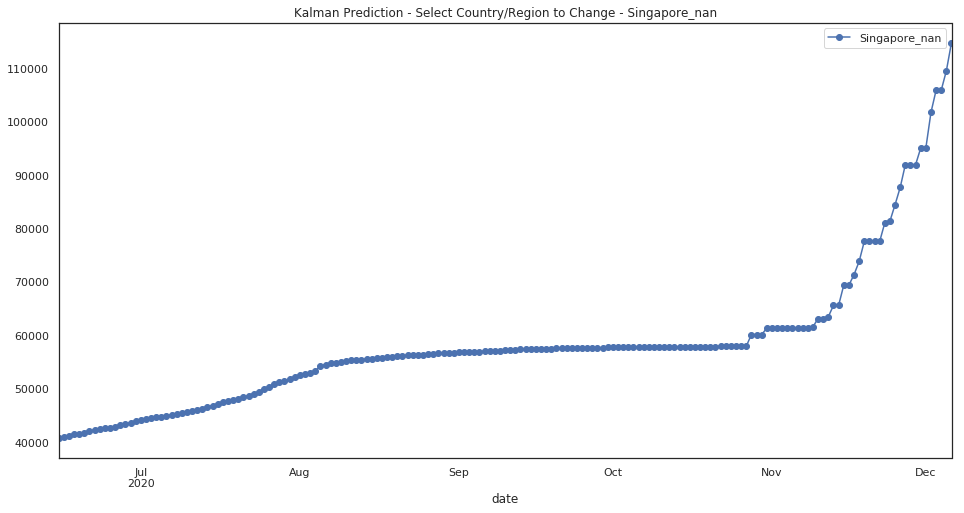

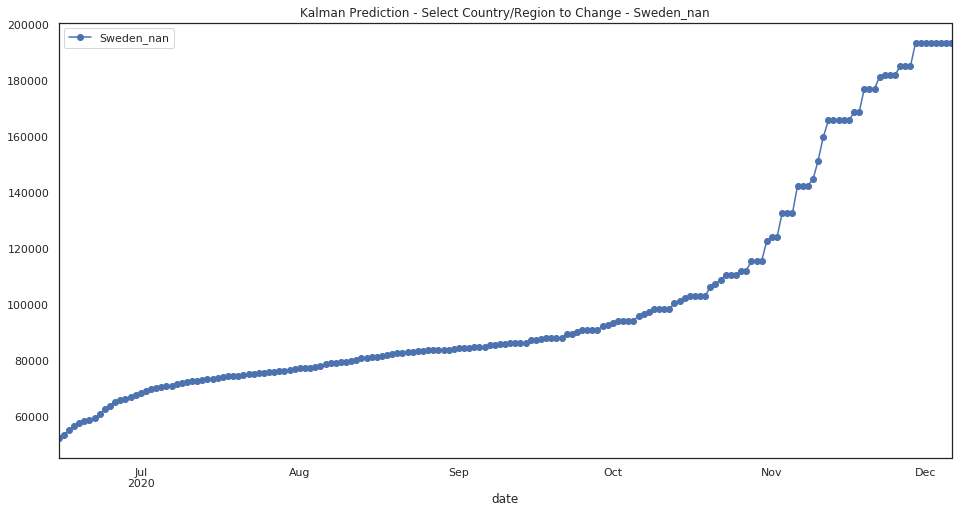

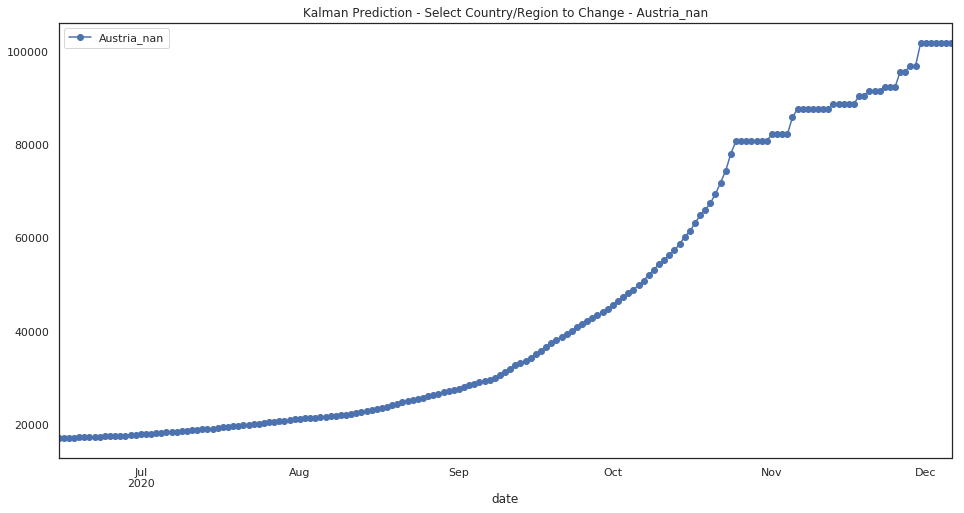

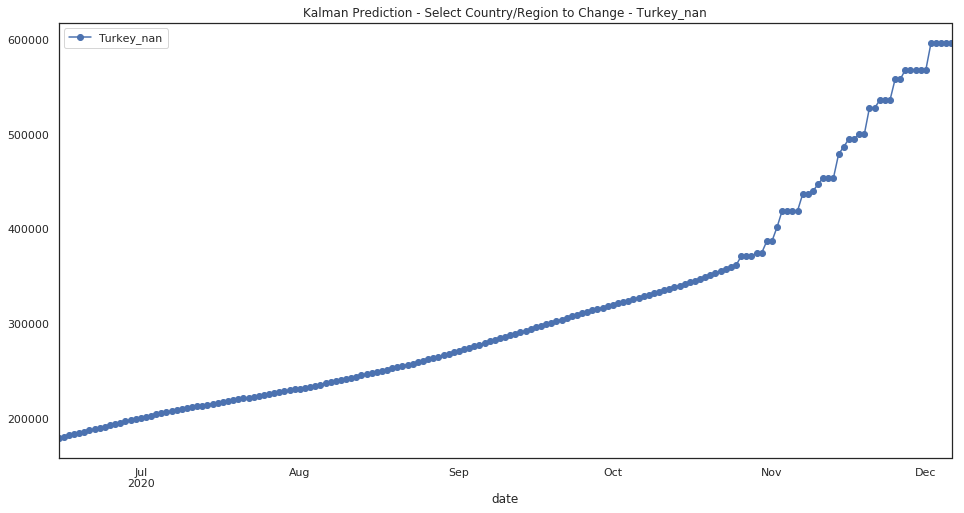

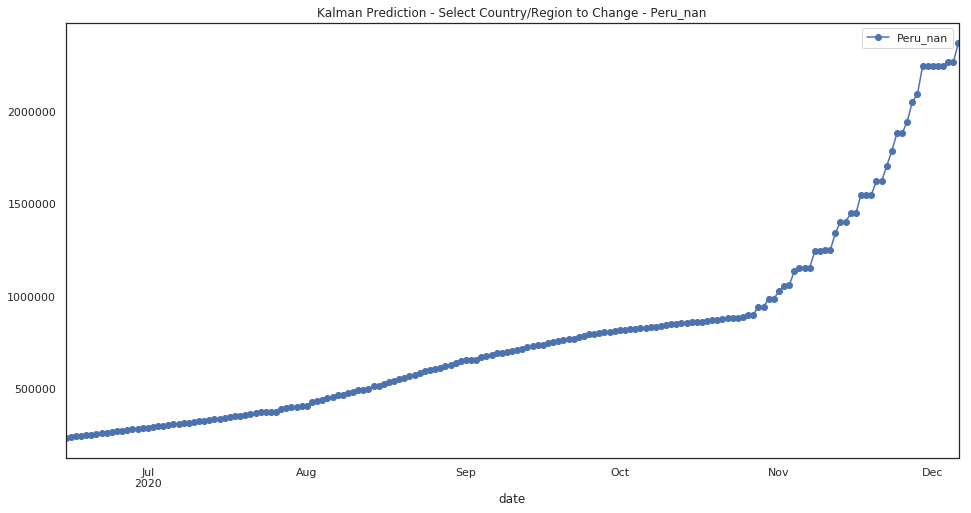

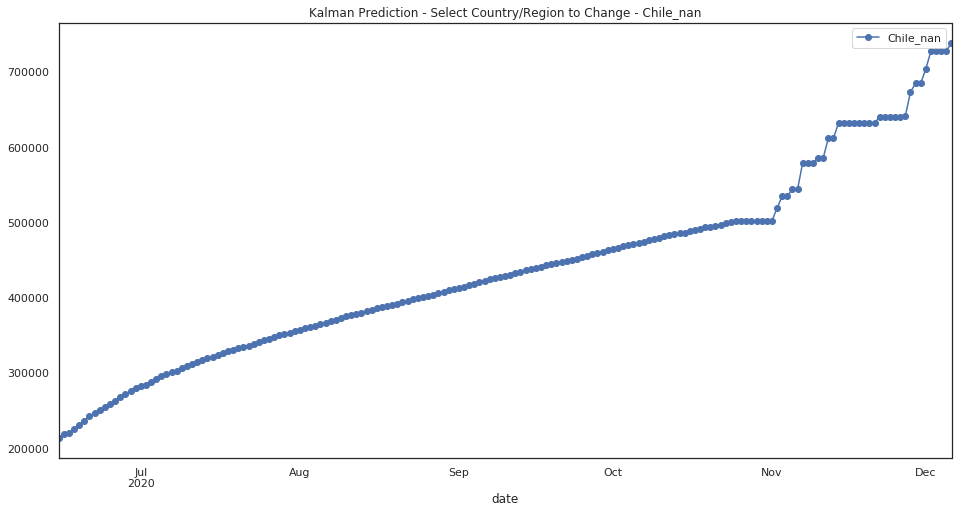

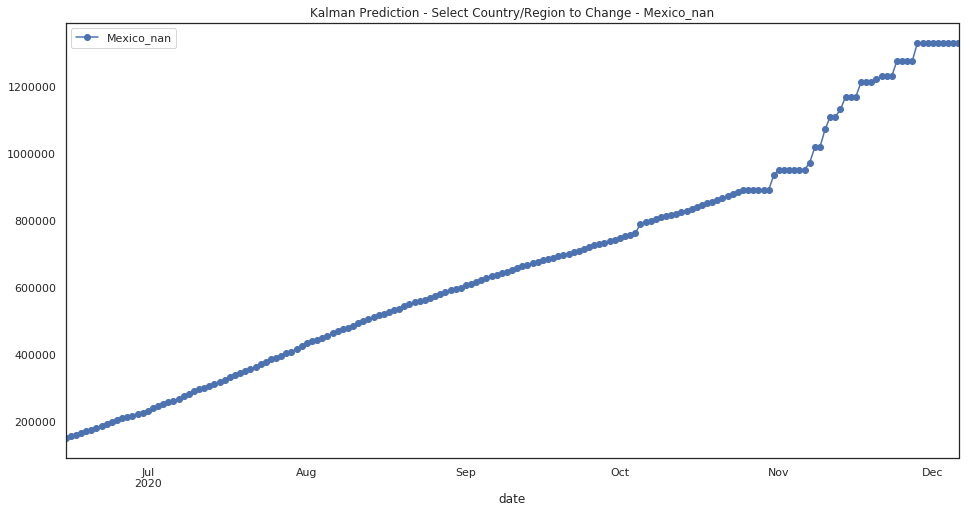

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-12-06 00:00:00
dtype: object


0  pred_confirmed
United States_nan                           NaN      14481229.0
India_nan                                   NaN      12357491.0
Brazil_nan                                  NaN       9580129.0
Peru_nan                                    NaN       2372425.0
Russia_nan                                  NaN       2329435.0
France_nan                                  NaN       1999998.0
United Kingdom_nan                          NaN       1893325.0
Colombia_nan                                NaN       1857187.0
Argentina_nan                               NaN       1817536.0
Spain_nan                                   NaN       1683434.0
South Africa_nan                            NaN       1347311.0
Mexico_nan                                  NaN       1332031.0
Italy_nan                                   NaN        990461.0
Iran_nan                                    NaN        836527.0
Germany_nan                                 NaN        779689.0
Chile_nan                                   NaN        738863.0
Saudi Arabia_nan                            NaN        731626.0
Iraq_nan                                    NaN        702647.0
Ukraine_nan                                 NaN        685925.0
Israel_nan                                  NaN        633527.0
Bangladesh_nan                              NaN        617599.0
Netherlands_nan                             NaN        613167.0
Turkey_nan                                  NaN        596469.0
Indonesia_nan                               NaN        589188.0
Belgium_nan                                 NaN        583902.0
Philippines_nan                             NaN        566066.0
Czechia_nan                                 NaN        556461.0
Poland_nan                                  NaN        476681.0
Pakistan_nan                                NaN        458270.0
Romania_nan                                 NaN        425867.0
...                                         ...             ...
France_Saint Barthelemy                     NaN           138.0
Saint Lucia_nan                             NaN           134.0
Saint Vincent and the Grenadines_nan        NaN           128.0
Canada_Prince Edward Island                 NaN           125.0
United Kingdom_British Virgin Islands       NaN           125.0
China_Ningxia                               NaN            95.0
China_Macau                                 NaN            68.0
Dominica_nan                                NaN            52.0
Fiji_nan                                    NaN            52.0
Canada_Yukon                                NaN            49.0
Timor-Leste_nan                             NaN            48.0
Australia_Northern Territory                NaN            46.0
Grenada_nan                                 NaN            44.0
France_New Caledonia                        NaN            40.0
Holy See_nan                                NaN            38.0
Saint Kitts and Nevis_nan                   NaN            30.0
Laos_nan                                    NaN            29.0
France_Saint Pierre and Miquelon            NaN            27.0
Denmark_Greenland                           NaN            26.0
Canada_Grand Princess                       NaN            23.0
China_Qinghai                               NaN            22.0
Canada_Northwest Territories                NaN            20.0
United Kingdom_Montserrat                   NaN            16.0
United Kingdom_Falkland Islands (Malvinas)  NaN            16.0
Western Sahara_nan                          NaN            10.0
MS Zaandam_nan                              NaN             9.0
Solomon Islands_nan                         NaN             4.0
United Kingdom_Anguilla                     NaN             3.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             0.0

[267 rows x 2 columns]

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-06-15          31681.0      11054.0      19189.0      10419.0   
2020-06-16          32356.0      11125.0      19289.0      10420.0   
2020-06-17          26310.0       1672.0      11147.0        854.0   
2020-06-18          26874.0       1722.0      11268.0        854.0   
2020-06-19          27605.0       1788.0      11385.0        855.0   
2020-06-20          28071.0       1838.0      11504.0        855.0   
2020-06-21          28542.0       1891.0      11631.0        855.0   
2020-06-22          28855.0       1962.0      11771.0        855.0   
2020-06-23          29503.0       2125.0      12115.0       1042.0   
2020-06-24          29699.0       2091.0      12284.0       1042.0   
2020-06-25          30158.0       2114.0      12475.0       1042.0   
2020-06-26          30556.0       2192.0      12704.0       1041.0   
2020-06-27          30679.0       2269.0      12972.0       1041.0   
2020-06-28          30987.0       2385.0      13267.0       1041.0   
2020-06-29          31319.0       2407.0      13565.0       1041.0   
2020-06-30          31579.0       2515.0      13901.0       1041.0   
2020-07-01          31894.0       2553.0      14258.0       1041.0   
2020-07-02          32106.0       2711.0      14639.0       1041.0   
2020-07-03          32368.0       2673.0      15050.0       1041.0   
2020-07-04          32739.0       2752.0      15478.0       1041.0   
2020-07-05          33035.0       2889.0      15920.0       1041.0   
2020-07-06          33262.0       2940.0      16383.0       1041.0   
2020-07-07          33453.0       3023.0      16858.0       1041.0   
2020-07-08          33654.0       3088.0      17331.0       1041.0   
2020-07-09          33963.0       3191.0      17796.0       1041.0   
2020-07-10          34277.0       3244.0      18237.0       1041.0   
2020-07-11          34456.0       3321.0      18706.0       1041.0   
2020-07-12          34526.0       3410.0      19189.0       1041.0   
2020-07-13          34527.0       3553.0      19684.0       1044.0   
2020-07-14          34762.0       3580.0      20210.0       1015.0   
...                     ...          ...          ...          ...   
2020-11-08          46289.0      24580.0      64014.0       5623.0   
2020-11-09          45743.0      24822.0      64785.0       5640.0   
2020-11-10          45743.0      24702.0      68987.0       5700.0   
2020-11-11          46116.0      24717.0      70581.0       5695.0   
2020-11-12          47982.0      25749.0      69216.0       5687.0   
2020-11-13          48718.0      26080.0      73659.0       5769.0   
2020-11-14          49089.0      25888.0      79145.0       5647.0   
2020-11-15          49718.0      25907.0      78356.0       5928.0   
2020-11-16          49344.0      26719.0      77955.0       5849.0   
2020-11-17          50473.0      27486.0      83302.0       6025.0   
2020-11-18          51913.0      27499.0      85851.0       6067.0   
2020-11-19          53795.0      27383.0      84025.0       6432.0   
2020-11-20          54574.0      27422.0      86505.0       6273.0   
2020-11-21          53893.0      27432.0      88755.0       6512.0   
2020-11-22          53893.0      27432.0      88550.0       6855.0   
2020-11-23          55003.0      28513.0      89401.0       6940.0   
2020-11-24          55641.0      28916.0      92412.0       6885.0   
2020-11-25          55234.0      28903.0      96893.0       7491.0   
2020-11-26          55234.0      28990.0      96251.0       7410.0   
2020-11-27          55288.0      29670.0      95650.0       7778.0   
2020-11-28          55288.0      29941.0      95650.0       8137.0   
2020-11-29          55288.0      30068.0      95650.0       8111.0   
2020-11-30          57667.0      30188.0      95650.0       8678.0   
2020-12-01          59759.0      30147.0      95650.0       8989.0   
2020-12-02

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Peru_nan',
 'Russia_nan',
 'France_nan',
 'United Kingdom_nan',
 'Colombia_nan',
 'Argentina_nan',
 'Spain_nan',
 'South Africa_nan',
 'Mexico_nan',
 'Italy_nan',
 'Iran_nan',
 'Germany_nan',
 'Chile_nan',
 'Saudi Arabia_nan',
 'Iraq_nan',
 'Ukraine_nan',
 'Israel_nan',
 'Bangladesh_nan',
 'Netherlands_nan',
 'Turkey_nan',
 'Indonesia_nan',
 'Belgium_nan',
 'Philippines_nan',
 'Czechia_nan',
 'Poland_nan',
 'Pakistan_nan',
 'Romania_nan',
 'Nepal_nan',
 'Morocco_nan',
 'Guatemala_nan',
 'Panama_nan',
 'Ecuador_nan',
 'Bolivia_nan',
 'Kuwait_nan',
 'Qatar_nan',
 'United Arab Emirates_nan',
 'Egypt_nan',
 'Honduras_nan',
 'Dominican Republic_nan',
 'Sweden_nan',
 'Switzerland_nan',
 'Ethiopia_nan',
 'Portugal_nan',
 'Kazakhstan_nan',
 'Costa Rica_nan',
 'Bahrain_nan',
 'Oman_nan',
 'Venezuela_nan',
 'Belarus_nan',
 'Japan_nan',
 'Hungary_nan',
 'Canada_Quebec',
 'Canada_Ontario',
 'Moldova_nan',
 'Singapore_nan',
 'Armenia_nan',
 'Liby

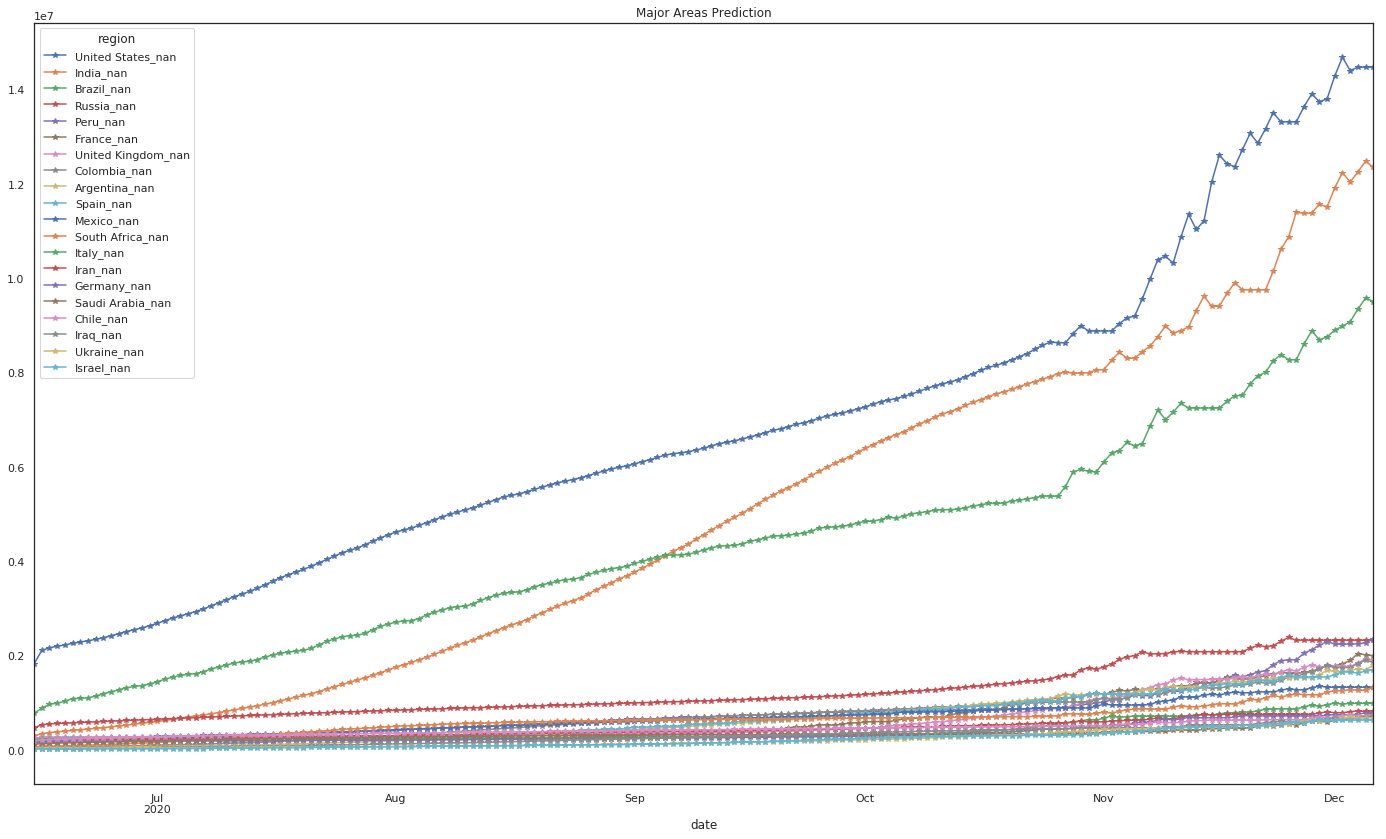

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

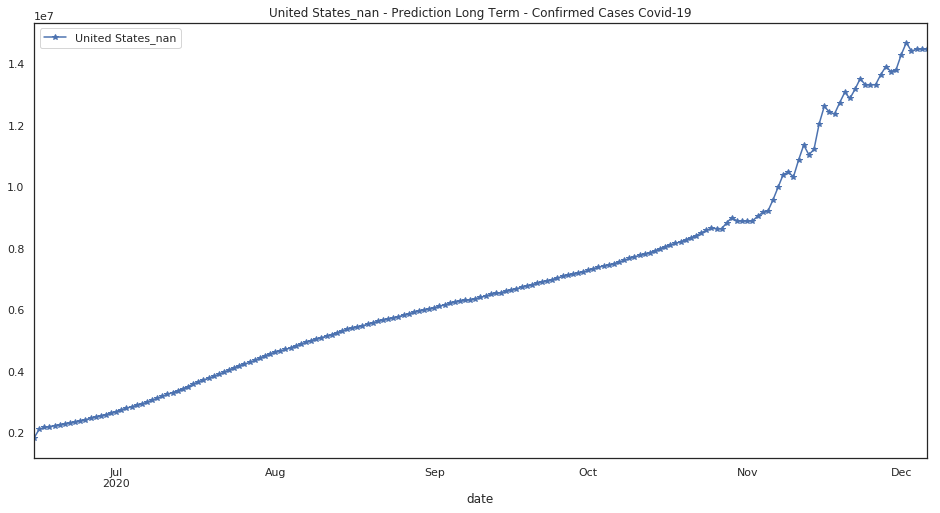

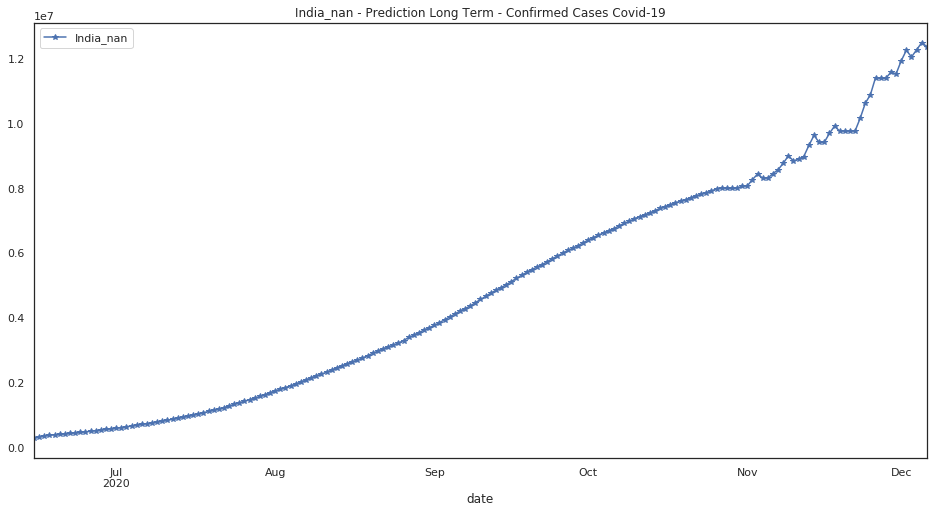

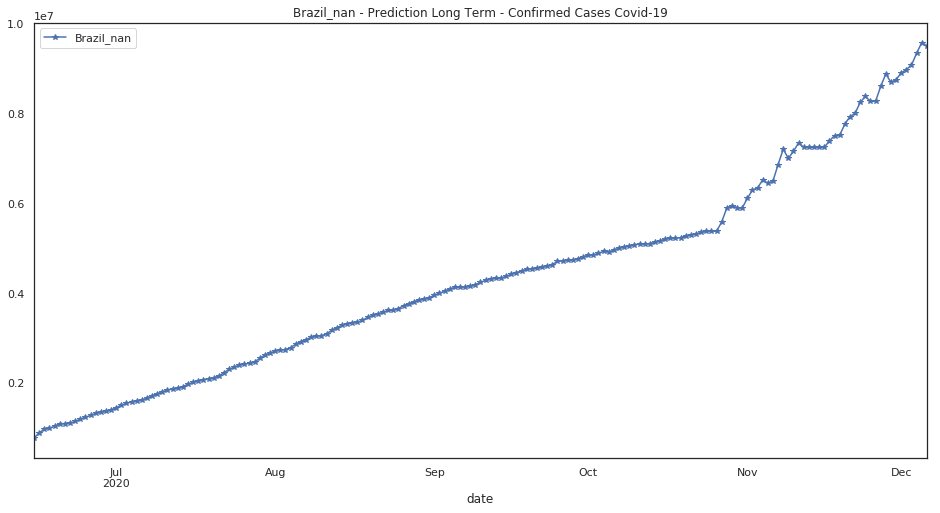

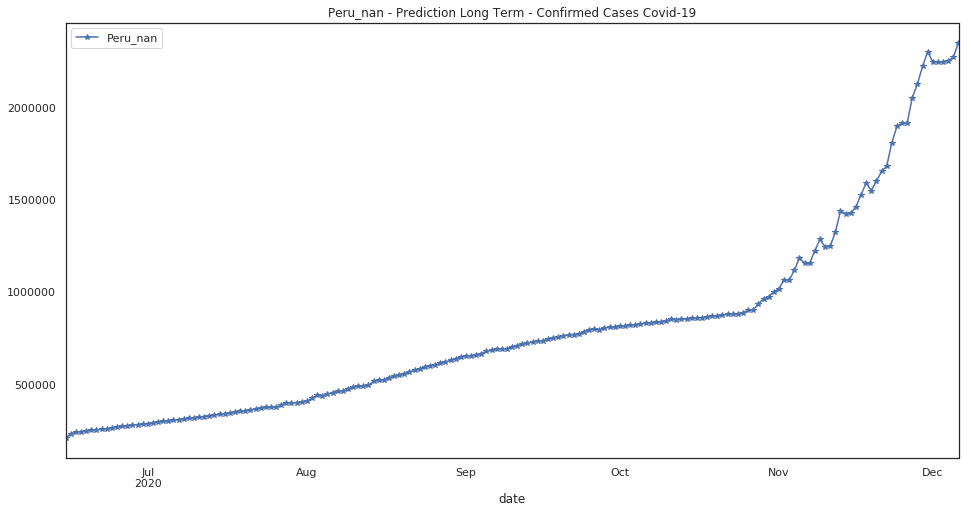

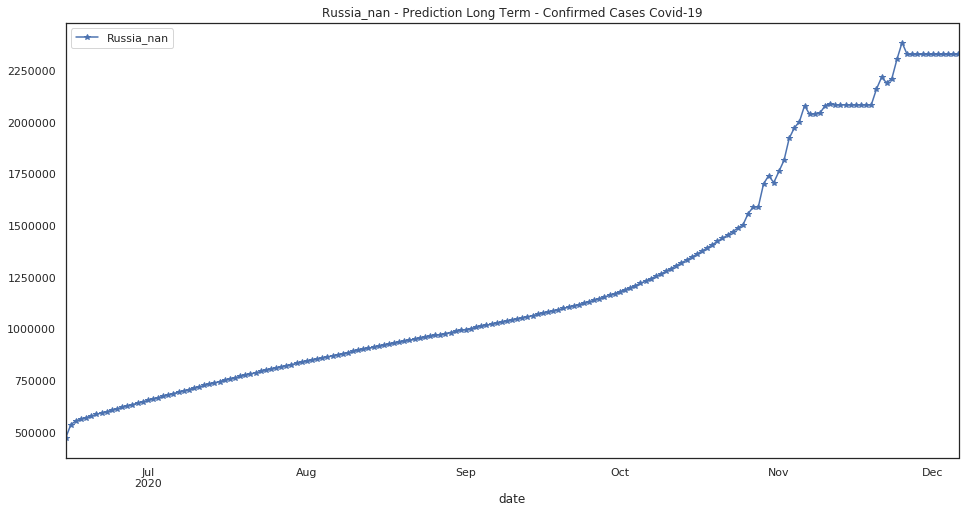

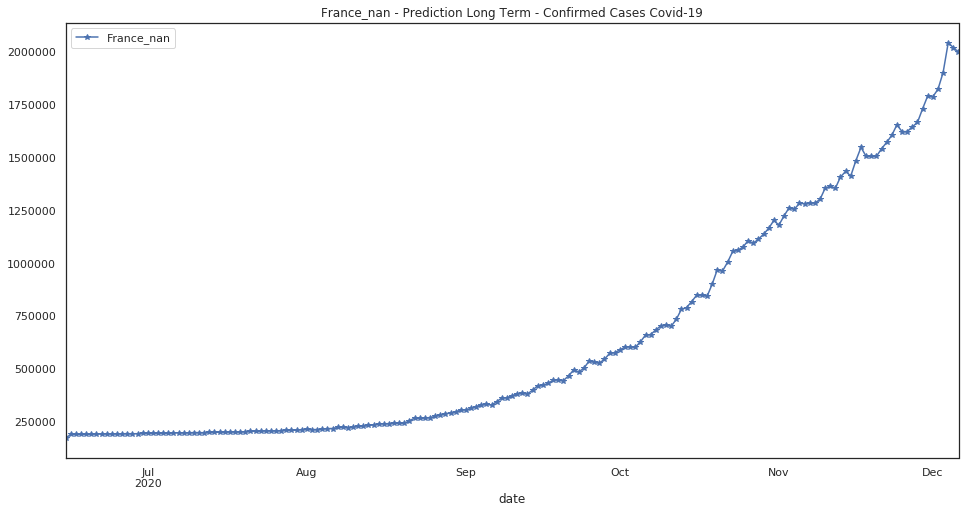

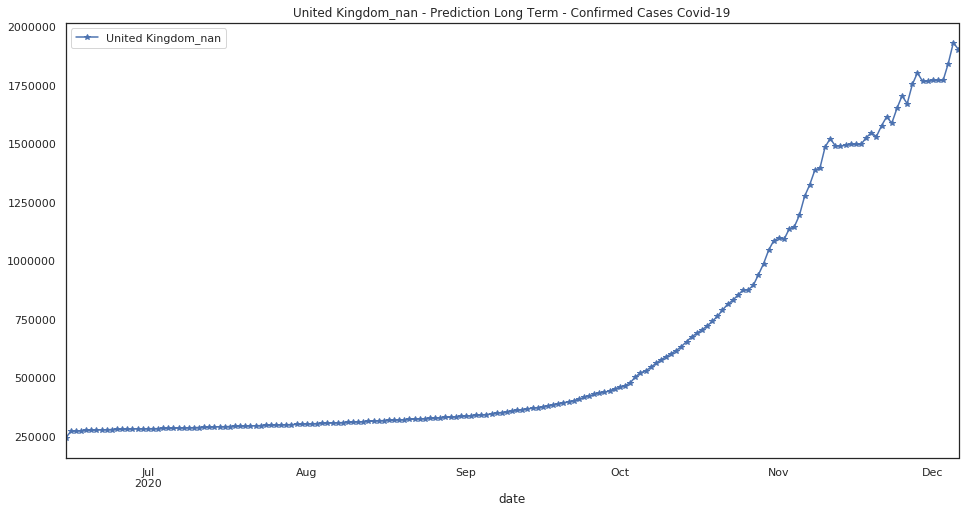

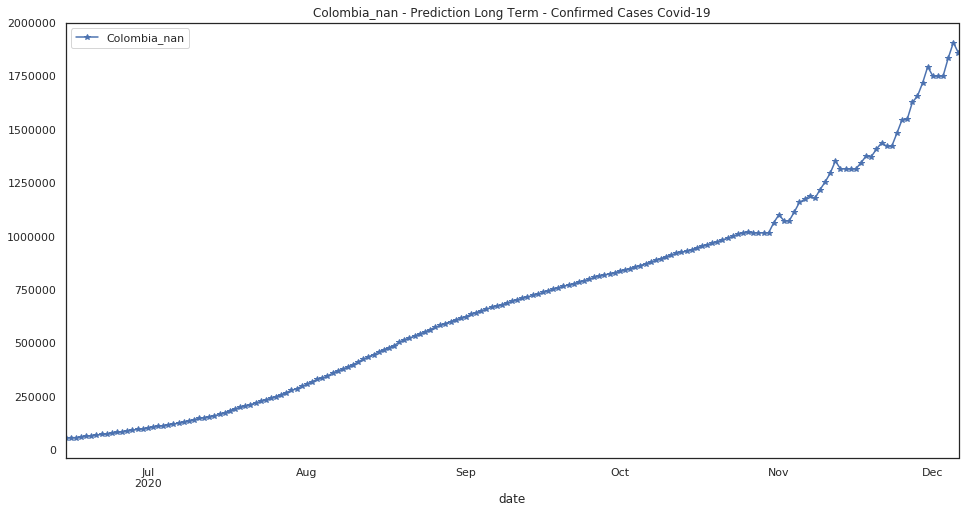

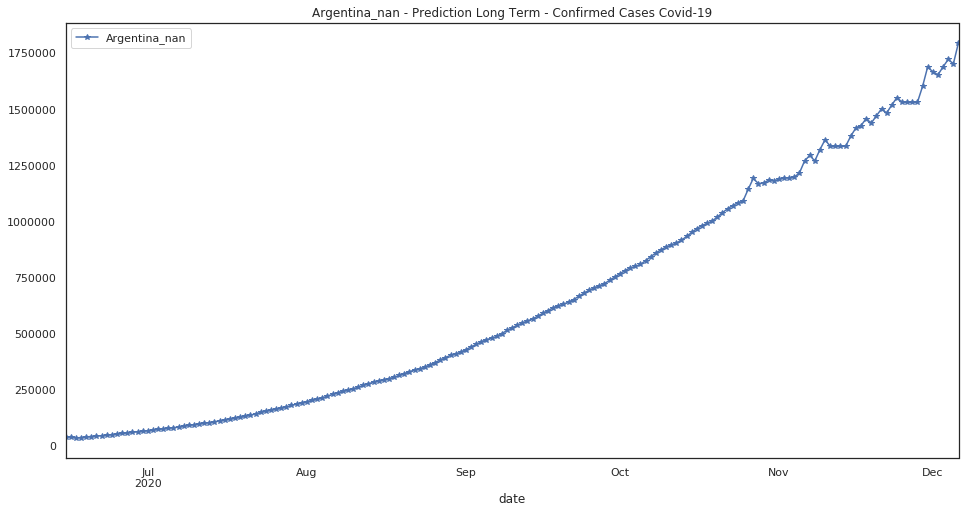

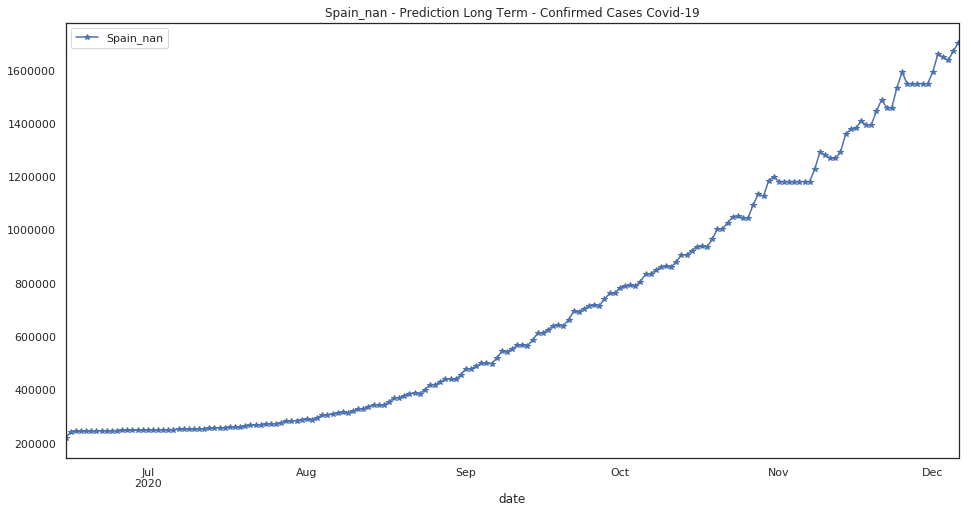

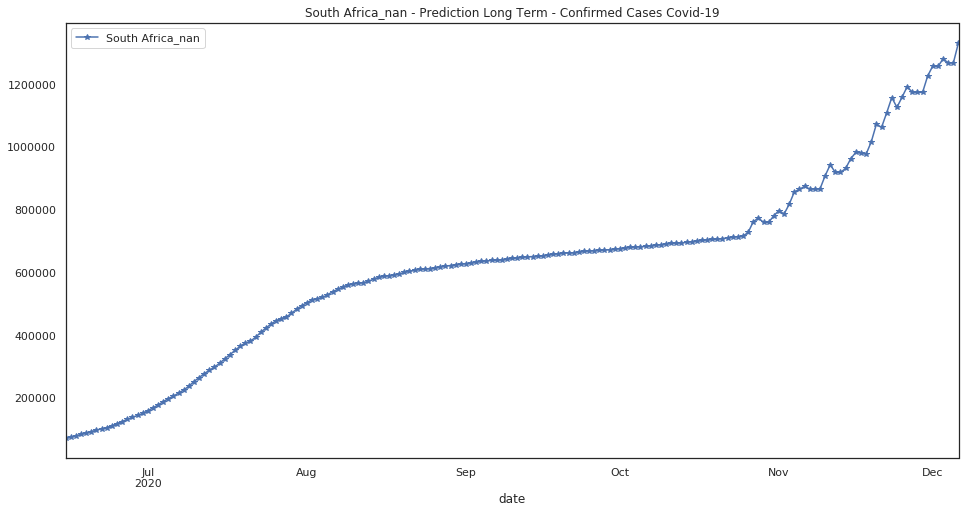

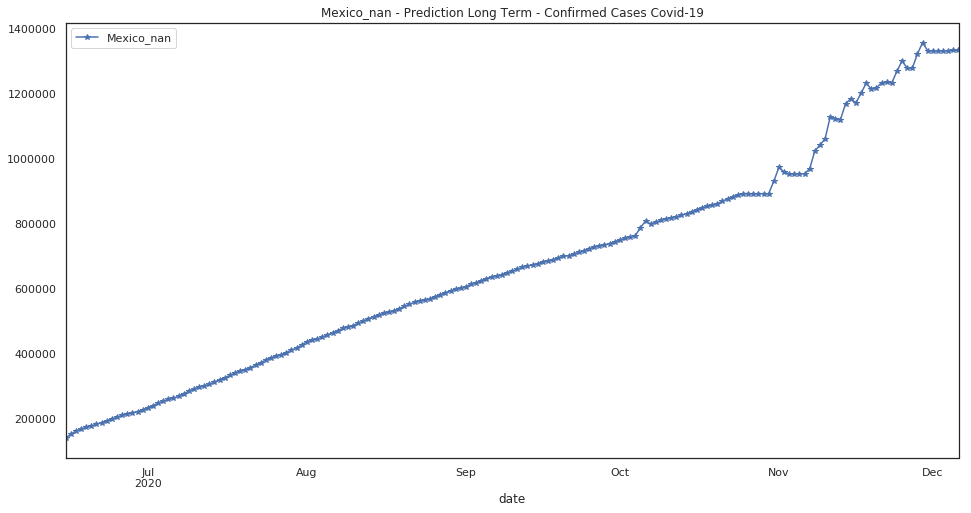

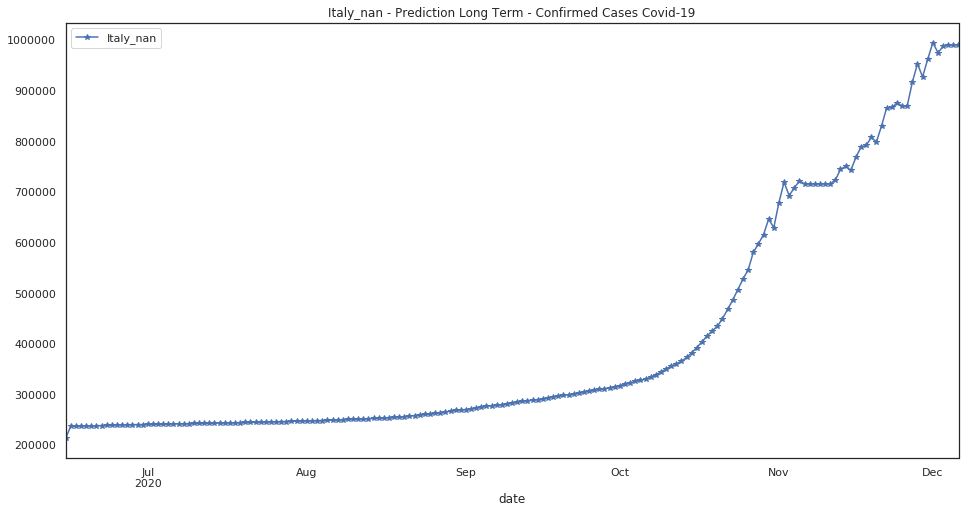

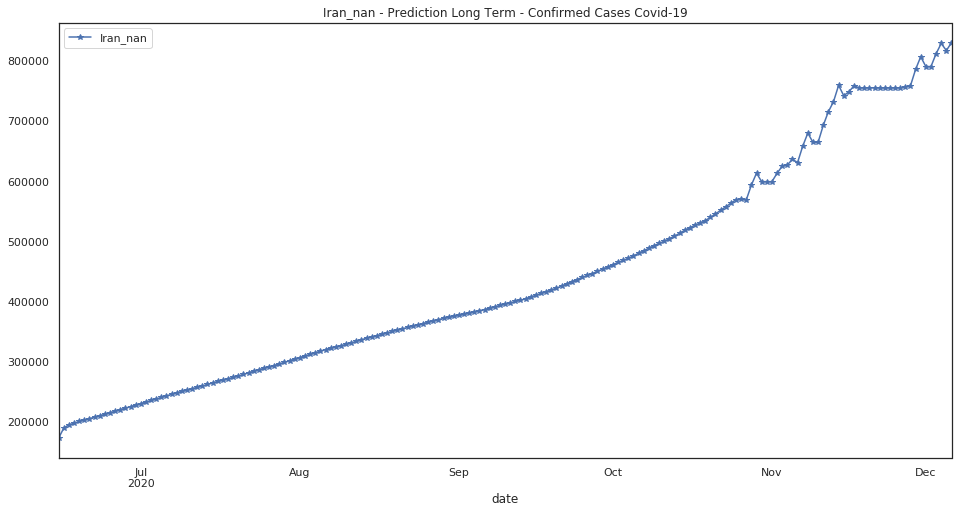

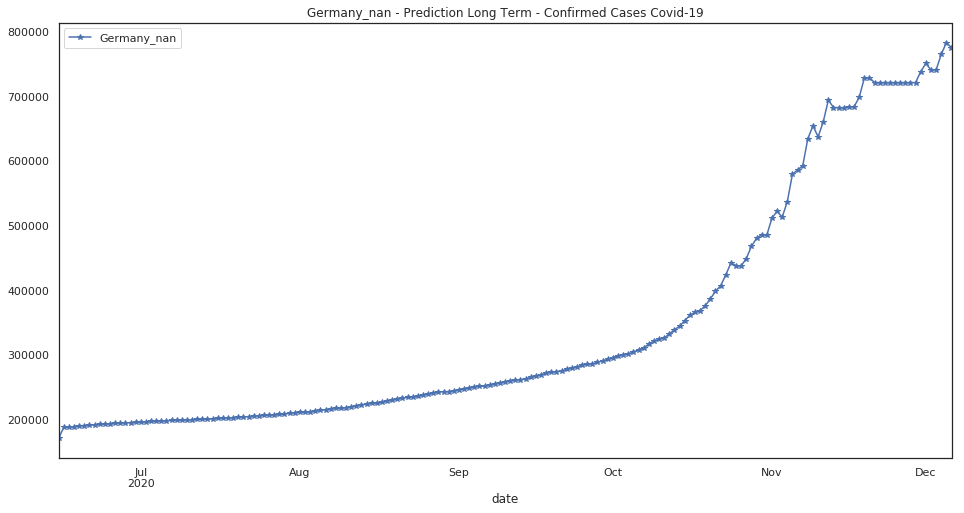

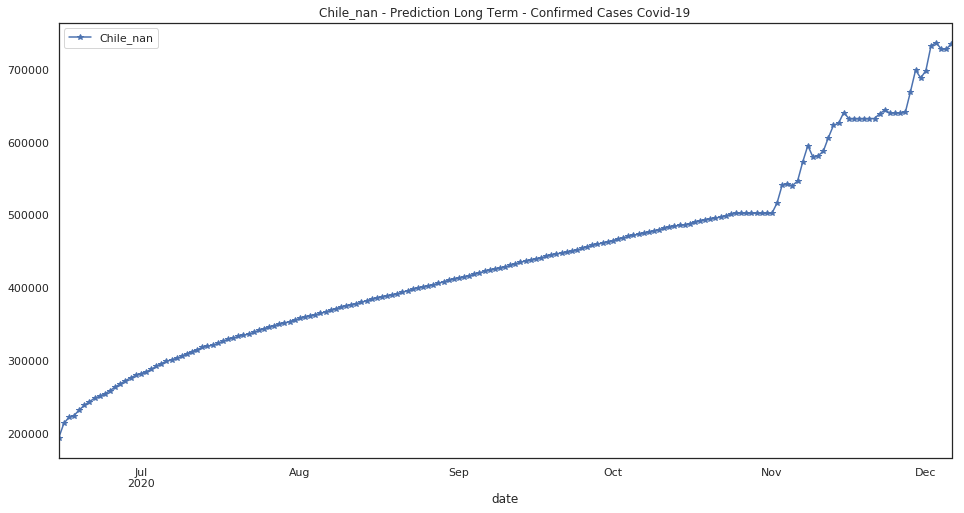

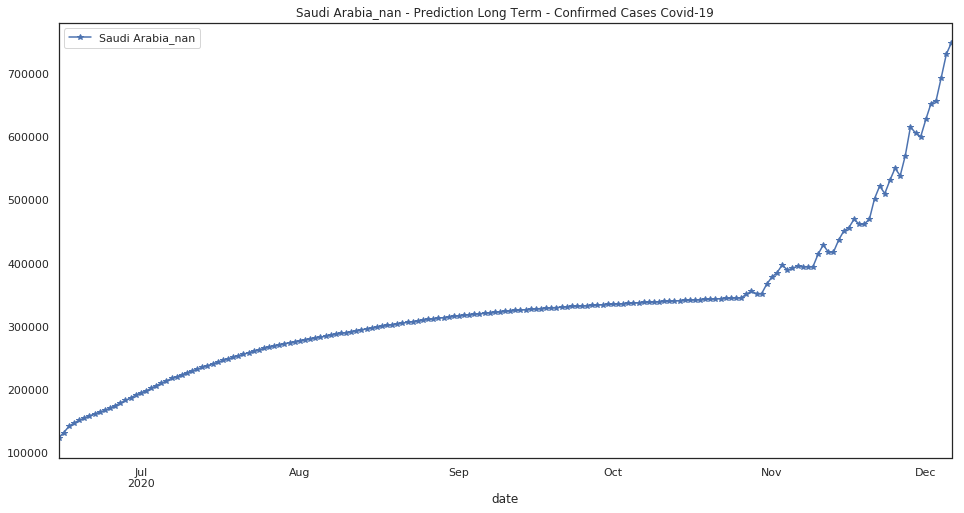

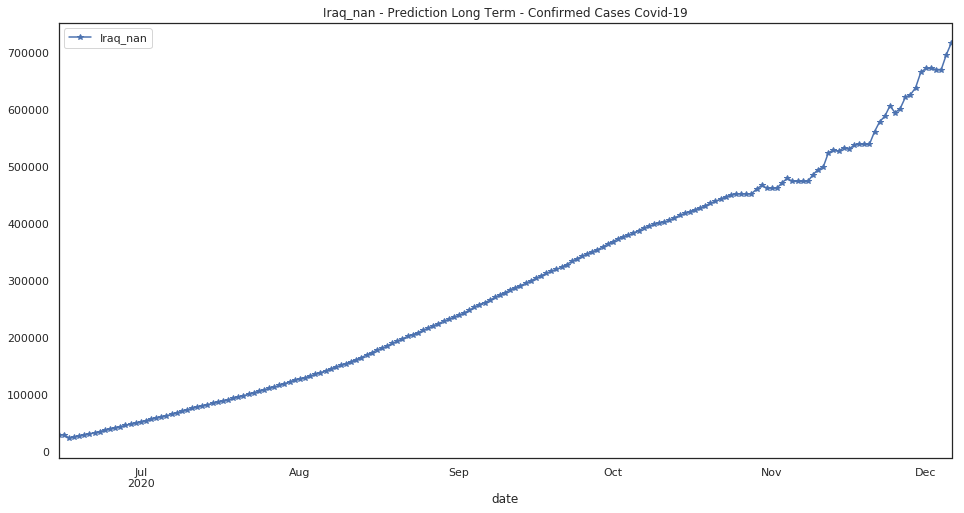

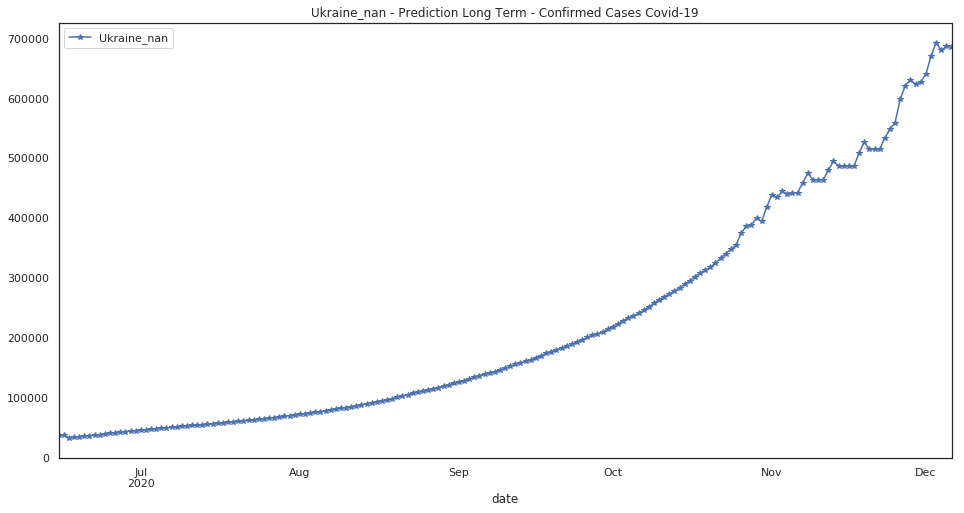

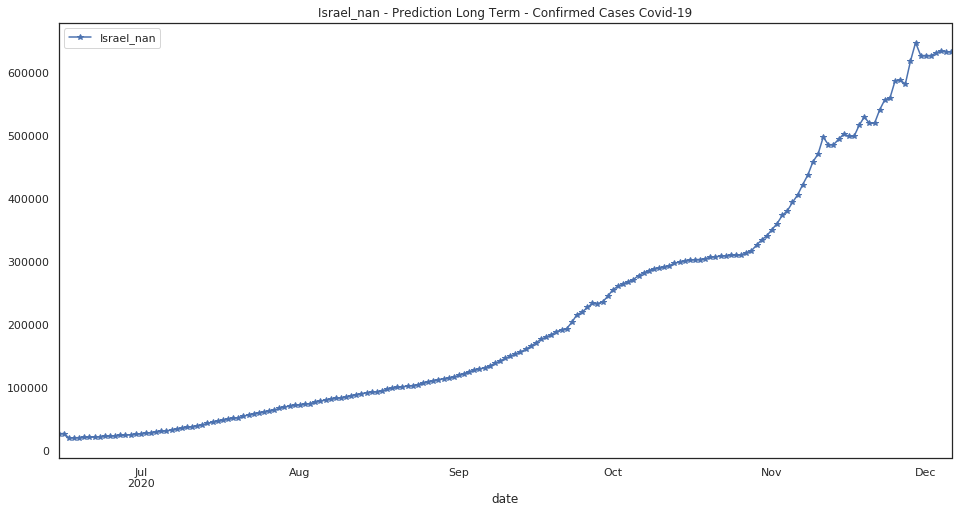

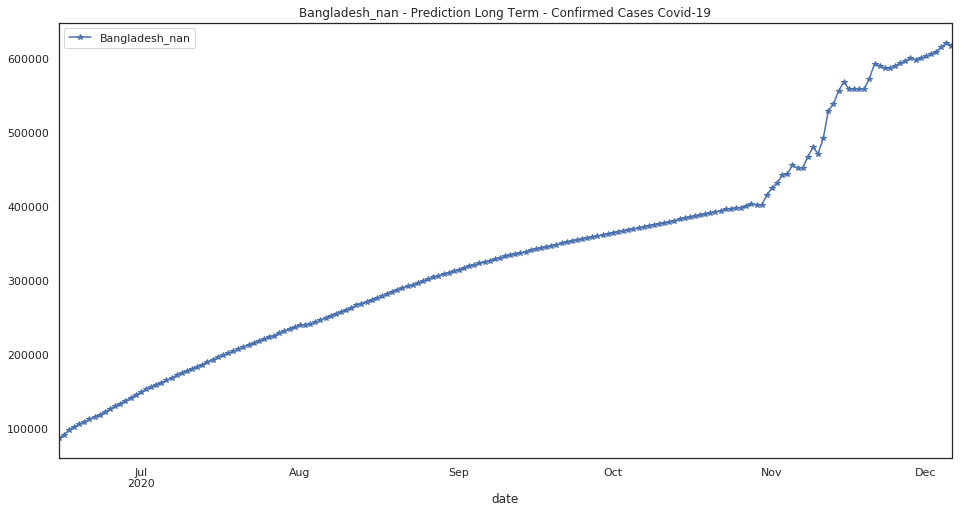

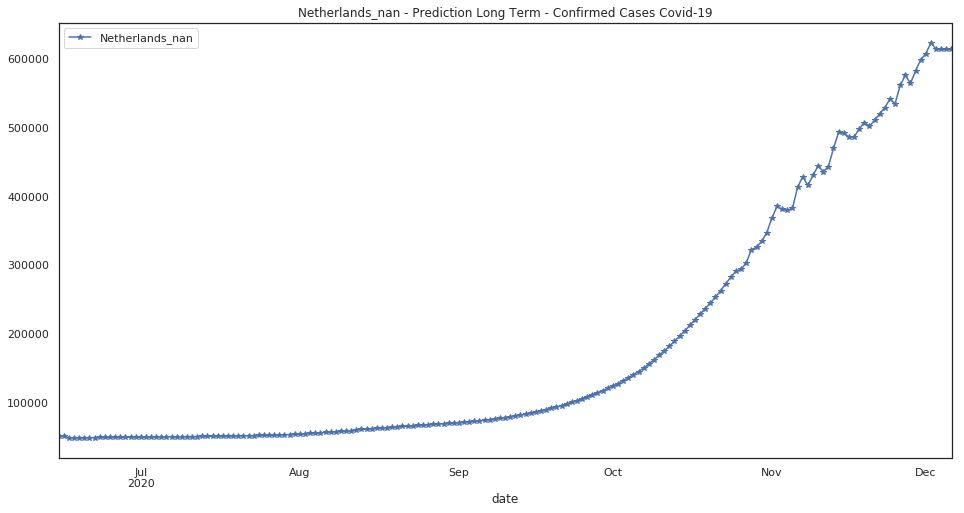

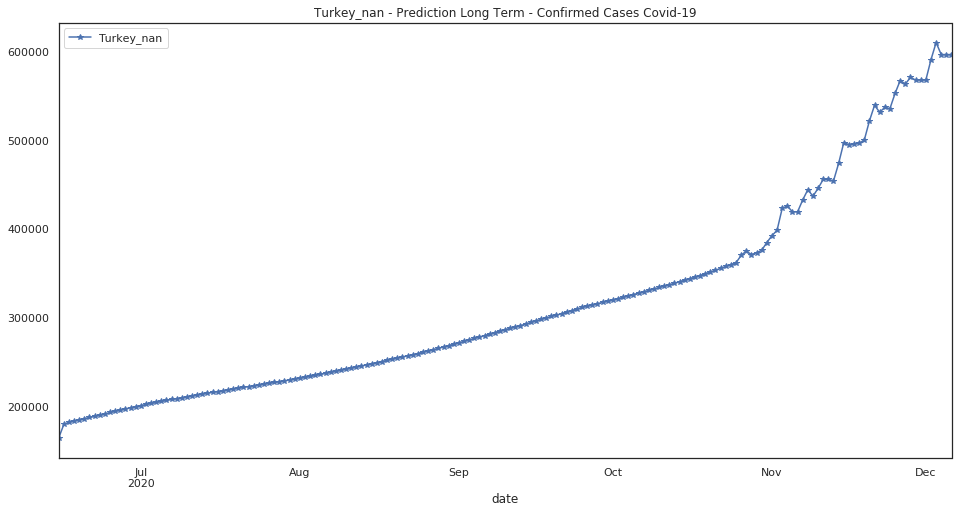

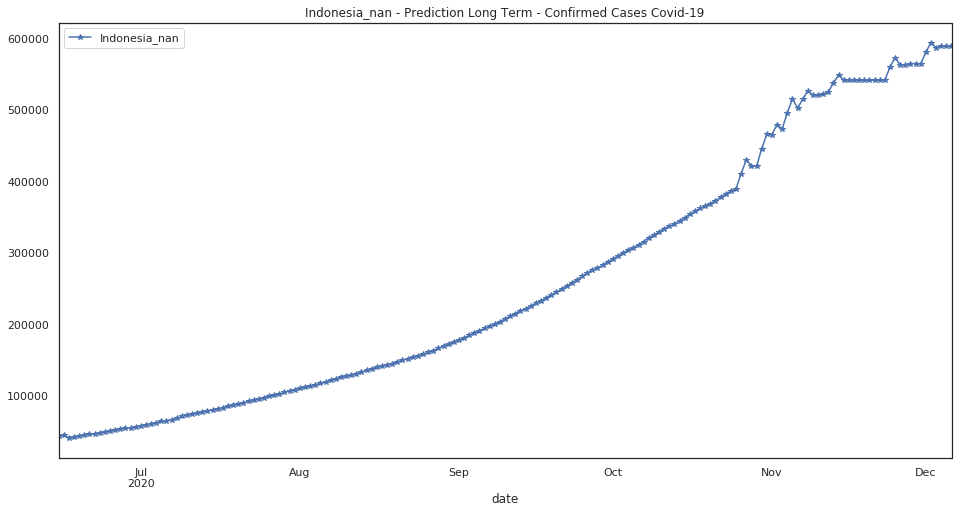

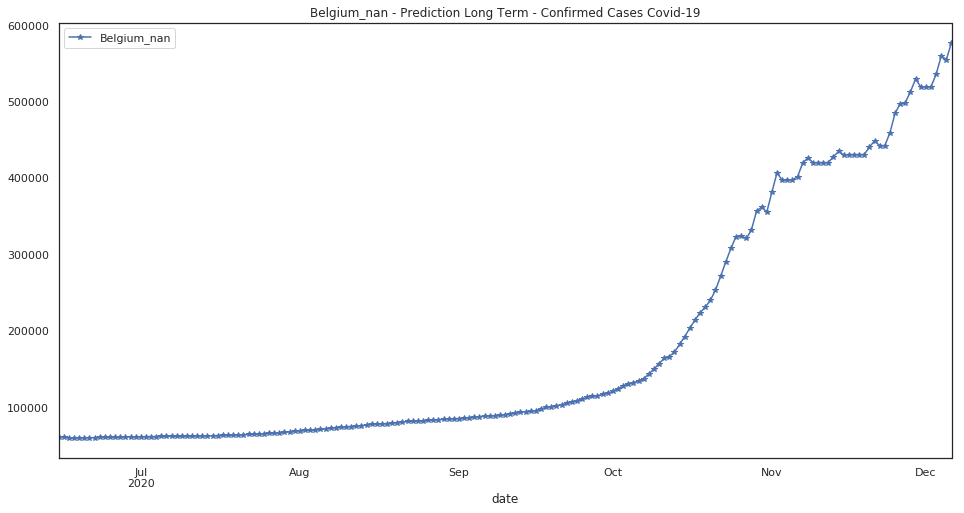

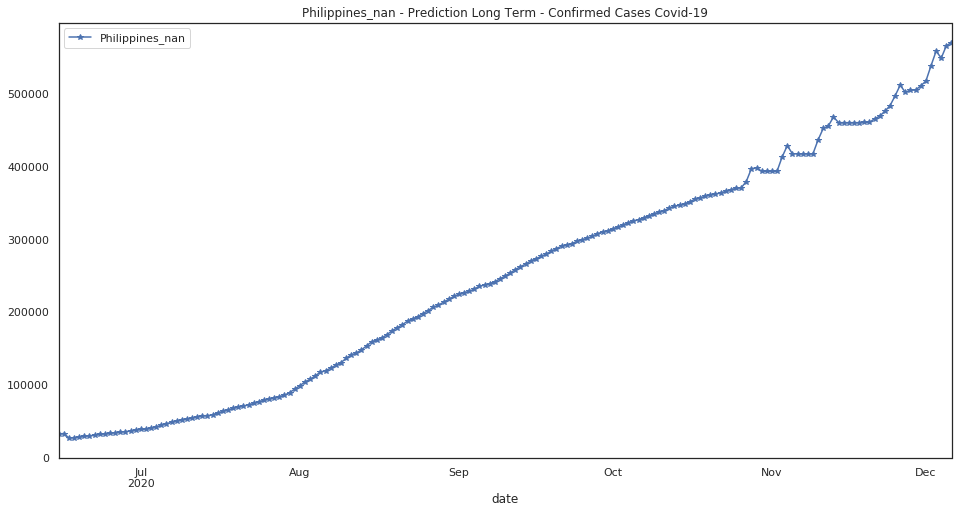

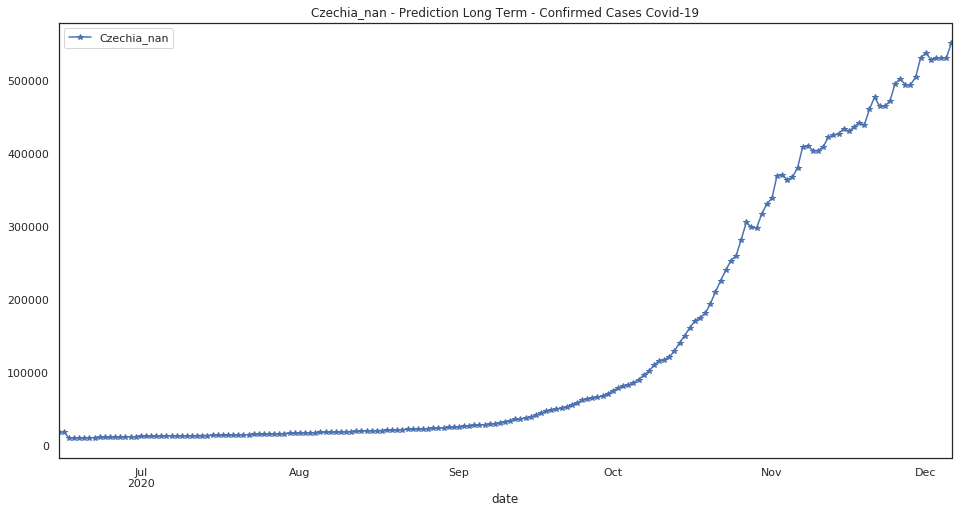

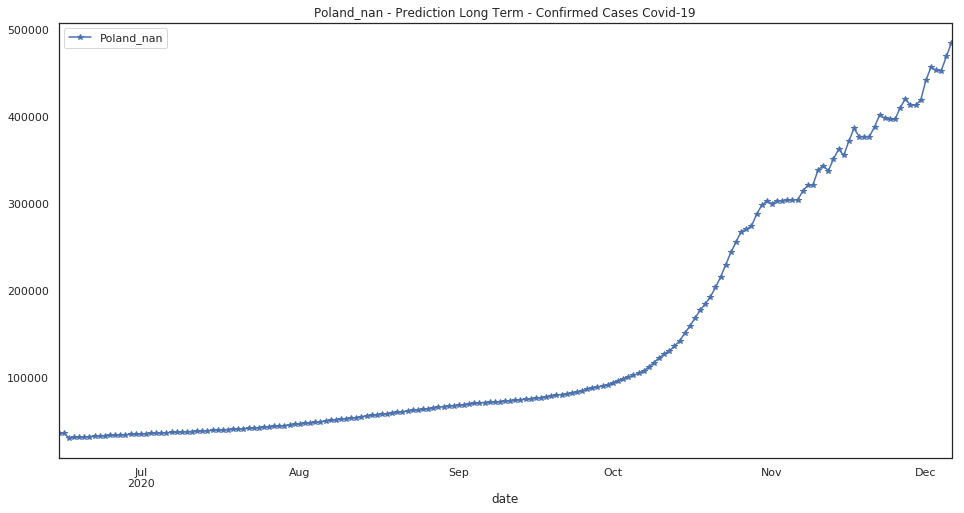

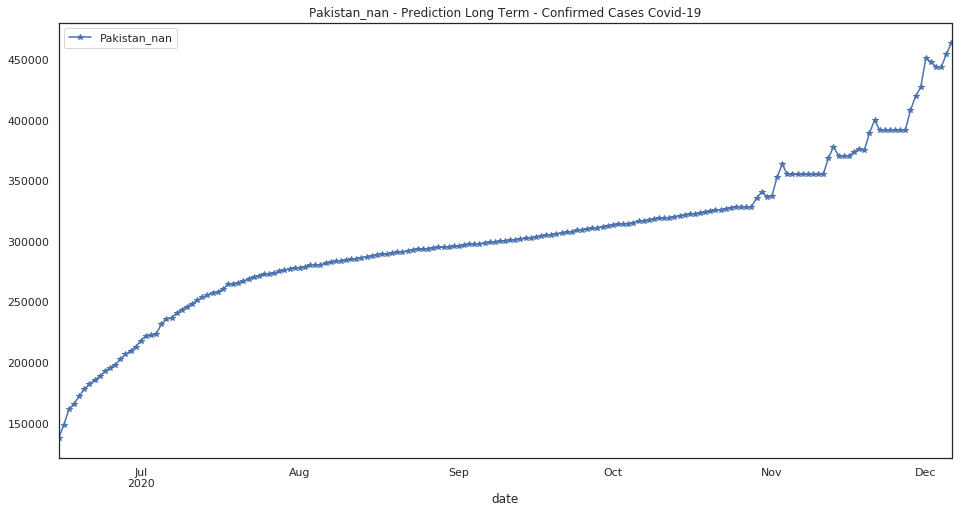

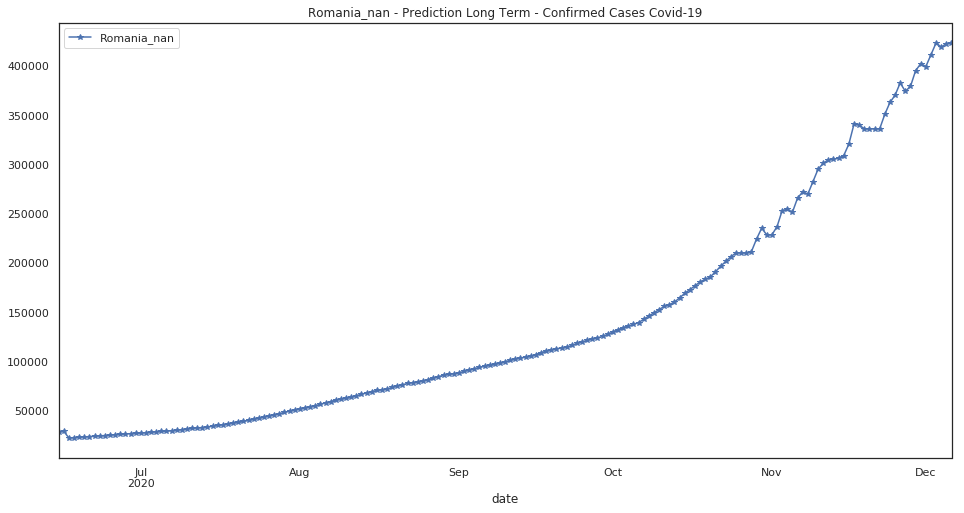

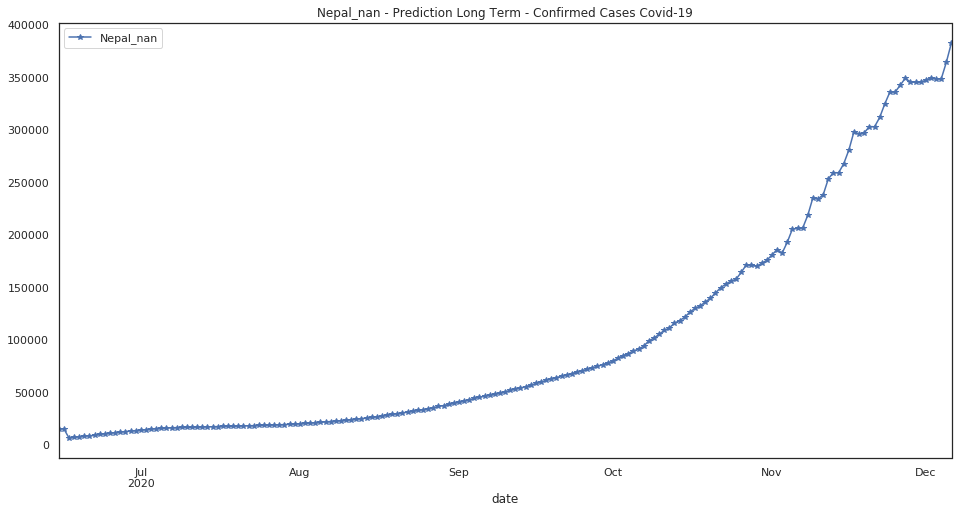

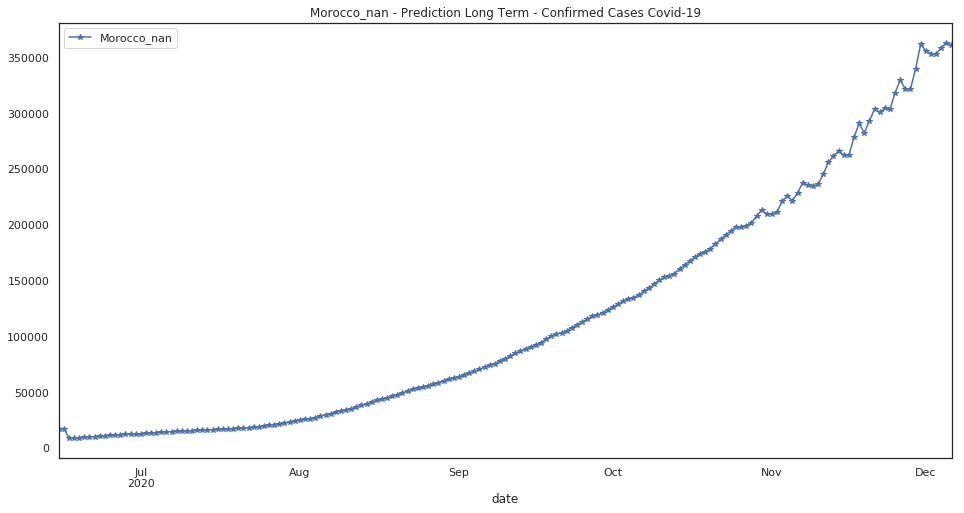

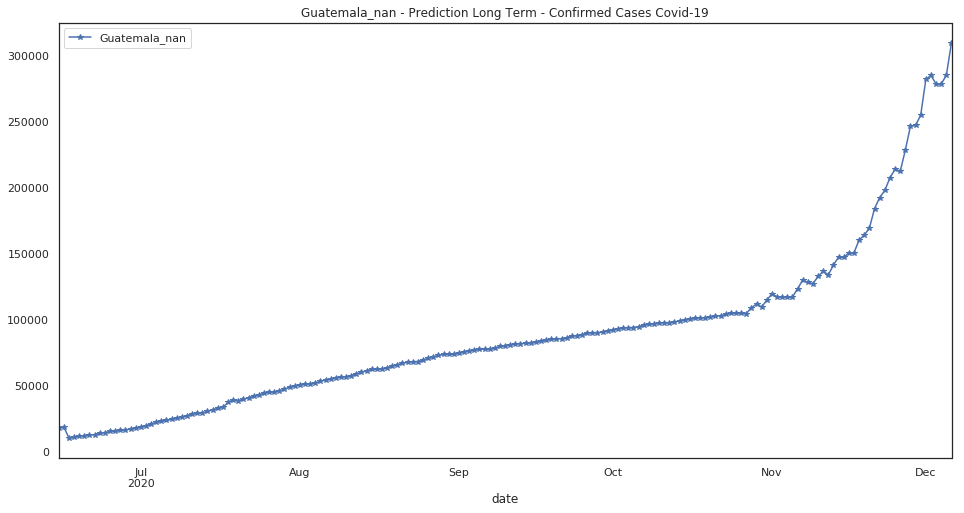

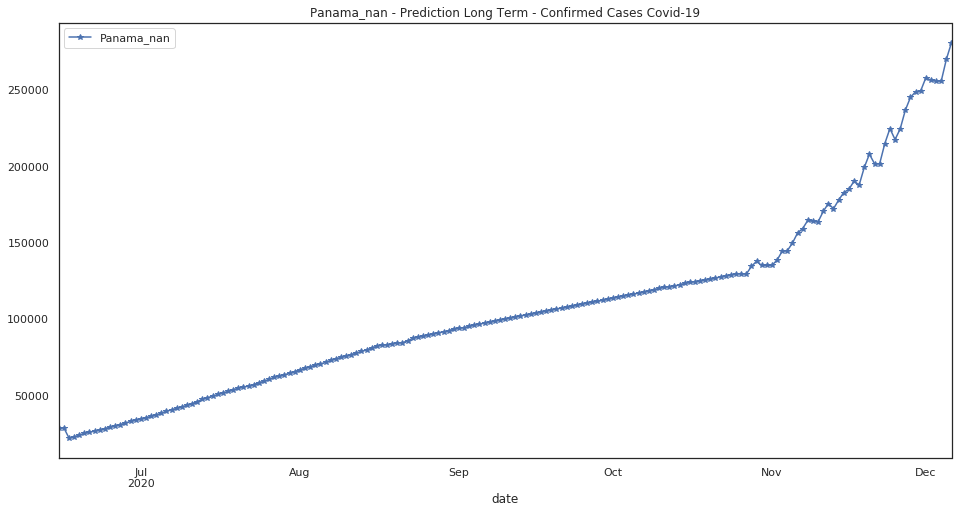

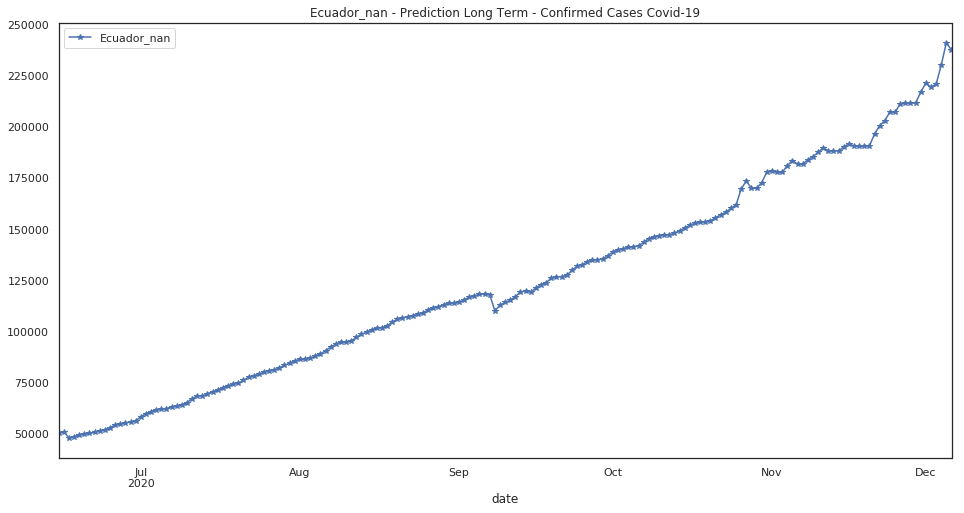

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

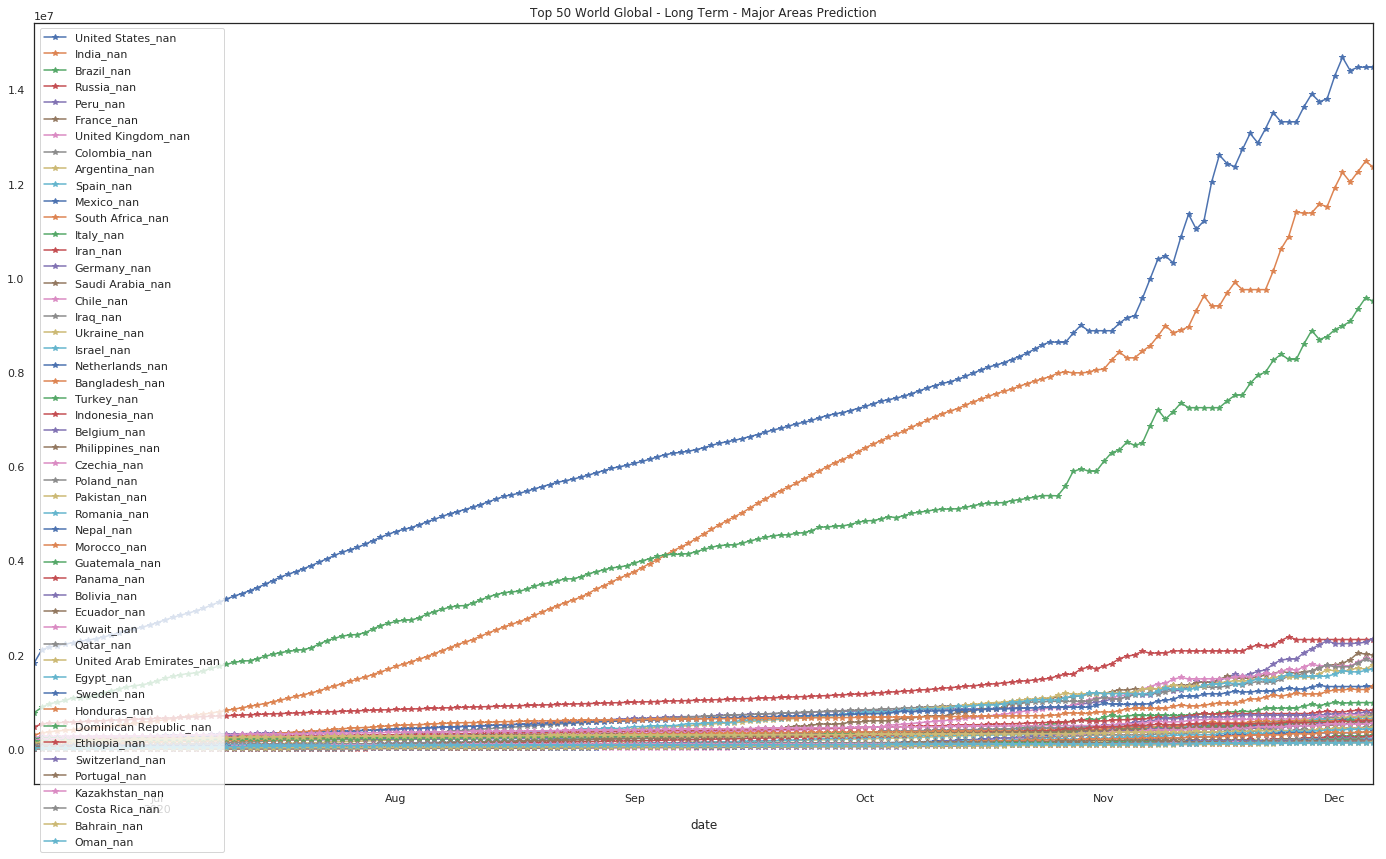

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

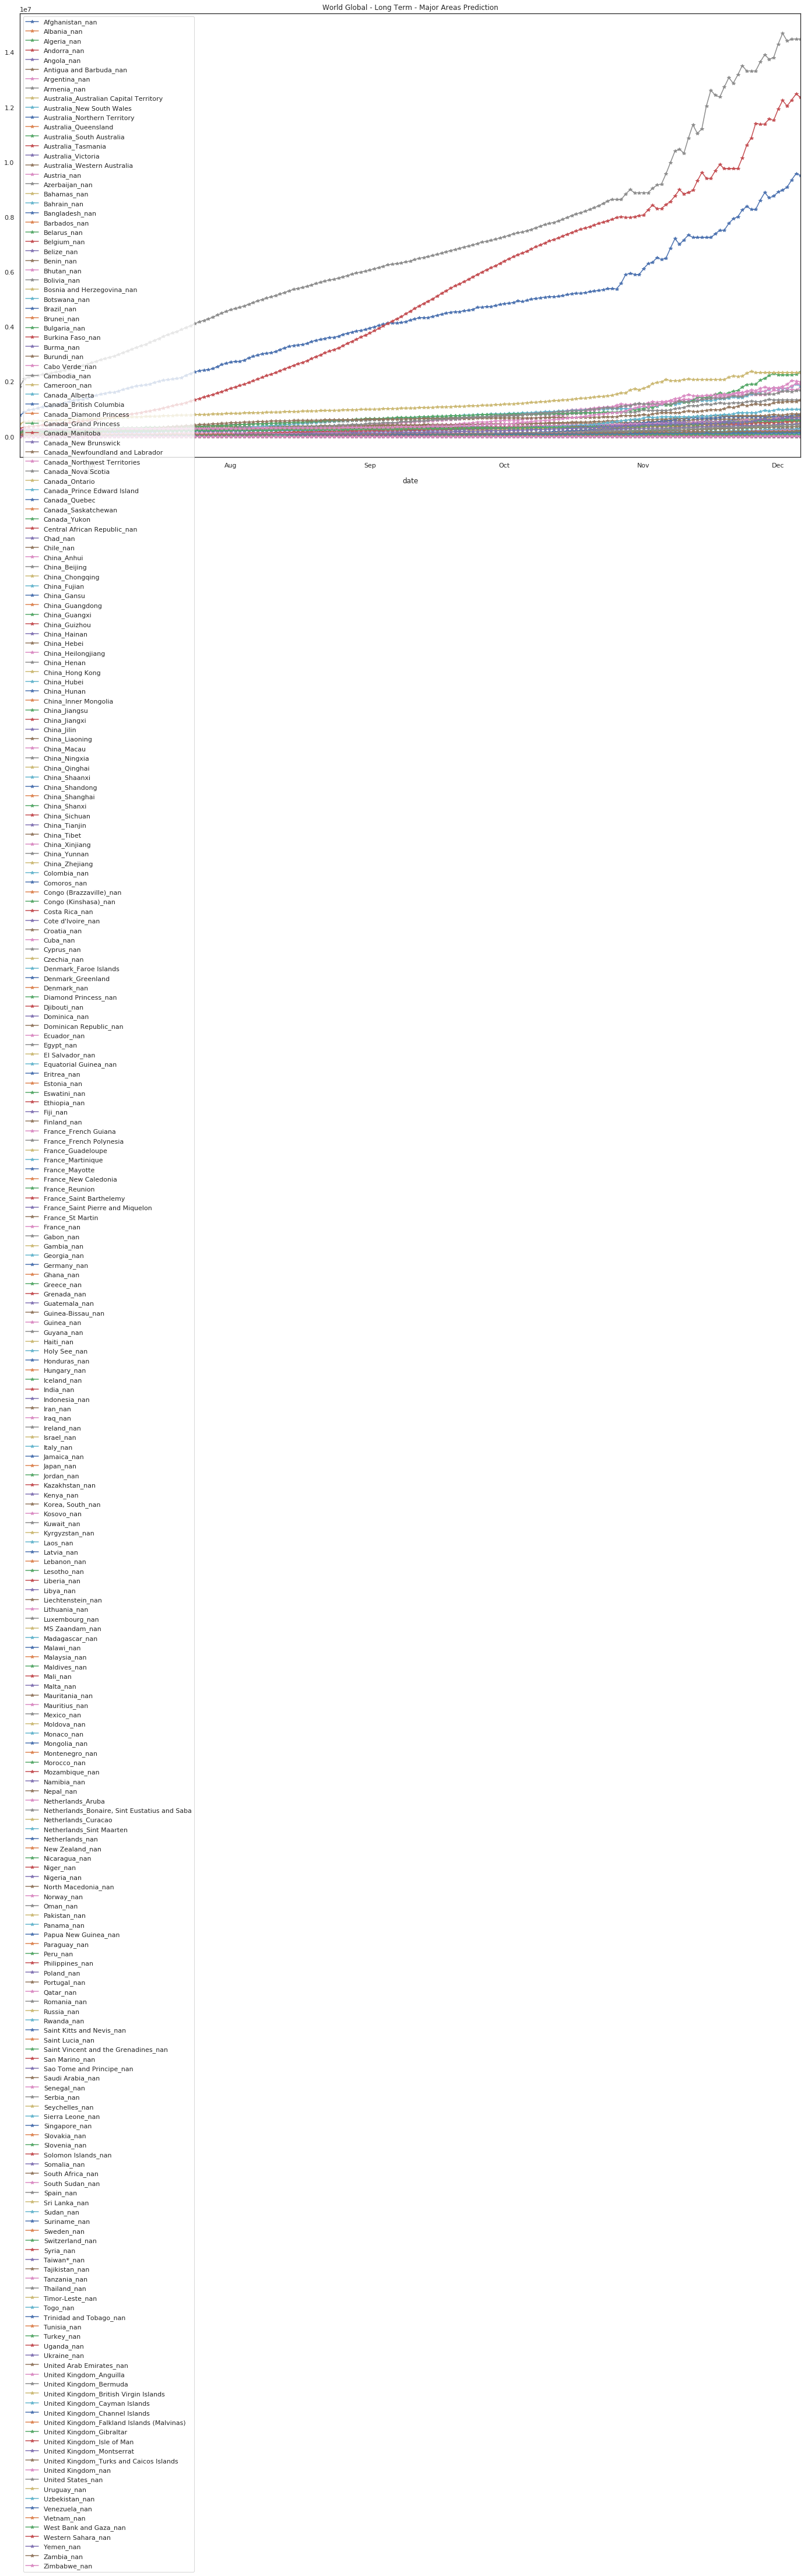

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-07-30          36635.0       5207.0      29853.0       1017.0   
2020-07-31          36754.0       5311.0      30421.0       1097.0   
2020-08-01          36819.0       5441.0      30975.0       1108.0   
2020-08-02          36796.0       5510.0      31497.0       1134.0   
2020-08-03          36822.0       5615.0      32000.0       1142.0   
2020-08-04          36873.0       5775.0      32531.0       1023.0   
2020-08-05          36919.0       5878.0      33090.0       1134.0   
2020-08-06          36988.0       6001.0      33665.0       1155.0   
2020-08-07          37105.0       6157.0      34206.0       1108.0   
2020-08-08          37170.0       6279.0      34734.0       1056.0   
2020-08-09          37151.0       6428.0      35215.0       1173.0   
2020-08-10          37233.0       6545.0      35739.0       1177.0   
2020-08-11          37372.0       6698.0      36263.0       1091.0   
2020-08-12          37448.0       6826.0      36743.0       1186.0   
2020-08-13          37515.0       6980.0      37235.0       1061.0   
2020-08-14          37533.0       7120.0      37716.0       1171.0   
2020-08-15          37621.0       7275.0      38185.0       1135.0   
2020-08-16          37708.0       7404.0      38638.0       1209.0   
2020-08-17          37693.0       7544.0      39077.0       1220.0   
2020-08-18          37683.0       7694.0      39501.0       1070.0   
2020-08-19          37688.0       7824.0      39903.0       1248.0   
2020-08-20          37913.0       7982.0      40312.0       1075.0   
2020-08-21          38050.0       8141.0      40727.0       1272.0   
2020-08-22          38036.0       8301.0      41131.0       1088.0   
2020-08-23          38091.0       8454.0      41524.0       1282.0   
2020-08-24          38145.0       8634.0      41920.0       1295.0   
2020-08-25          38168.0       8778.0      42298.0       1152.0   
2020-08-26          38195.0       8962.0      42679.0       1327.0   
2020-08-27          38222.0       9114.0      43083.0       1098.0   
2020-08-28          38233.0       9241.0      43475.0       1377.0   
...                     ...          ...          ...          ...   
2020-11-07          45589.0      23424.0      63391.0       5655.0   
2020-11-08          46289.0      24580.0      64014.0       5623.0   
2020-11-09          45743.0      24822.0      64785.0       5640.0   
2020-11-10          45743.0      24702.0      68987.0       5700.0   
2020-11-11          46116.0      24717.0      70581.0       5695.0   
2020-11-12          47982.0      25749.0      69216.0       5687.0   
2020-11-13          48718.0      26080.0      73659.0       5769.0   
2020-11-14          49089.0      25888.0      79145.0       5647.0   
2020-11-15          49718.0      25907.0      78356.0       5928.0   
2020-11-16          49344.0      26719.0      77955.0       5849.0   
2020-11-17          50473.0      27486.0      83302.0       6025.0   
2020-11-18          51913.0      27499.0      85851.0       6067.0   
2020-11-19          53795.0      27383.0      84025.0       6432.0   
2020-11-20          54574.0      27422.0      86505.0       6273.0   
2020-11-21          53893.0      27432.0      88755.0       6512.0   
2020-11-22          53893.0      27432.0      88550.0       6855.0   
2020-11-23          55003.0      28513.0      89401.0       6940.0   
2020-11-24          55641.0      28916.0      92412.0       6885.0   
2020-11-25          55234.0      28903.0      96893.0       7491.0   
2020-11-26          55234.0      28990.0      96251.0       7410.0   
2020-11-27          55288.0      29670.0      95650.0       7778.0   
2020-11-28          55288.0      29941.0      95650.0       8137.0   
2020-11-29          55288.0      30068.0      95650.0       8111.0   
2020-11-30          57667.0      30188.0      95650.0       8678.0   
2020-12-01

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
239                                Thailand_nan  15.870032  100.992541   
240                             Timor-Leste_nan  -8.874217  125.727539   
241                                    Togo_nan   8.619500    0.824800   
242                     Trinidad and Tobago_nan  10.691800  -61.222500   
243                                 Tunisia_nan  33.886917    9.537499   
244                                  Turkey_nan  38.963700   35.243300   
245                           United States_nan  40.000000 -100.000000   
246                                  Uganda_nan   1.373333   32.290275   
247                                 Ukraine_nan  48.379400   31.165600   
248                    United Arab Emirates_nan  23.424076   53.847818   
249                     United Kingdom_Anguilla  18.220600  -63.068600   
250                      United Kingdom_Bermuda  32.307800  -64.750500   
251       United Kingdom_British Virgin Islands  18.420700  -64.640000   
252               United Kingdom_Cayman Islands  19.313300  -81.254600   
253              United Kingdom_Channel Islands  49.372300   -2.364400   
254  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
255                    United Kingdom_Gibraltar  36.140800   -5.353600   
256                  United Kingdom_Isle of Man  54.236100   -4.548100   
257                   United Kingdom_Montserrat  16.742498  -62.187366   
258     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
259                          United Kingdom_nan  55.378100   -3.436000   
260                                 Uruguay_nan -32.522800  -55.765800   
261                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      19               Bahrain_nan  26.027500   50.550000   
2      20            Bangladesh_nan  23.685000   90.356300   
3      23               Belgium_nan  50.833300    4.469936   
4      27               Bolivia_nan -16.290200  -63.588700   
5      30                Brazil_nan -14.235000  -51.925300   
6      55                 Chile_nan -35.675100  -71.543000   
7      89              Colombia_nan   4.570900  -74.297300   
8      93            Costa Rica_nan   9.748900  -83.753400   
9      98               Czechia_nan  49.817500   15.473000   
10    105    Dominican Republic_nan  18.735700  -70.162700   
11    106               Ecuador_nan  -1.831200  -78.183400   
12    107                 Egypt_nan  26.820553   30.802498   
13    113              Ethiopia_nan   9.145000   40.489700   
14    126                France_nan  46.227600    2.213700   
15    131               Germany_nan  51.165691   10.451526   
16    135             Guatemala_nan  15.783500  -90.230800   
17    141              Honduras_nan  15.200000  -86.241900   
18    144                 India_nan  20.593684   78.962880   
19    145             Indonesia_nan  -0.789300  113.921300   
20    146                  Iran_nan  32.427908   53.688046   
21    147                  Iraq_nan  33.223191   43.679291   
22    149                Israel_nan  31.046051   34.851612   
23    150                 Italy_nan  41.871940   12.567380   
24    154            Kazakhstan_nan  48.019600   66.923700   
25    158                Kuwait_nan  29.311660   47.481766   
26    179                Mexico_nan  23.634500 -102.552800   
27    184               Morocco_nan  31.791700   -7.092600   
28    187                 Nepal_nan  28.166700   84.250000   
29    192           Netherlands_nan  52.132600    5.291300   
30    199                  Oman_nan  21.512583   55.923255   
31    200              Pakistan_nan  30.375300   69.345100   
32    201                Panama_nan   8.538000  -80.782100   
33    204                  Peru_nan  -9.190000  -75.015200   
34    205           Philippines_nan  12.879721  121.774017   
35    206                Poland_nan  51.919400   19.145100   
36    207              Portugal_nan  39.399900   -8.224500   
37    208                 Qatar_nan  25.354800   51.183900   
38    209               Romania_nan  45.943200   24.966800   
39    210                Russia_nan  61.524010  105.318756   
40    217          Saudi Arabia_nan  23.885942   45.079162   
41    227          South Africa_nan -30.559500   22.937500   
42    229                 Spain_nan  40.463667   -3.749220   
43    233                Sweden_nan  60.128161   18.643501   
44    234           Switzerland_nan  46.818200    8.227500   
45    244                Turkey_nan  38.963700   35.243300   
46    245         United States_nan  40.000000 -100.000000   
47    247               Ukraine_nan  48.379400   31.165600   
48    248  United Arab Emirates_nan  23.424076   53.847818   
49    259        United Kingdom_nan  55.378100   -3.436000   
50    262             Venezuela_nan   6.423800  -66.589700   

    2020-06-15 00:00:00  2020-06-16 00:00:00  2020-06-17 00:00:00  \
0               37935.0              39119.0              34840.0   
1               26068.0              26533.0              19553.0   
2               87772.0              91100.0              98858.0   
3               61473.0              61521.0              60155.0   
4               26119.0              26817.0              19883.0   
5              775124.0             888271.0             970006.0   
6              193846.0             213715.0             222209.0   
7               55409.0              57019.0              56592.0   
8               11187.0              11232.0               1796.0   
9               18356.0              18397.0              10111.0   
10              2973

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()